# **Data augmentation**

In [1]:
import os
import sys
import warnings; warnings.filterwarnings('ignore')
import collections

import pandas as pd

utils_path = os.path.join(os.getcwd(), '..', '..', '..')
if utils_path not in sys.path:
    sys.path.insert(0, utils_path)

from notebooks.src.utils import plots, constants

In [2]:
PRETRAINING_FOLDER = constants.PRETRAINING_FOLDER
TUNING_FOLDER = constants.TUNING_FOLDER

TUNING_FOLDER_CLEANED = os.path.join(TUNING_FOLDER, 'cleaned')
TUNING_FOLDER_RAW = os.path.join(TUNING_FOLDER, 'raw')

FINETUNED_RESULTS_CSV = os.path.join(TUNING_FOLDER_CLEANED, 'best_models.csv')
FIGSIZE = (20, 6)

In [3]:
def extract_epochs_from_name(df: pd.DataFrame):
    df['pretraining_epochs'] = df['model_name'].str.extract(r'^.*finetuning-epochs_([0-9]+)[^0-9].*npz')
    df['pretraining_epochs'] = df['pretraining_epochs'].fillna(0).astype(str)
    return df

def filter_df_by_model(df: pd.DataFrame, model_name: str, source: str):
    df = df[(df['model_name'].str.find(model_name) != -1) & df['source'].str.contains(source)]
    return df

def shift_epochs_from_epoch(df: pd.DataFrame, from_=0):
    df['epoch'] = df['epoch'].astype(int)
    min_df = df.groupby(['model_name'])['epoch'].transform('min')
    df['epoch'] = df['epoch'] - min_df
    df['epoch'] = df['epoch'] - from_
    return df

## **Pretraining Subsets**

### **1. Syntax Grammar**

In [4]:
DEFAULT_RESULTS_SYNTAX_GRAMMAR_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'default_pretraining_syntax_grammar.csv')
PRETRAINED_RESULTS_SYNTAX_GRAMMAR_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'finetuned_pretraining_syntax_grammar.csv')

#### **1.1. Default Pretraining**

In [5]:
results_grammar_df = pd.read_csv(DEFAULT_RESULTS_SYNTAX_GRAMMAR_CSV)
results_grammar_df['date'] = pd.to_datetime(results_grammar_df['date'])
results_grammar_df = shift_epochs_from_epoch(results_grammar_df, from_=0)
results_grammar_df = extract_epochs_from_name(results_grammar_df)

In [6]:
default_grammar_s2s_gn_es_df = filter_df_by_model(results_grammar_df, 's2s', 'gn')
default_grammar_s2s_es_gn_df = filter_df_by_model(results_grammar_df, 's2s', 'es')
default_grammar_transformer_gn_es_df = filter_df_by_model(results_grammar_df, 'transformer', 'gn')
default_grammar_transformer_es_gn_df = filter_df_by_model(results_grammar_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

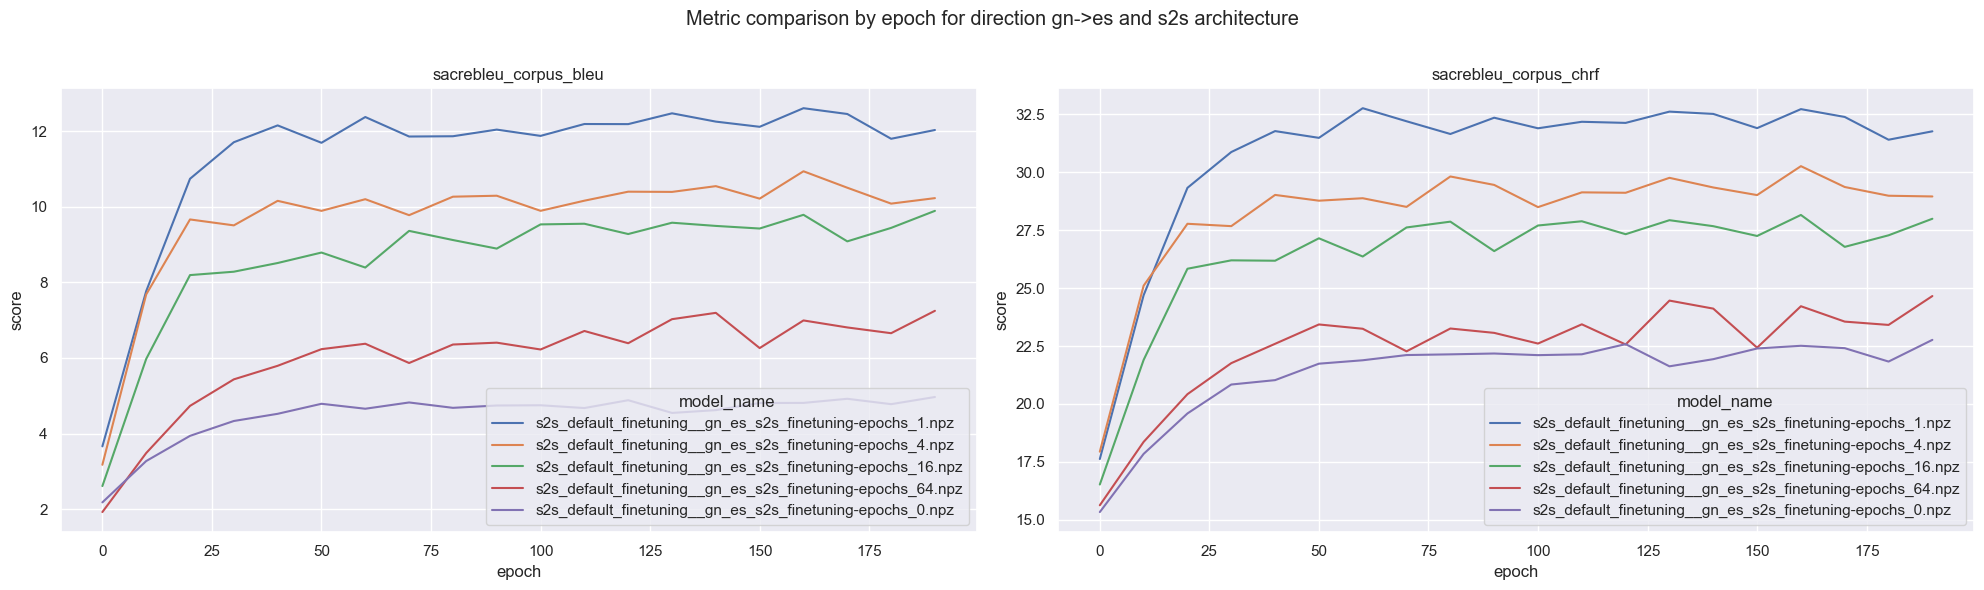

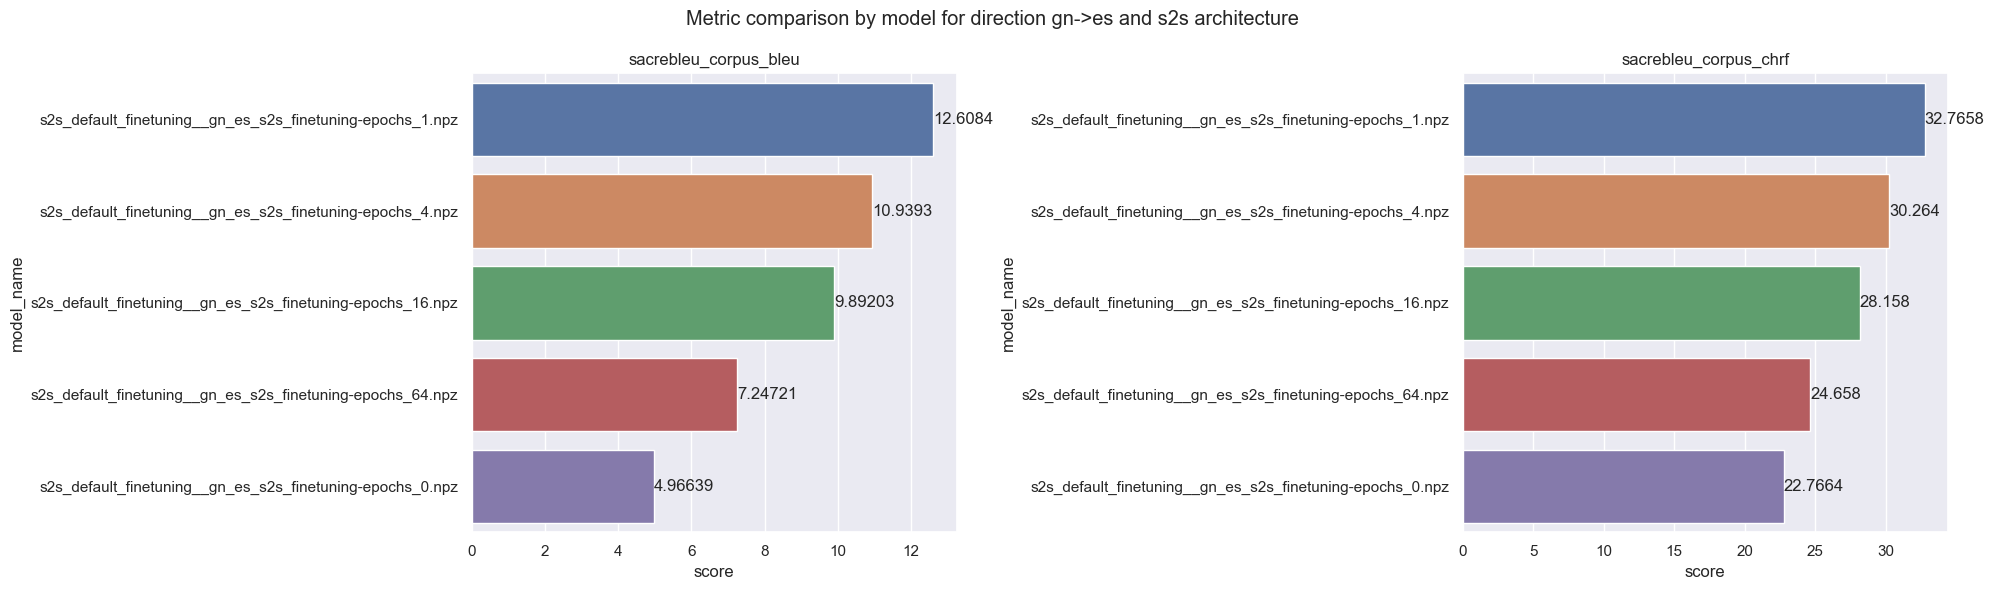

In [7]:
plots.plot_metric_by_epoch_foreach_model(default_grammar_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_grammar_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

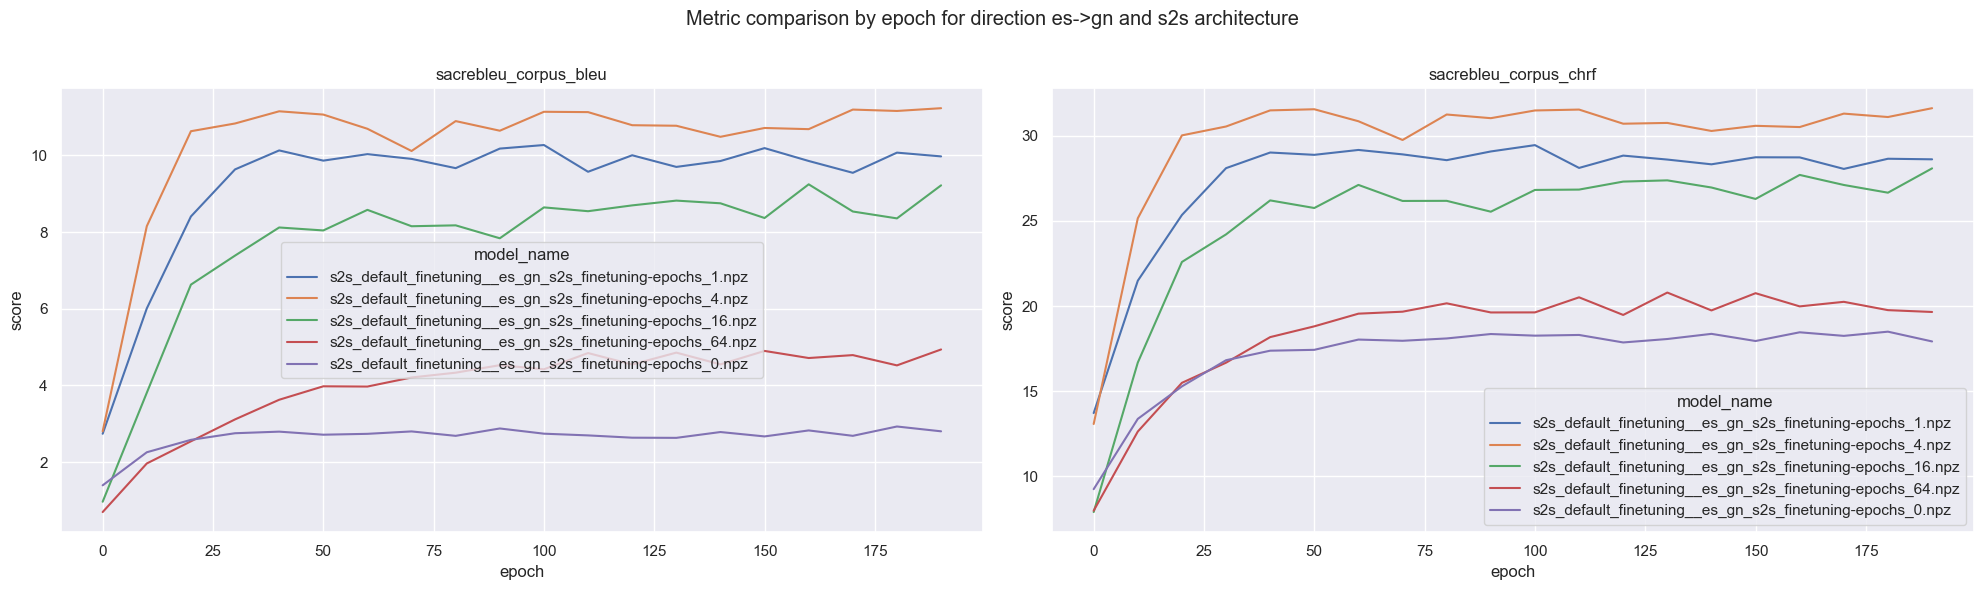

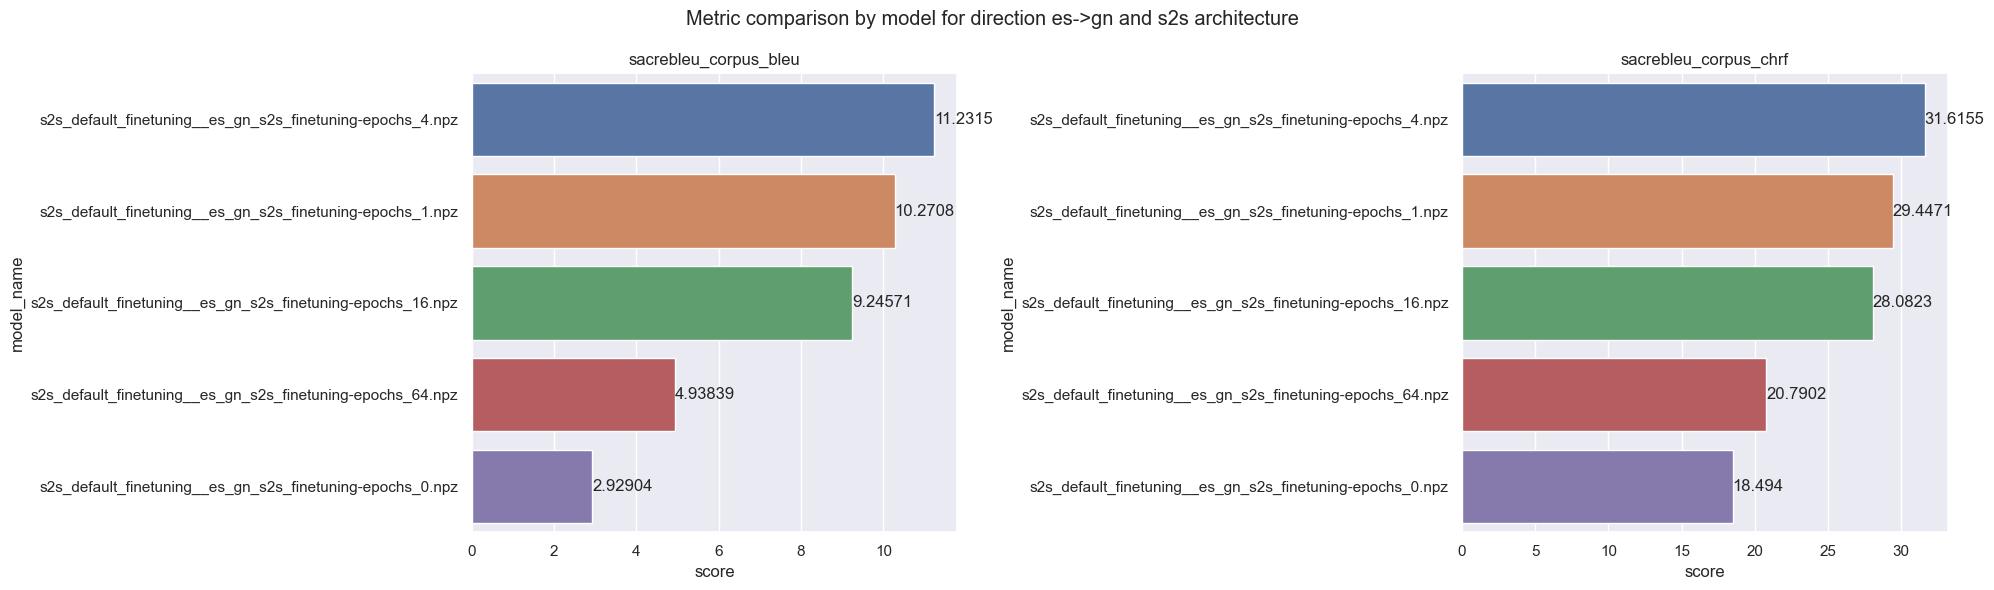

In [8]:
plots.plot_metric_by_epoch_foreach_model(default_grammar_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_grammar_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

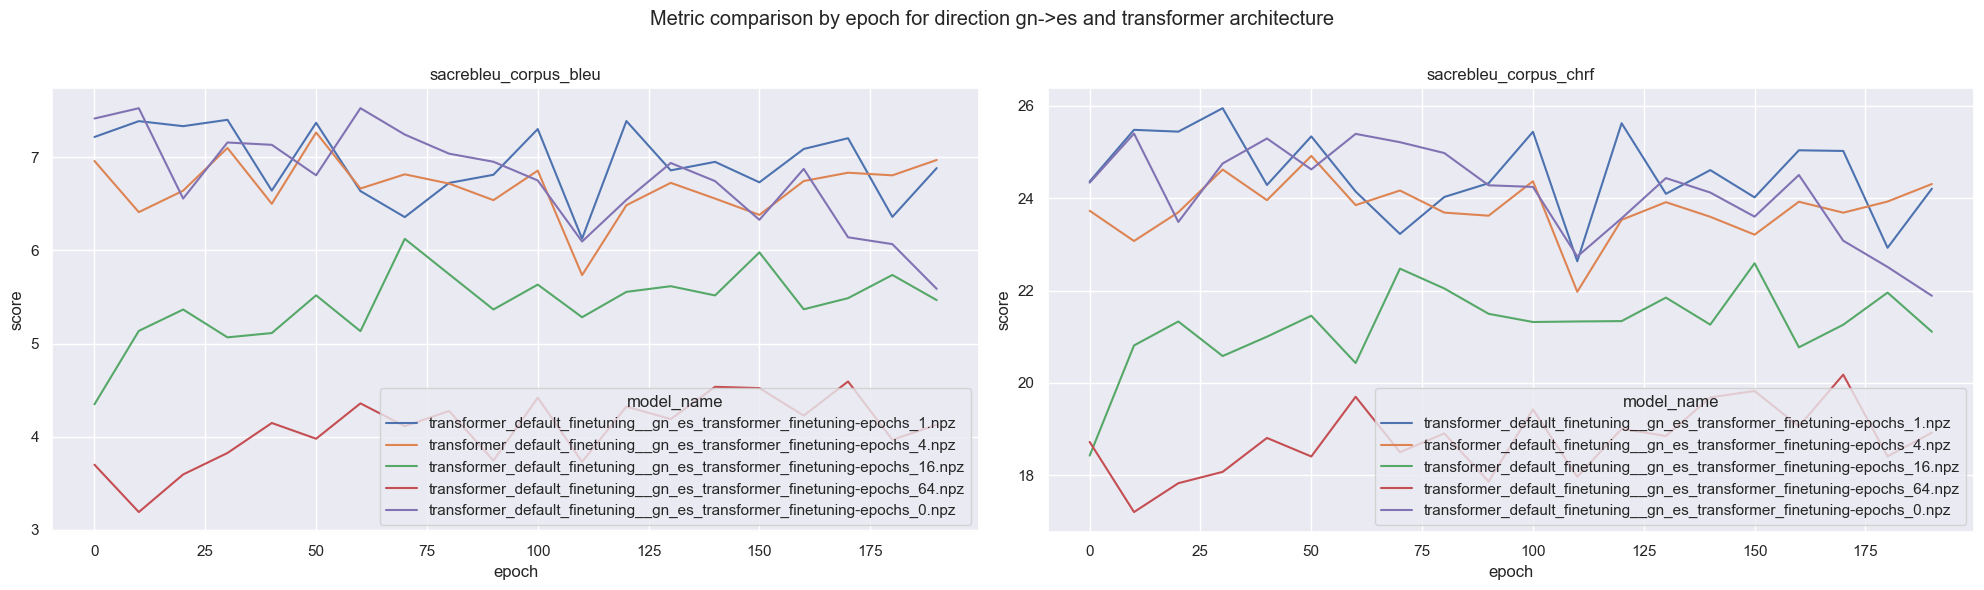

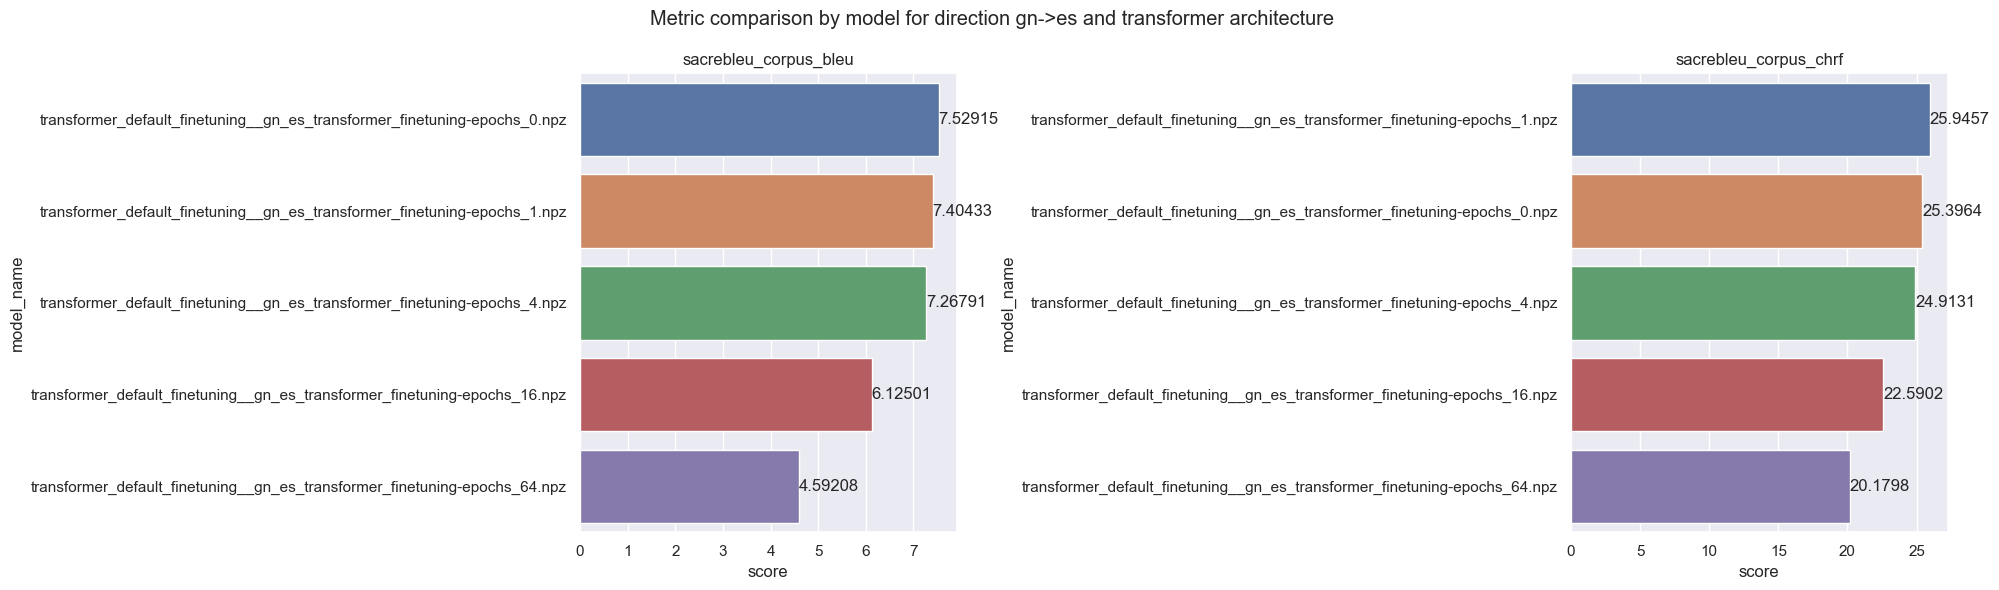

In [9]:
plots.plot_metric_by_epoch_foreach_model(default_grammar_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_grammar_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

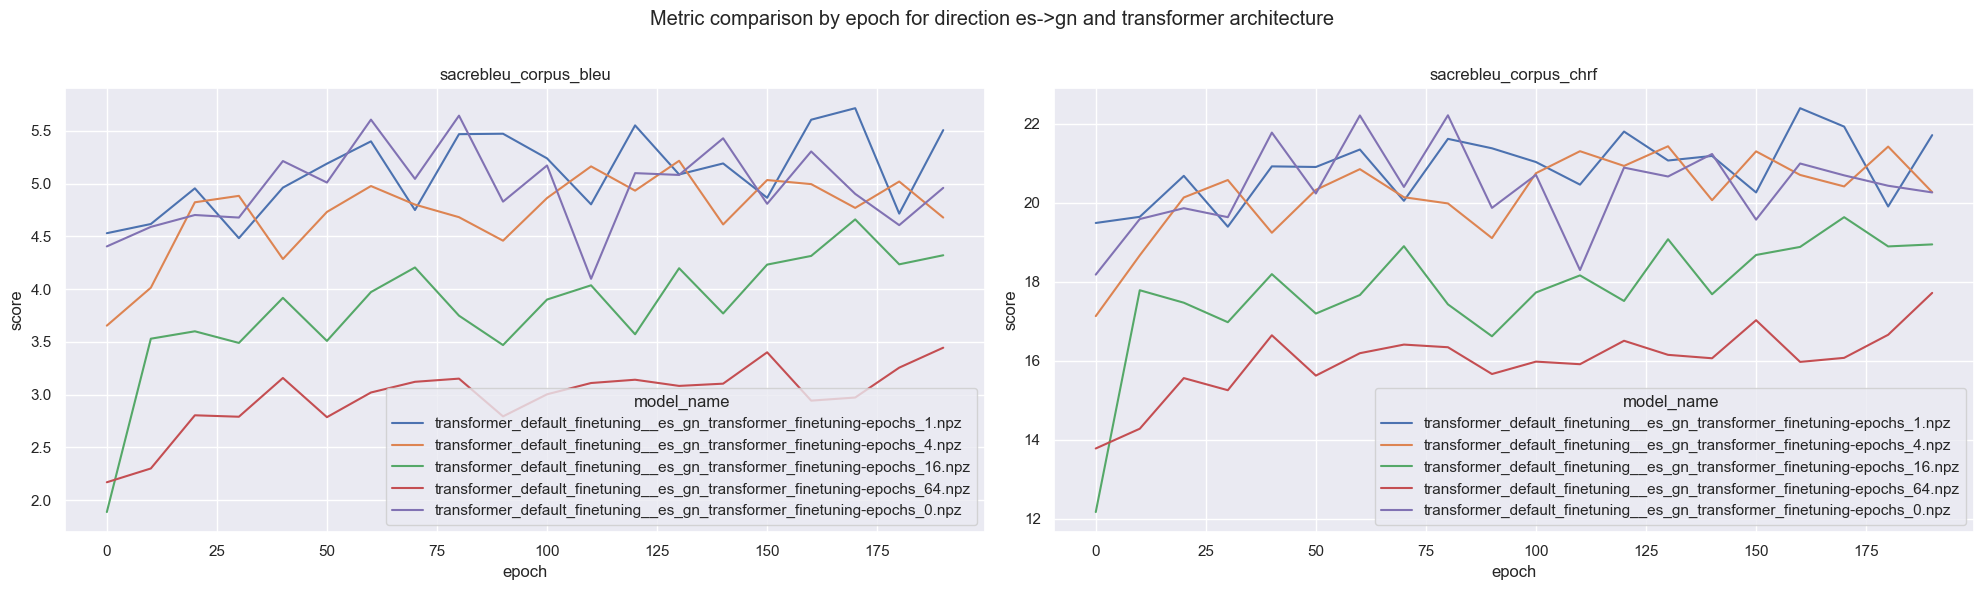

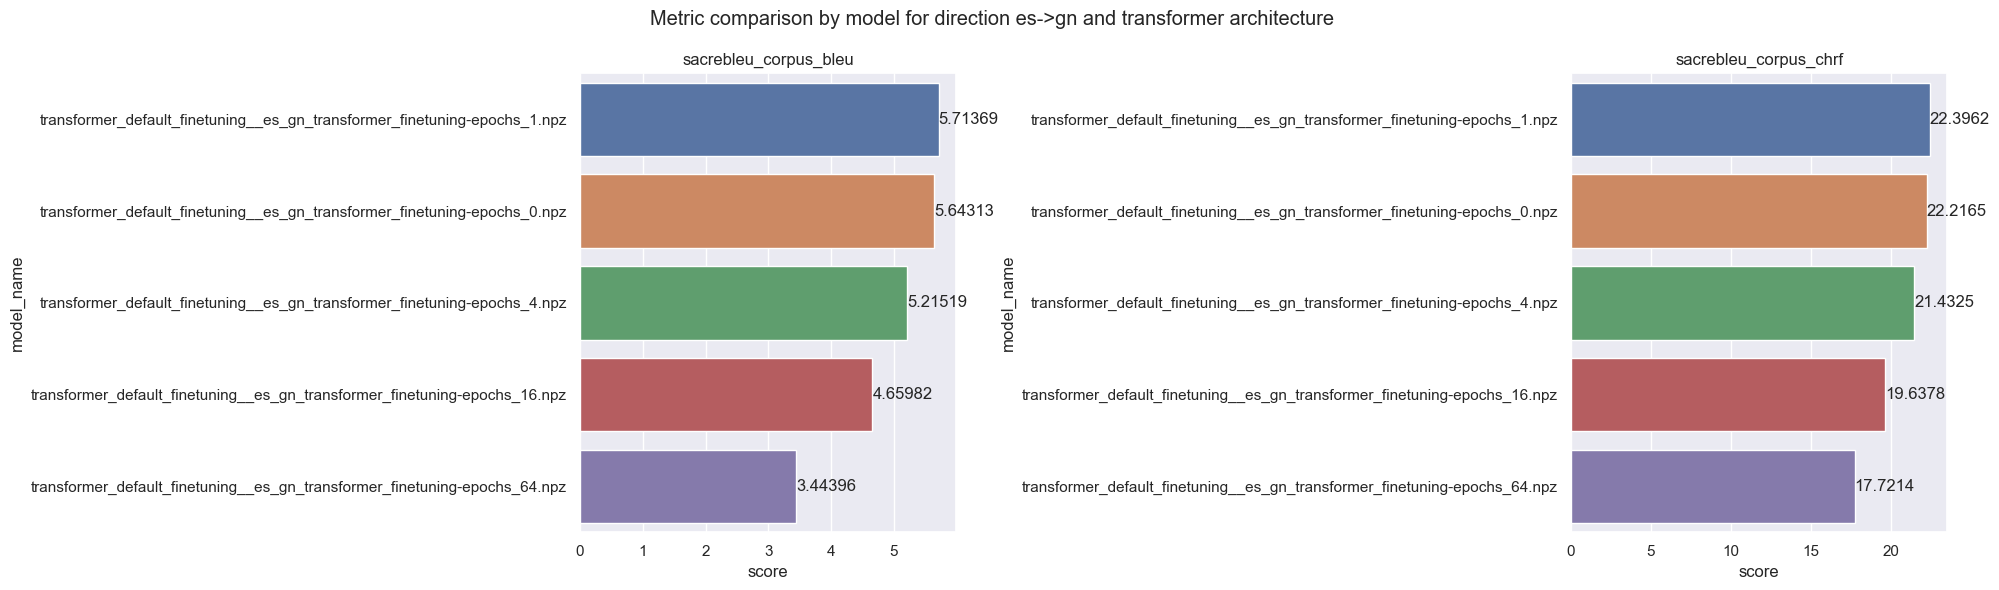

In [10]:
plots.plot_metric_by_epoch_foreach_model(default_grammar_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_grammar_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

#### **1.2. Tuning Pretraining**

In [11]:
pretrained_results_df = pd.read_csv(PRETRAINED_RESULTS_SYNTAX_GRAMMAR_CSV)
finetuned_results_df = pd.read_csv(FINETUNED_RESULTS_CSV)
pretrained_results_df = pd.concat([pretrained_results_df, finetuned_results_df], axis=0)

pretrained_results_df = shift_epochs_from_epoch(pretrained_results_df, from_=0)
finetuned_results_df = shift_epochs_from_epoch(finetuned_results_df, from_=0)

pretrained_results_df['date'] = pd.to_datetime(pretrained_results_df['date'])
pretrained_results_df['pretraining_epochs'] = pretrained_results_df['model_name'].str.extract(r'^.*finetuning-epochs_([0-9]+)')
pretrained_results_df['pretraining_epochs'] = pretrained_results_df['pretraining_epochs'].fillna(0).astype(str)


In [12]:
pretrained_grammar_s2s_gn_es_df = filter_df_by_model(pretrained_results_df, 's2s', 'gn')
pretrained_grammar_s2s_es_gn_df = filter_df_by_model(pretrained_results_df, 's2s', 'es')
pretrained_grammar_transformer_gn_es_df = filter_df_by_model(pretrained_results_df, 'transformer', 'gn')
pretrained_grammar_transformer_es_gn_df = filter_df_by_model(pretrained_results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

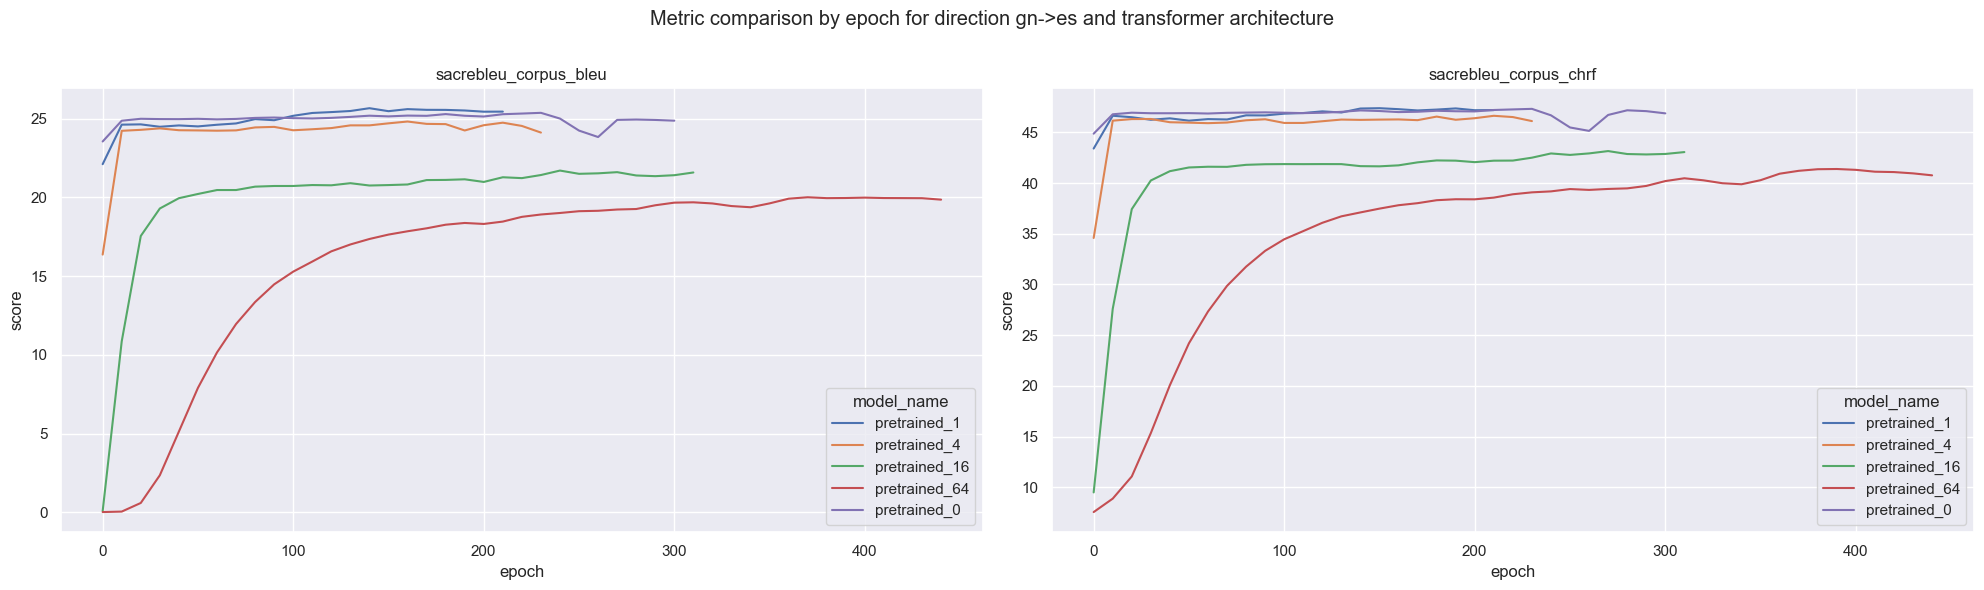

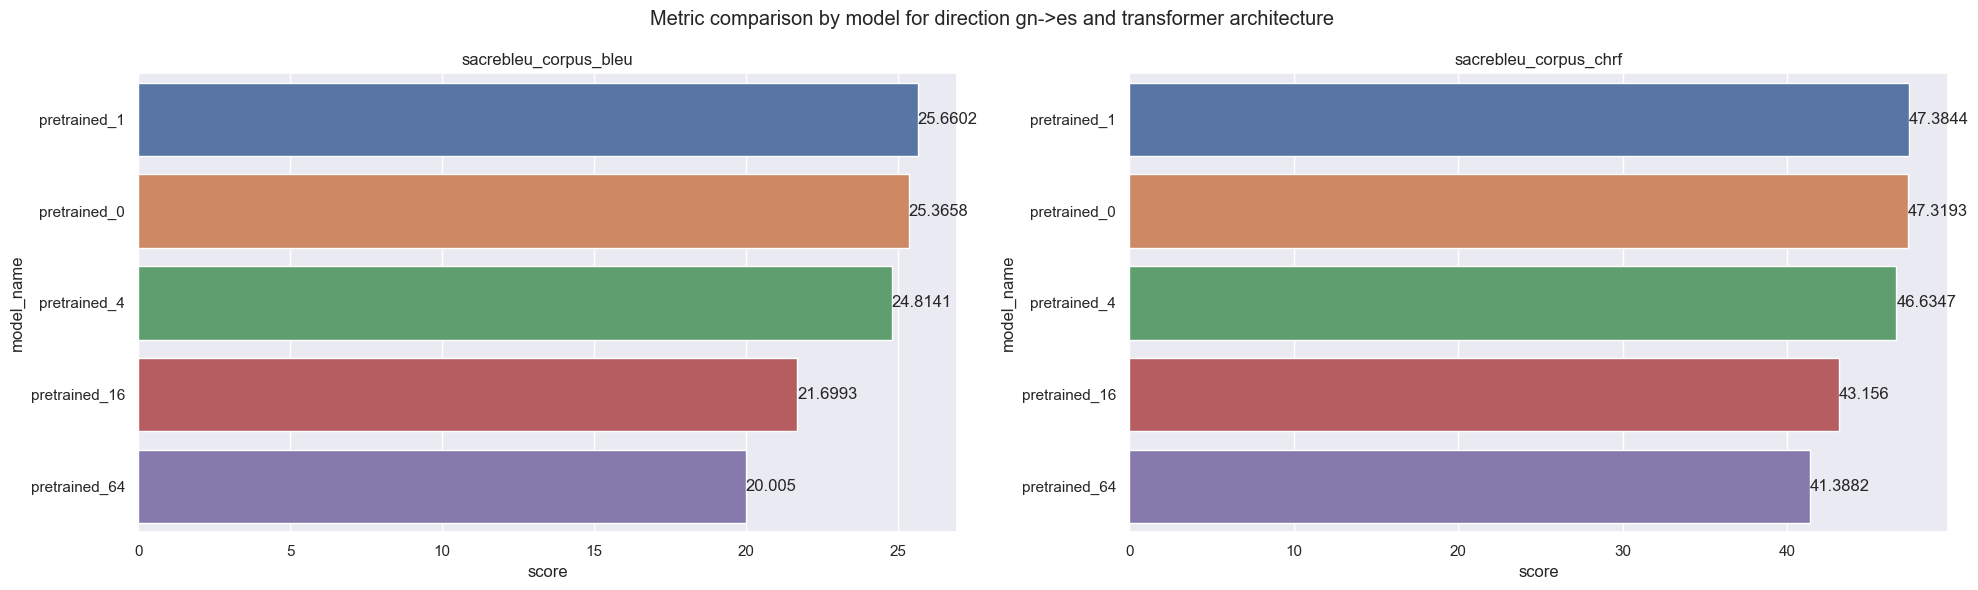

In [13]:
pretrained_grammar_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', pretrained_grammar_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(pretrained_grammar_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_grammar_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

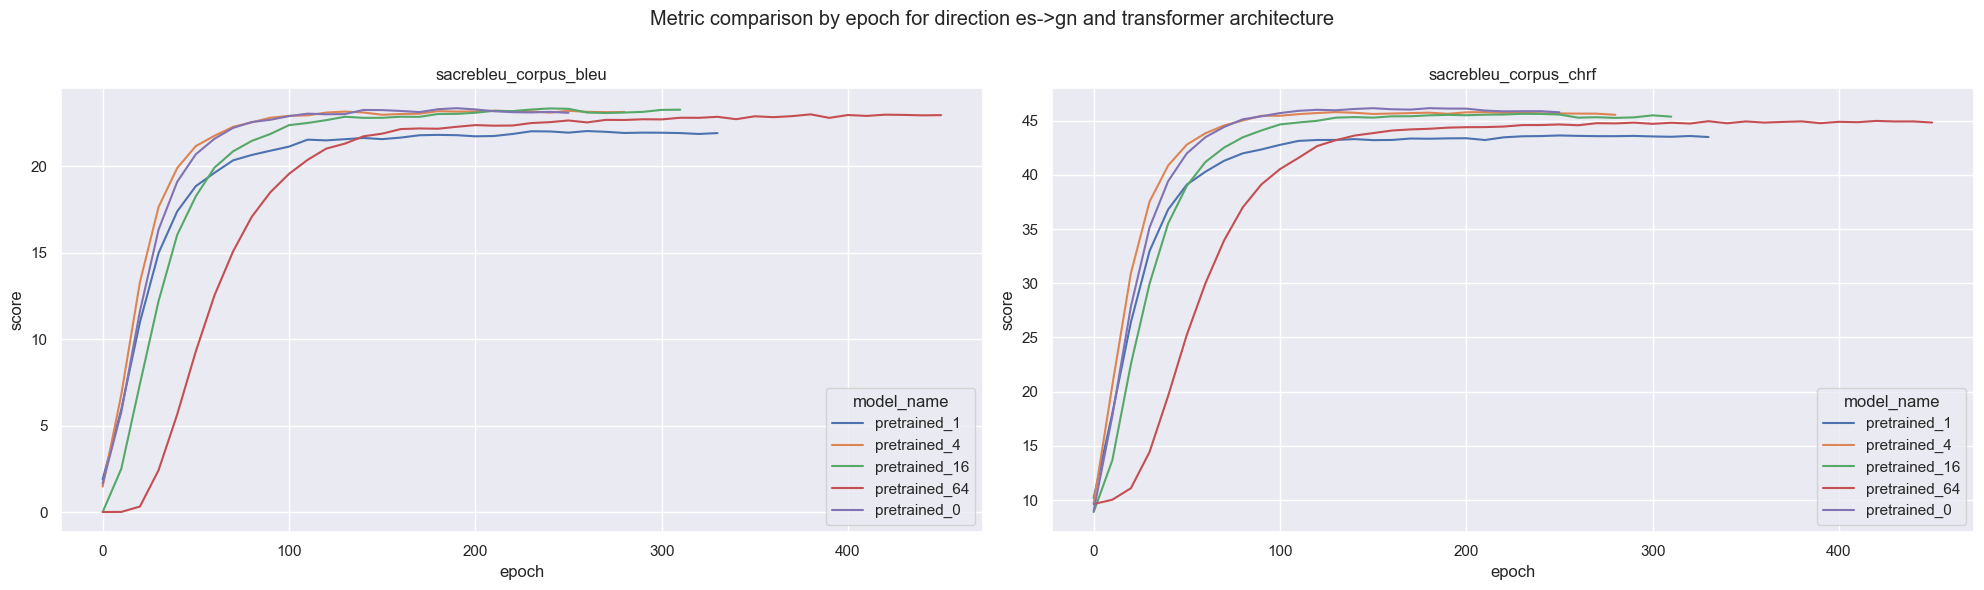

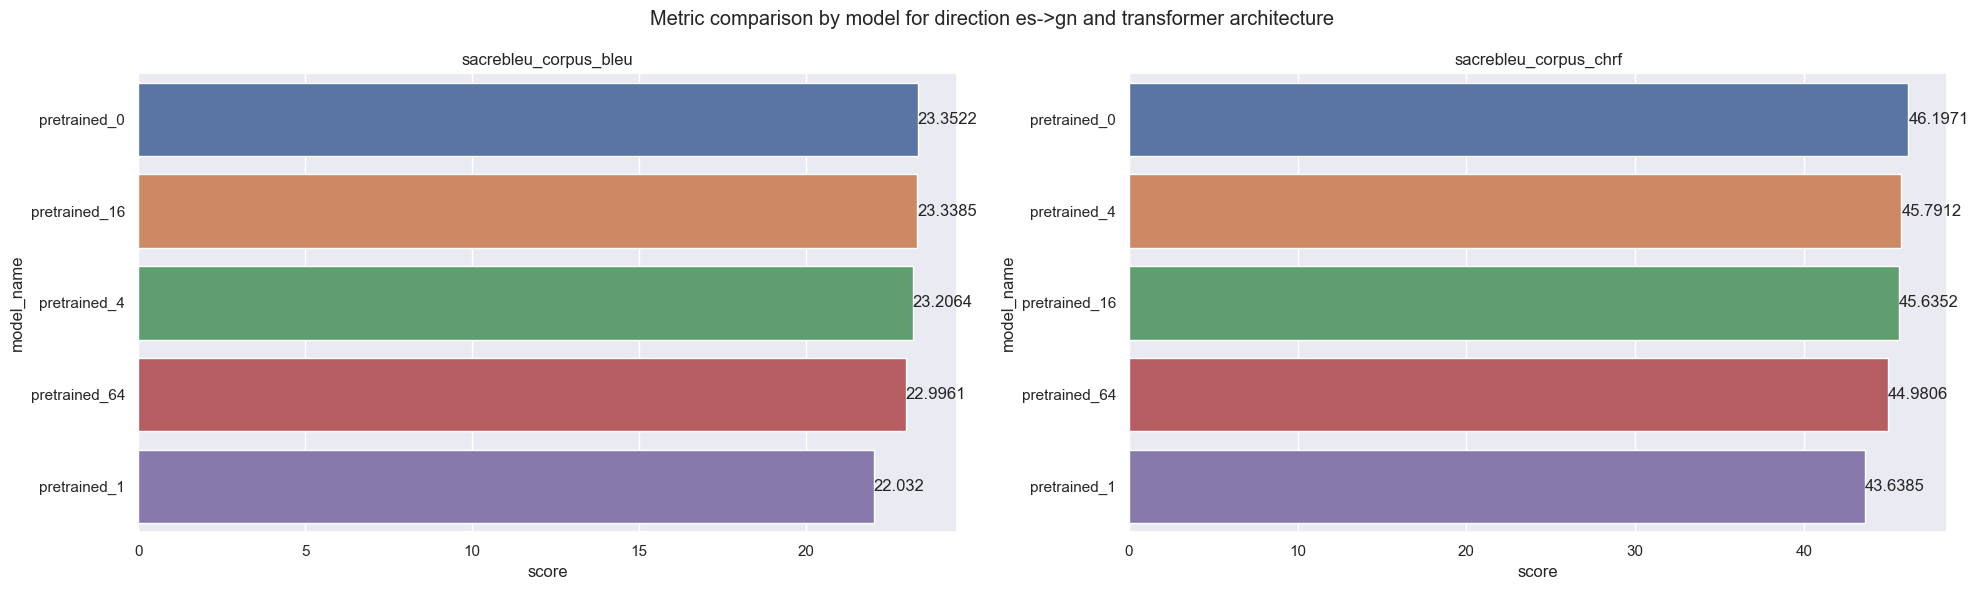

In [14]:
pretrained_grammar_s2s_es_gn_df['model_name'] = pretrained_grammar_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_grammar_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_grammar_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

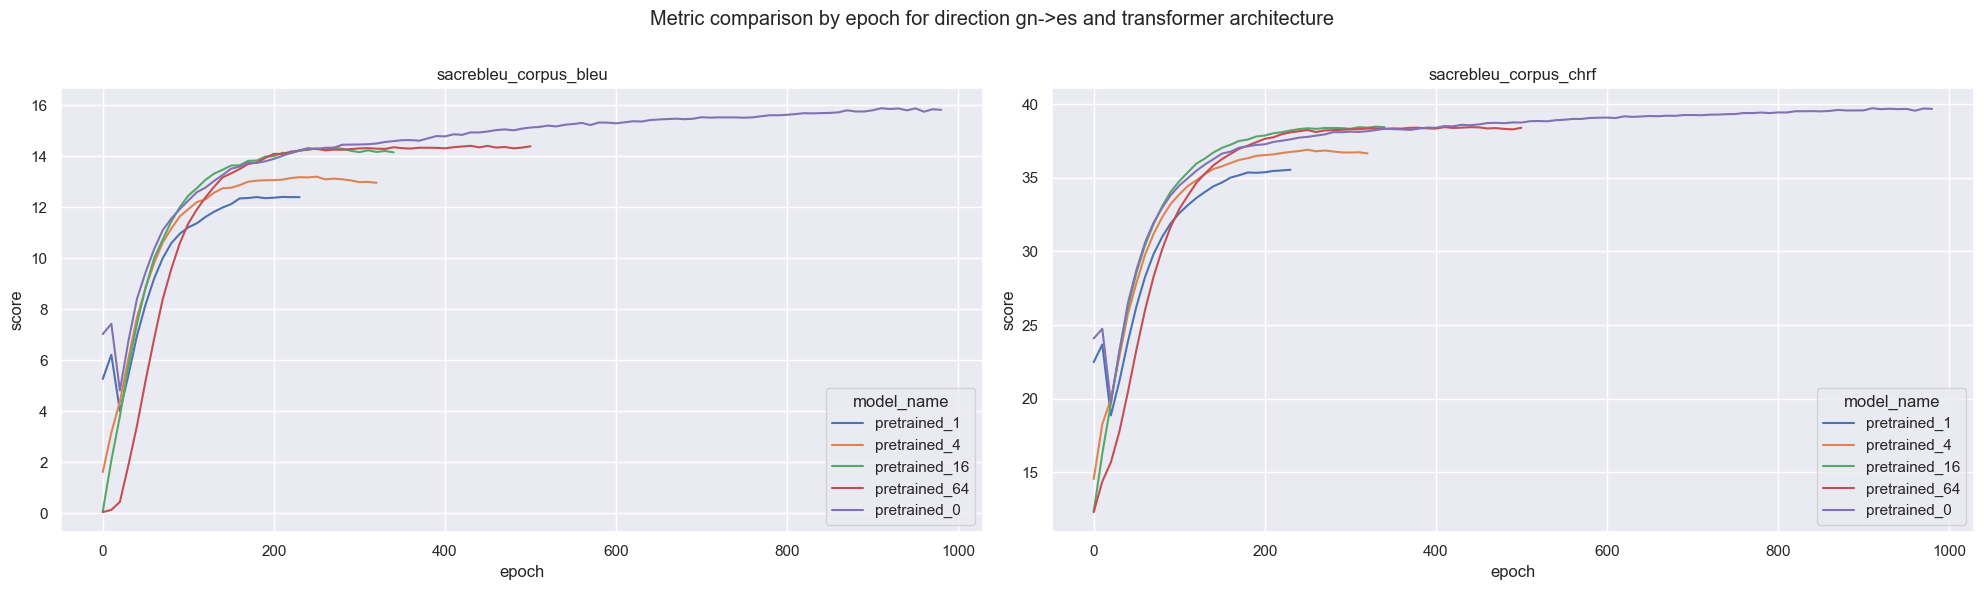

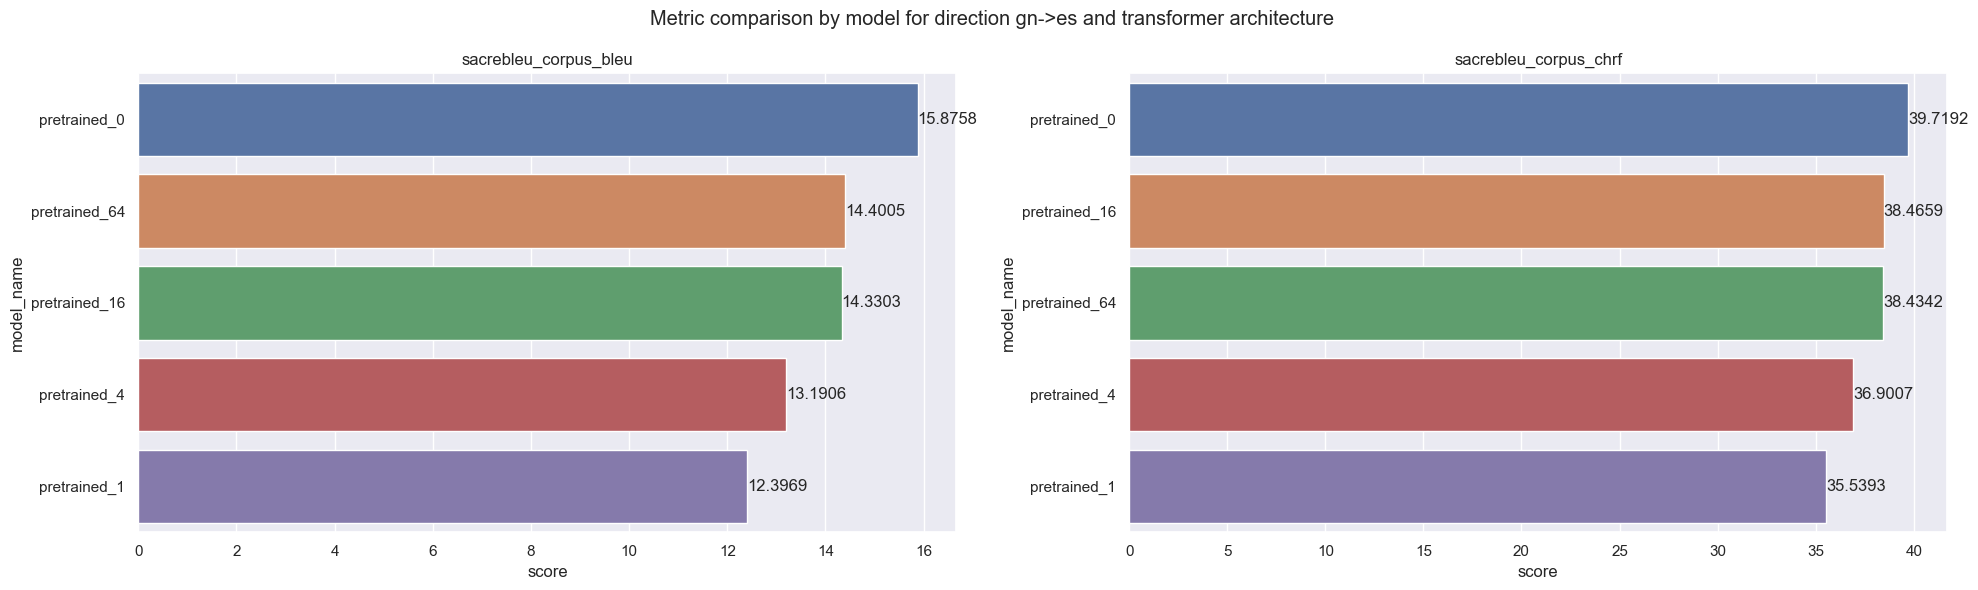

In [15]:
pretrained_grammar_transformer_gn_es_df['model_name'] = pretrained_grammar_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_grammar_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_grammar_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

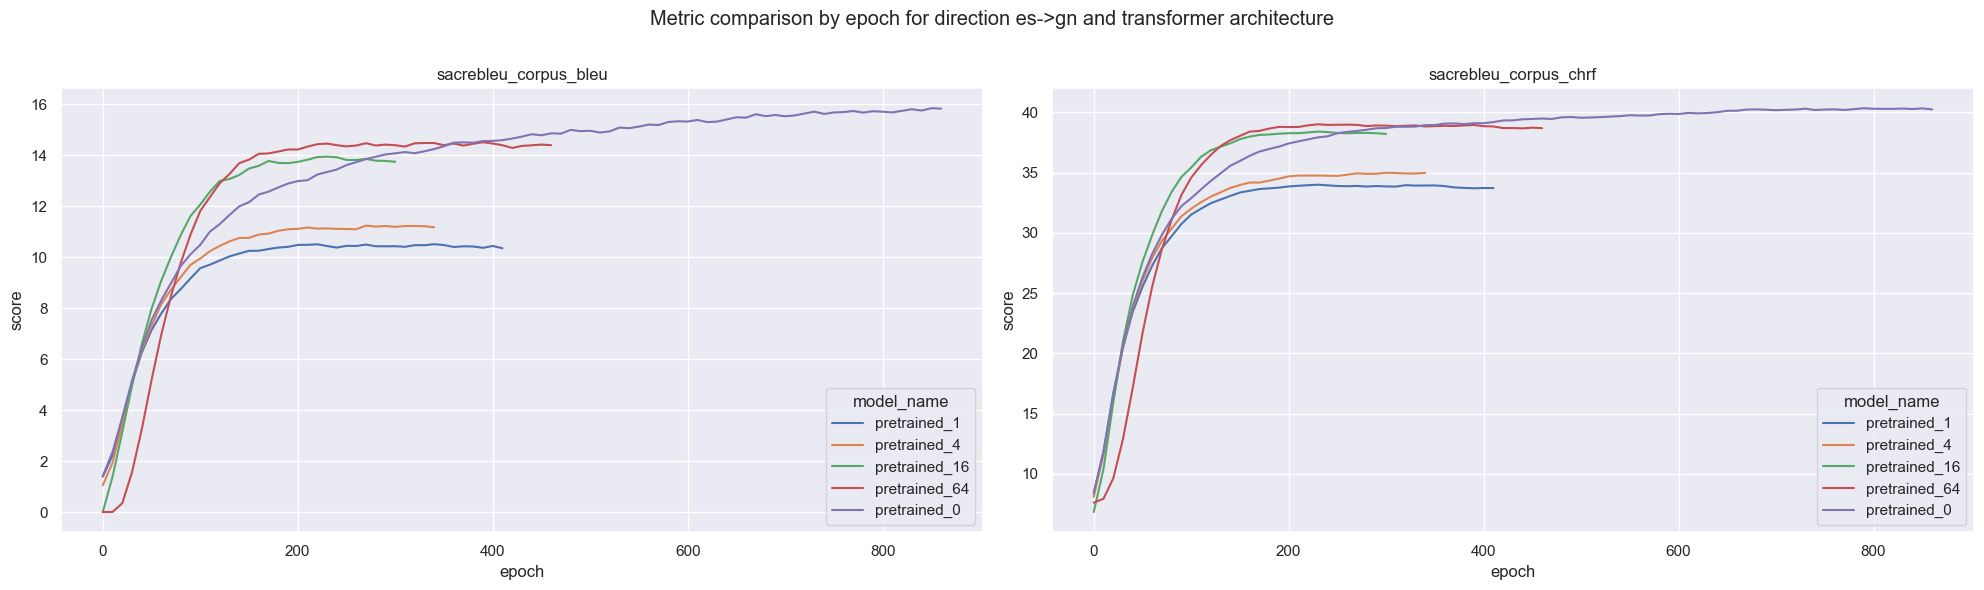

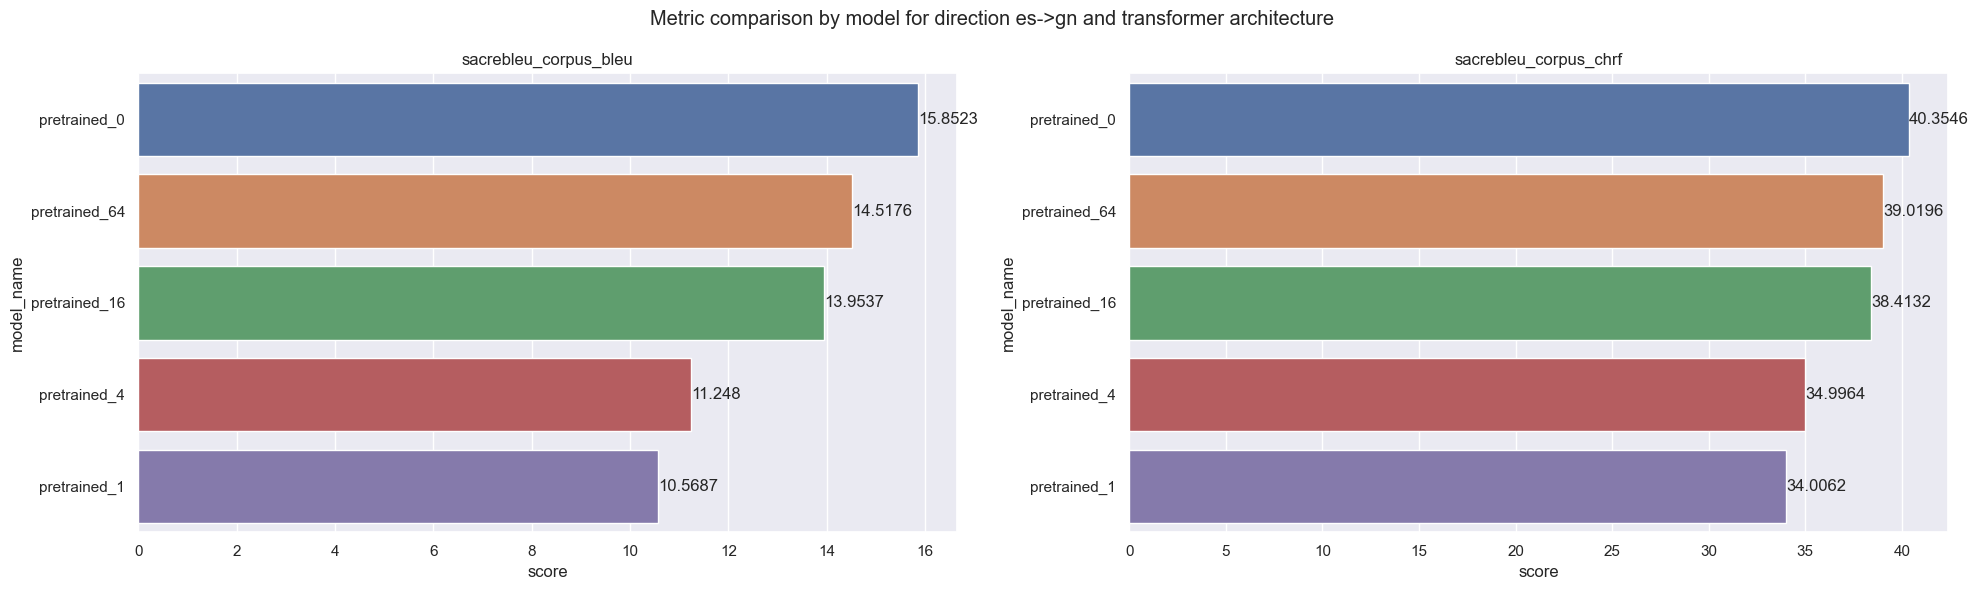

In [16]:
pretrained_grammar_transformer_es_gn_df['model_name'] = pretrained_grammar_transformer_es_gn_df['pretraining_epochs'].map(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_grammar_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_grammar_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

### **2. The Bible**

#### **2.1. Default Pretraining**

In [20]:
DEFAULT_RESULTS_BIBLE_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'default_pretraining_bible.csv')

In [21]:
results_df = pd.read_csv(DEFAULT_RESULTS_BIBLE_CSV)
results_df['date'] = pd.to_datetime(results_df['date'])
results_df = extract_epochs_from_name(results_df)
results_df = shift_epochs_from_epoch(results_df, from_=0)

In [22]:
results_without_pretraining = results_grammar_df[results_grammar_df['pretraining_epochs']=='0']
results_df = pd.concat([results_df, results_without_pretraining], axis=0)

In [23]:
default_bible_s2s_gn_es_df = filter_df_by_model(results_df, 's2s', 'gn')
default_bible_s2s_es_gn_df = filter_df_by_model(results_df, 's2s', 'es')
default_bible_transformer_gn_es_df = filter_df_by_model(results_df, 'transformer', 'gn')
default_bible_transformer_es_gn_df = filter_df_by_model(results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

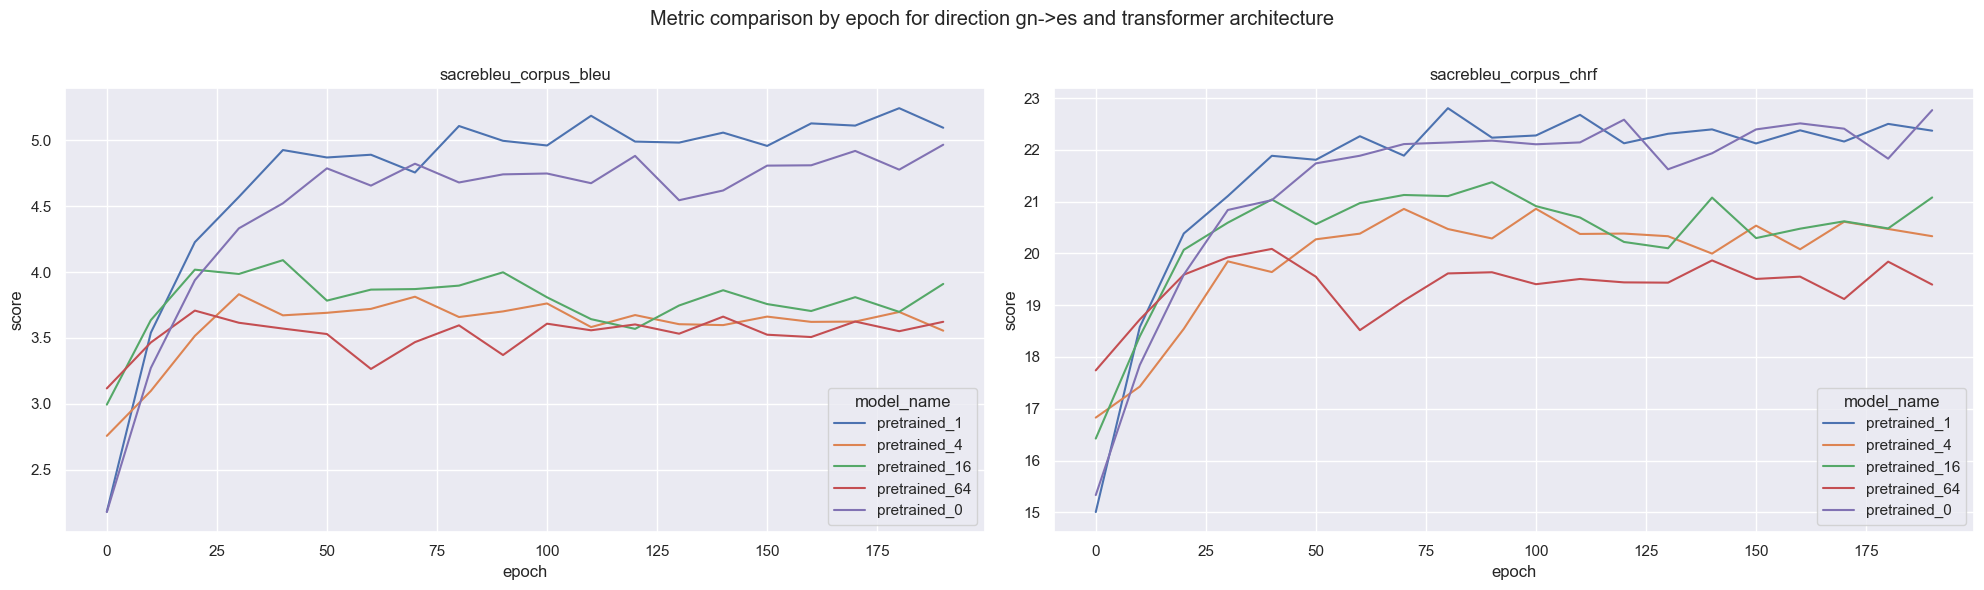

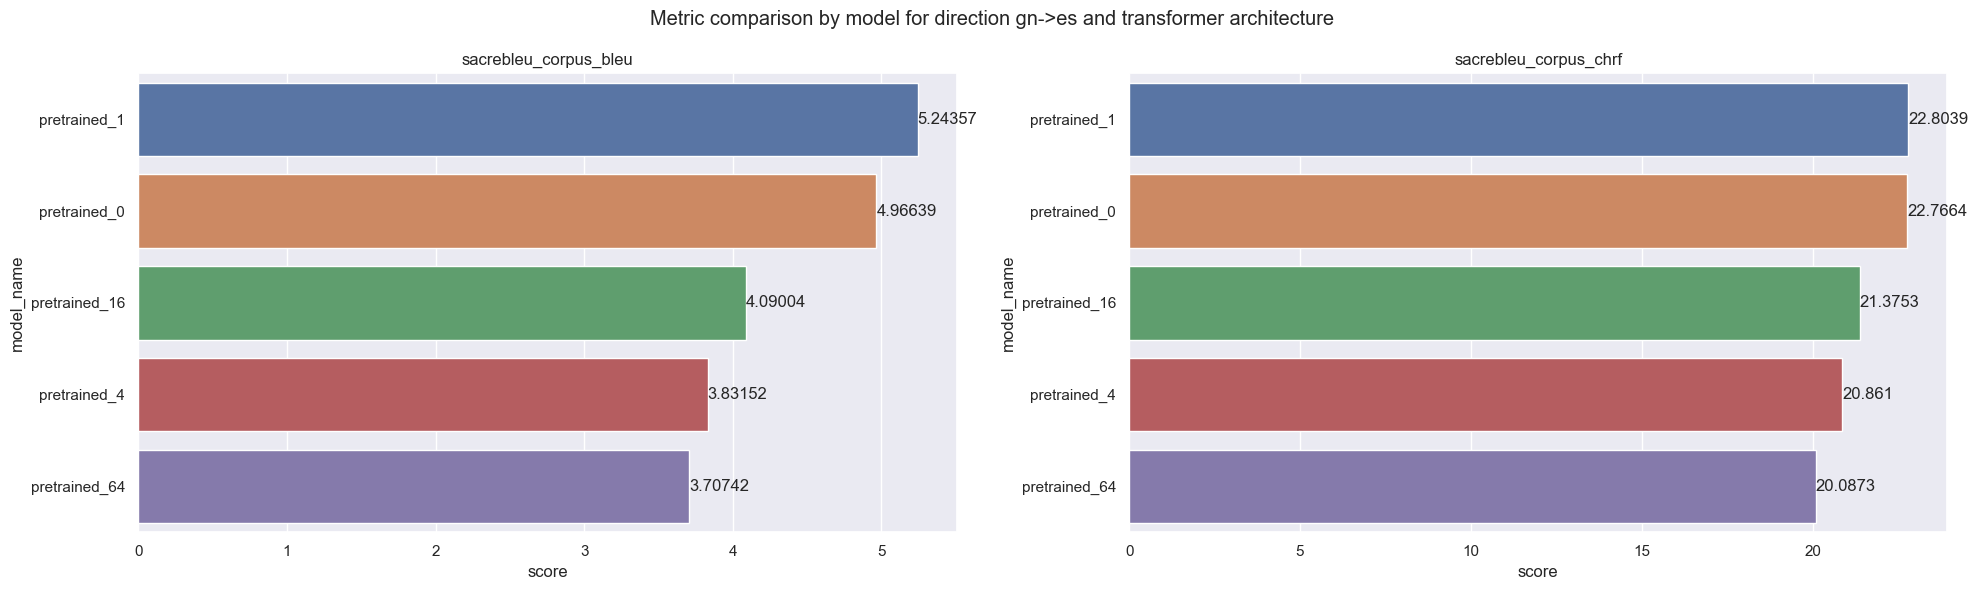

In [24]:
default_bible_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', default_bible_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(default_bible_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_bible_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

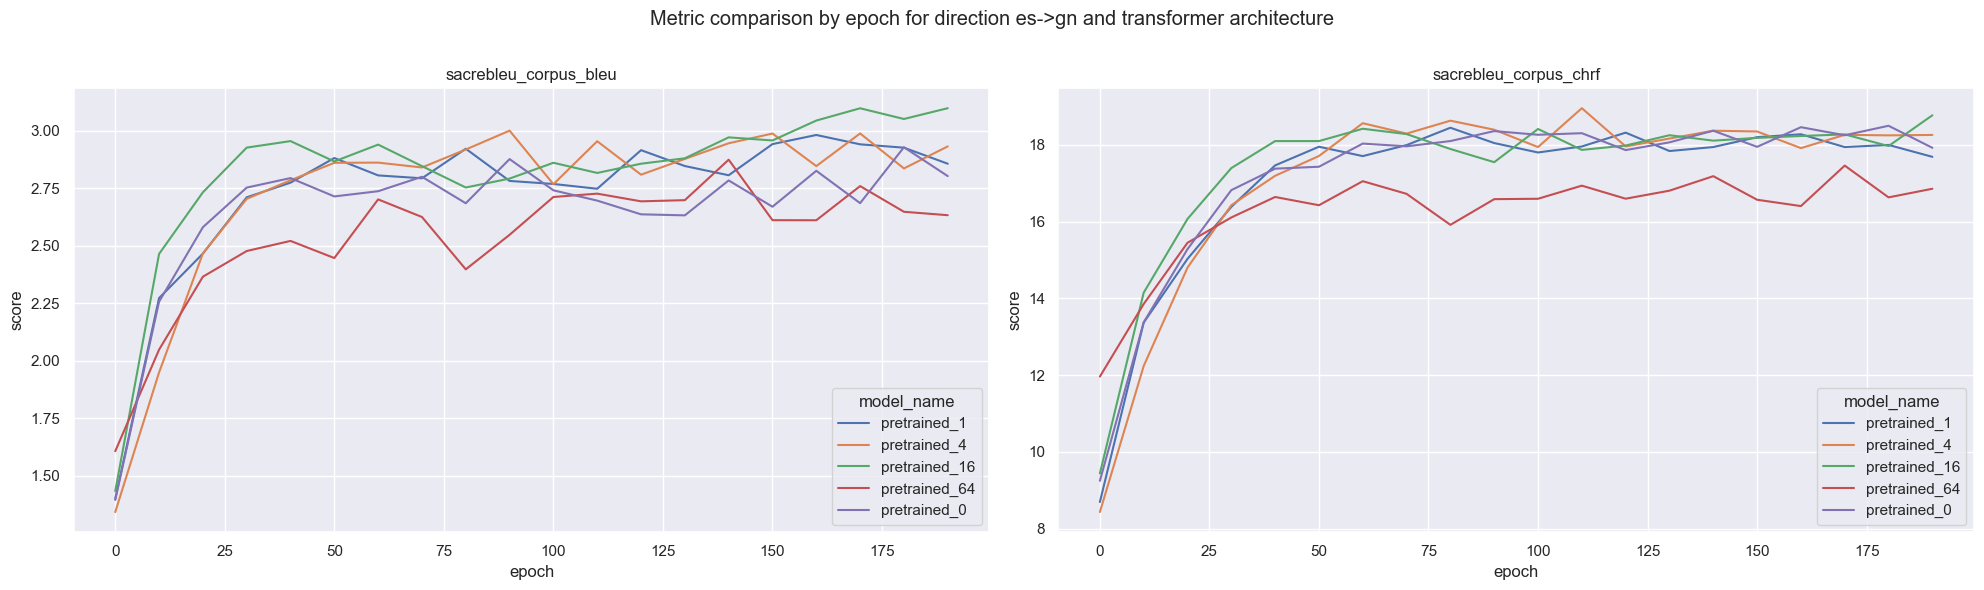

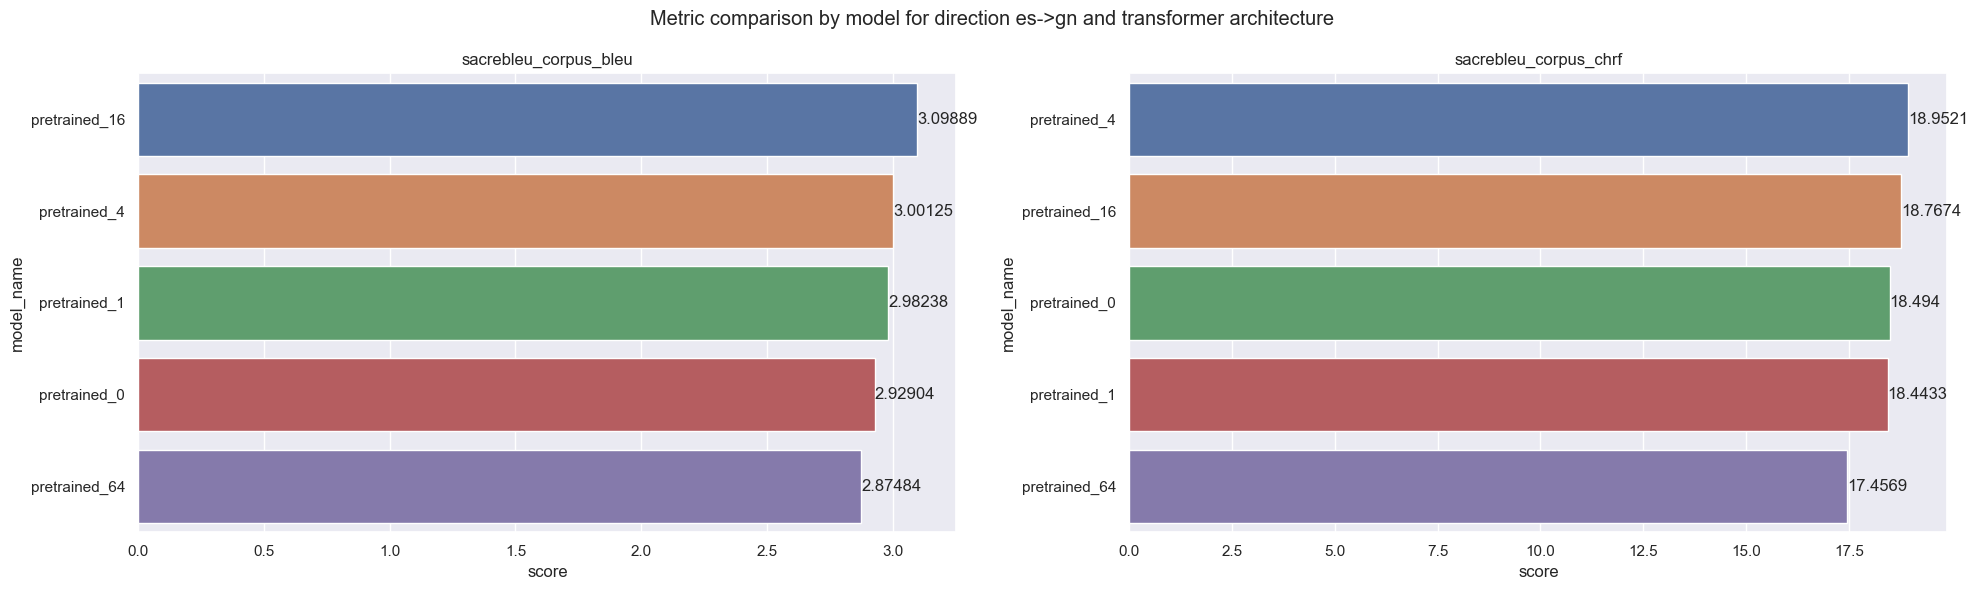

In [25]:
default_bible_s2s_es_gn_df['model_name'] = default_bible_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_bible_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_bible_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

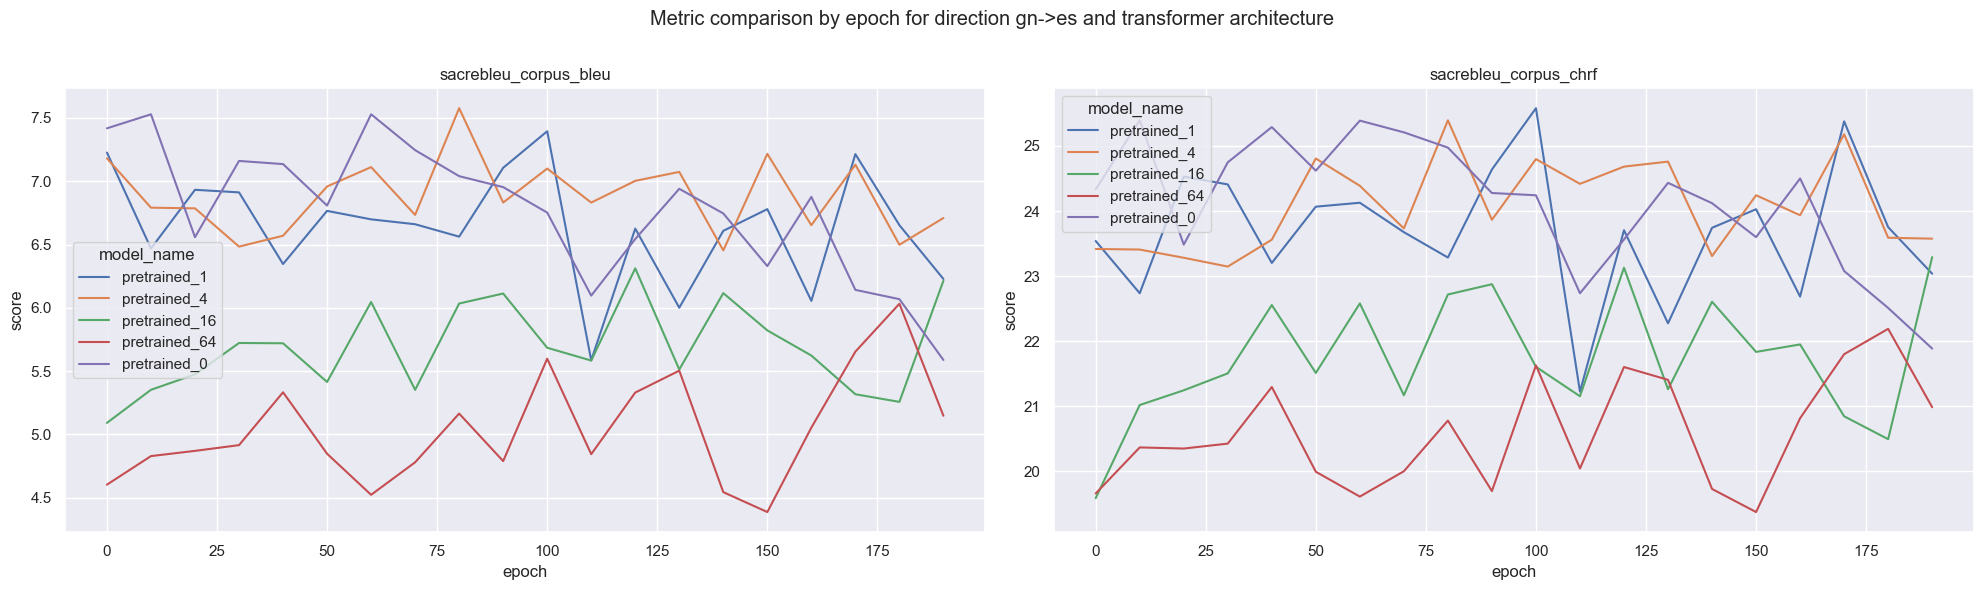

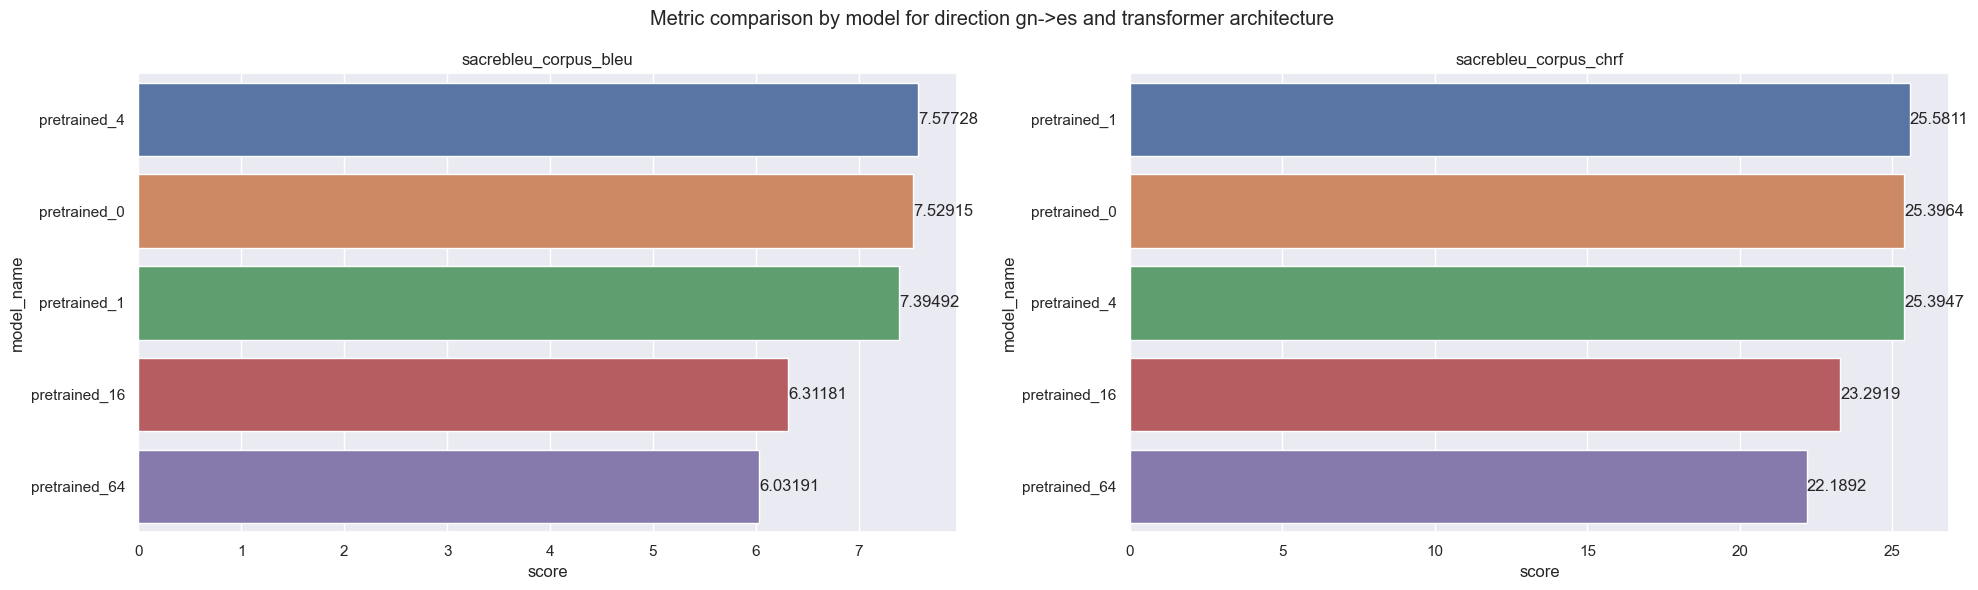

In [26]:
default_bible_transformer_gn_es_df['model_name'] = default_bible_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_bible_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_bible_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

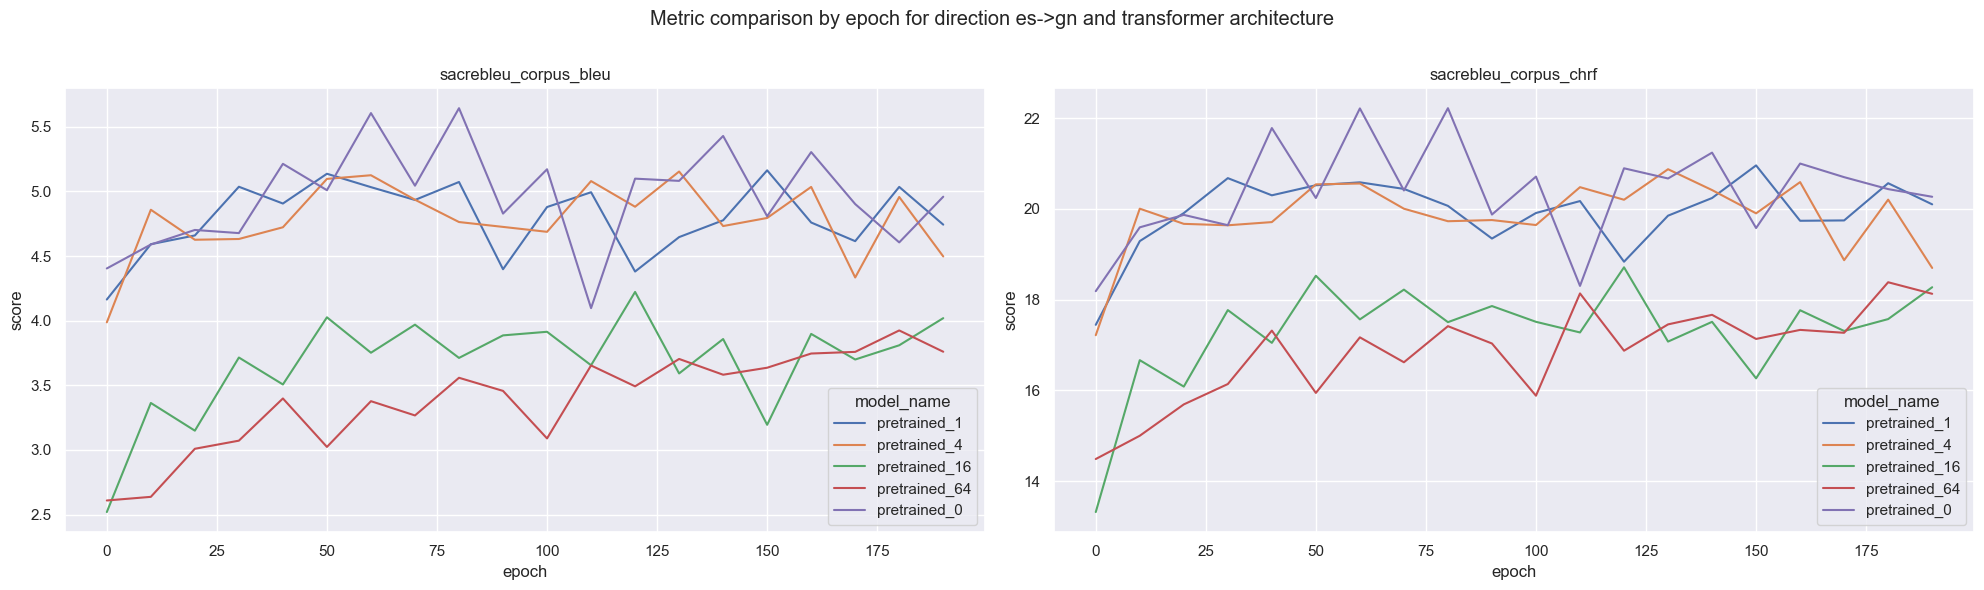

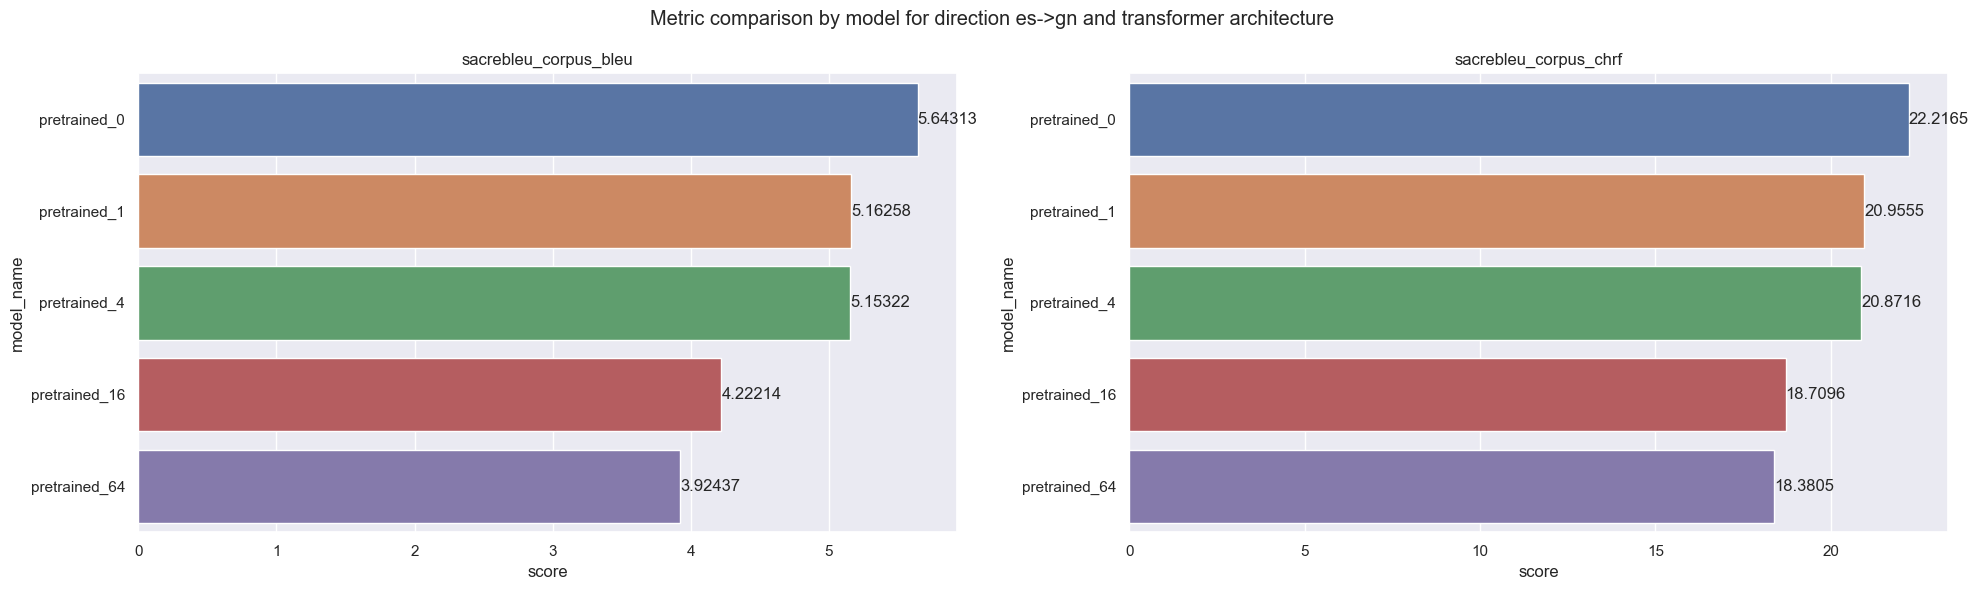

In [27]:
default_bible_transformer_es_gn_df['model_name'] = default_bible_transformer_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_bible_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_bible_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

#### **2.2. Finetuned Pretraining**

In [30]:
PRETRAINED_RESULTS_BIBLE_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'finetuned_pretraining_bible.csv')

In [31]:
pretrained_results_df = pd.read_csv(PRETRAINED_RESULTS_BIBLE_CSV)
finetuned_results_df = pd.read_csv(FINETUNED_RESULTS_CSV)
pretrained_results_df = pd.concat([pretrained_results_df, finetuned_results_df], axis=0)

finetuned_results_df = shift_epochs_from_epoch(finetuned_results_df, from_=0)
pretrained_results_df = shift_epochs_from_epoch(pretrained_results_df, from_=0)

pretrained_results_df['date'] = pd.to_datetime(pretrained_results_df['date'])
pretrained_results_df = extract_epochs_from_name(pretrained_results_df)

In [32]:
pretrained_bible_s2s_gn_es_df = filter_df_by_model(pretrained_results_df, 's2s', 'gn')
pretrained_bible_s2s_es_gn_df = filter_df_by_model(pretrained_results_df, 's2s', 'es')
pretrained_bible_transformer_gn_es_df = filter_df_by_model(pretrained_results_df, 'transformer', 'gn')
pretrained_bible_transformer_es_gn_df = filter_df_by_model(pretrained_results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

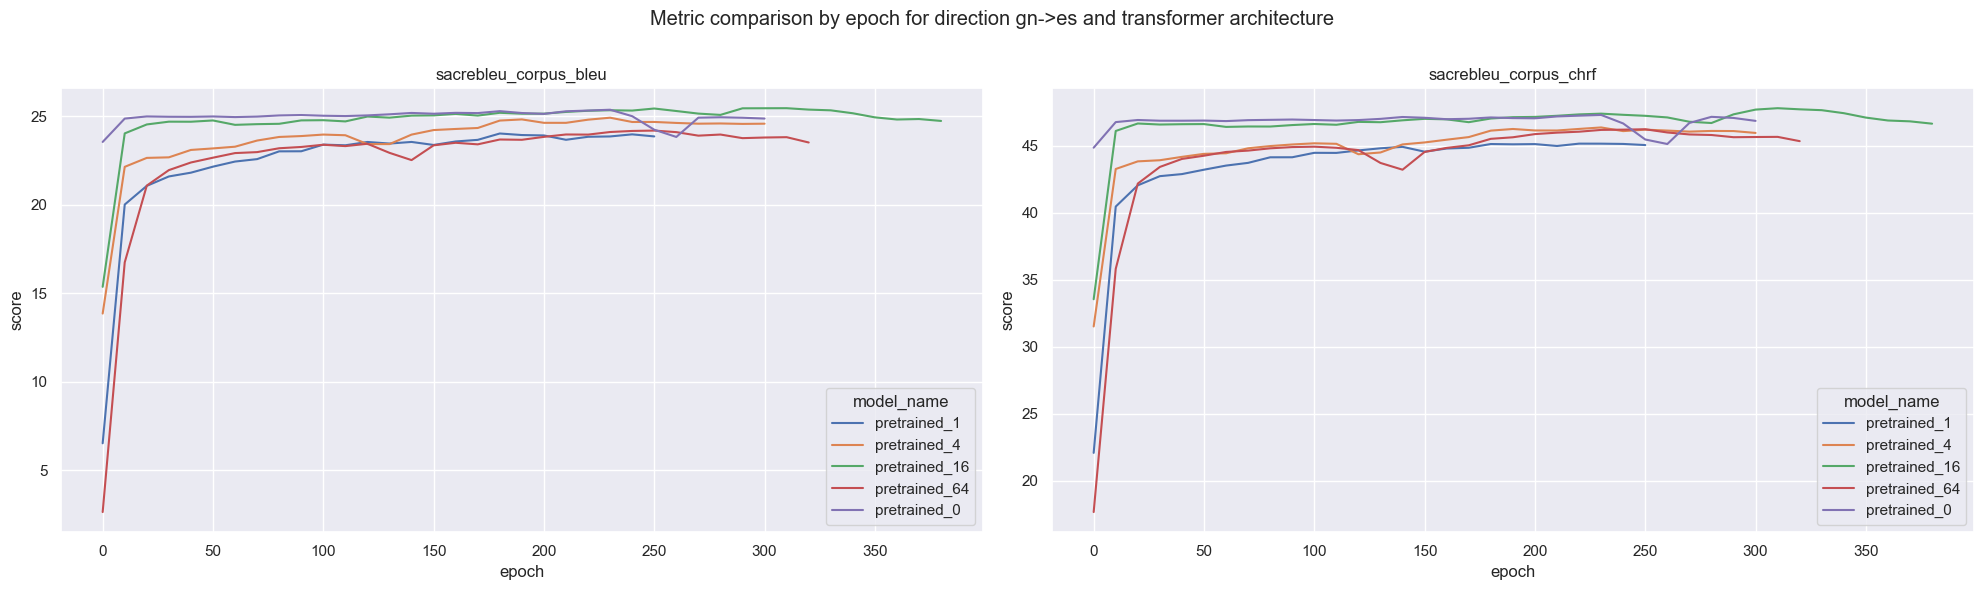

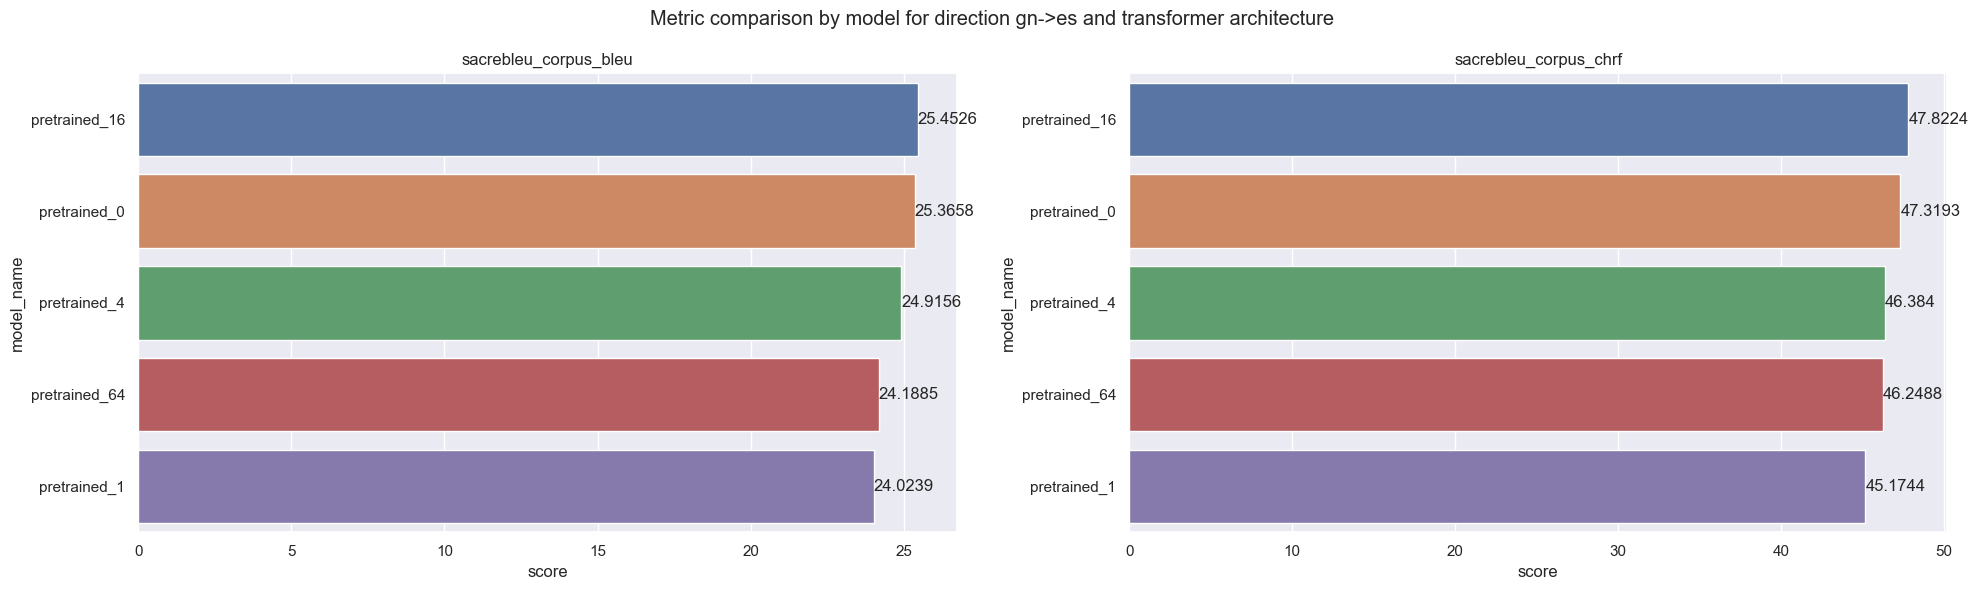

In [33]:
pretrained_bible_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', pretrained_bible_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(pretrained_bible_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_bible_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

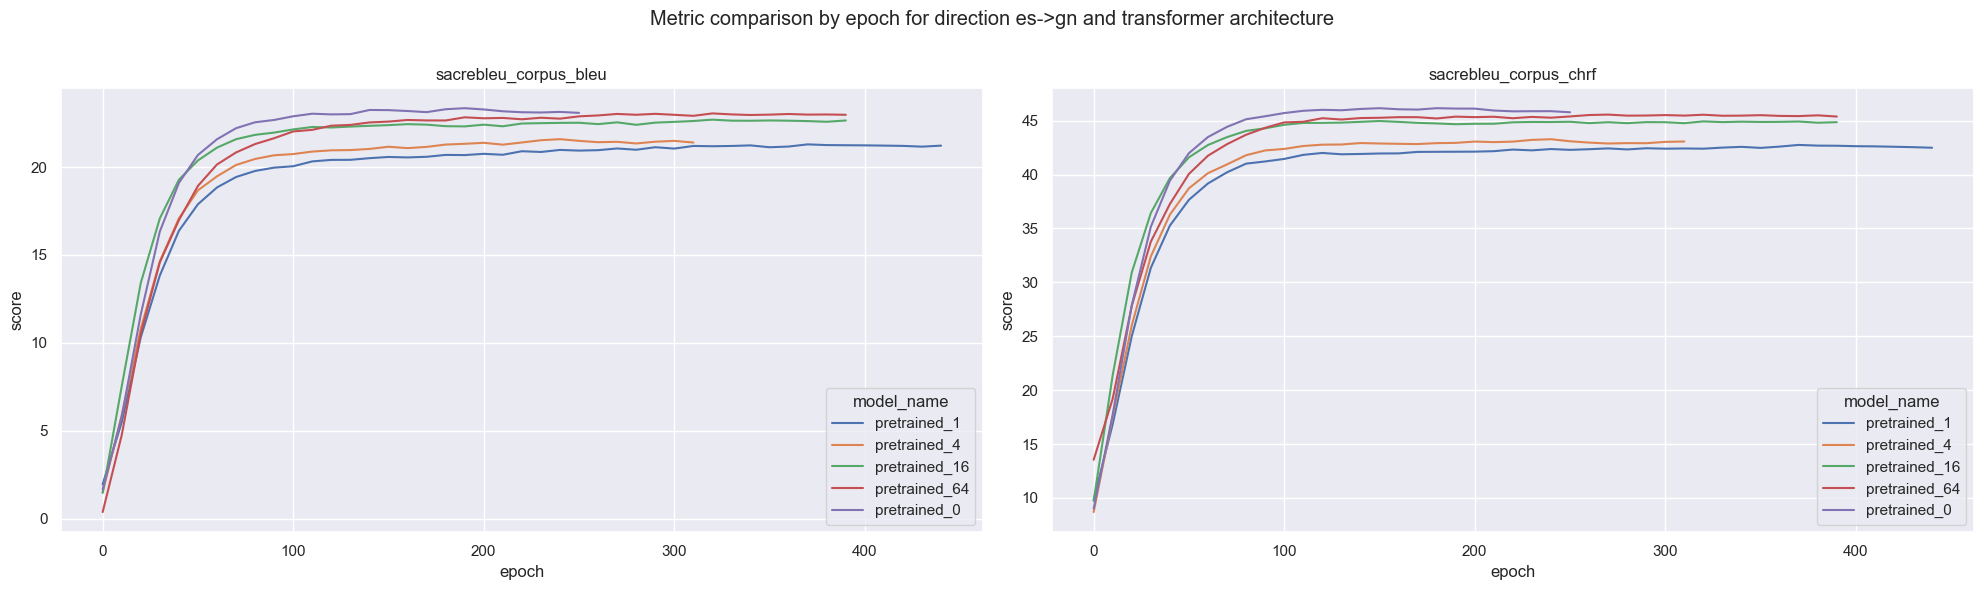

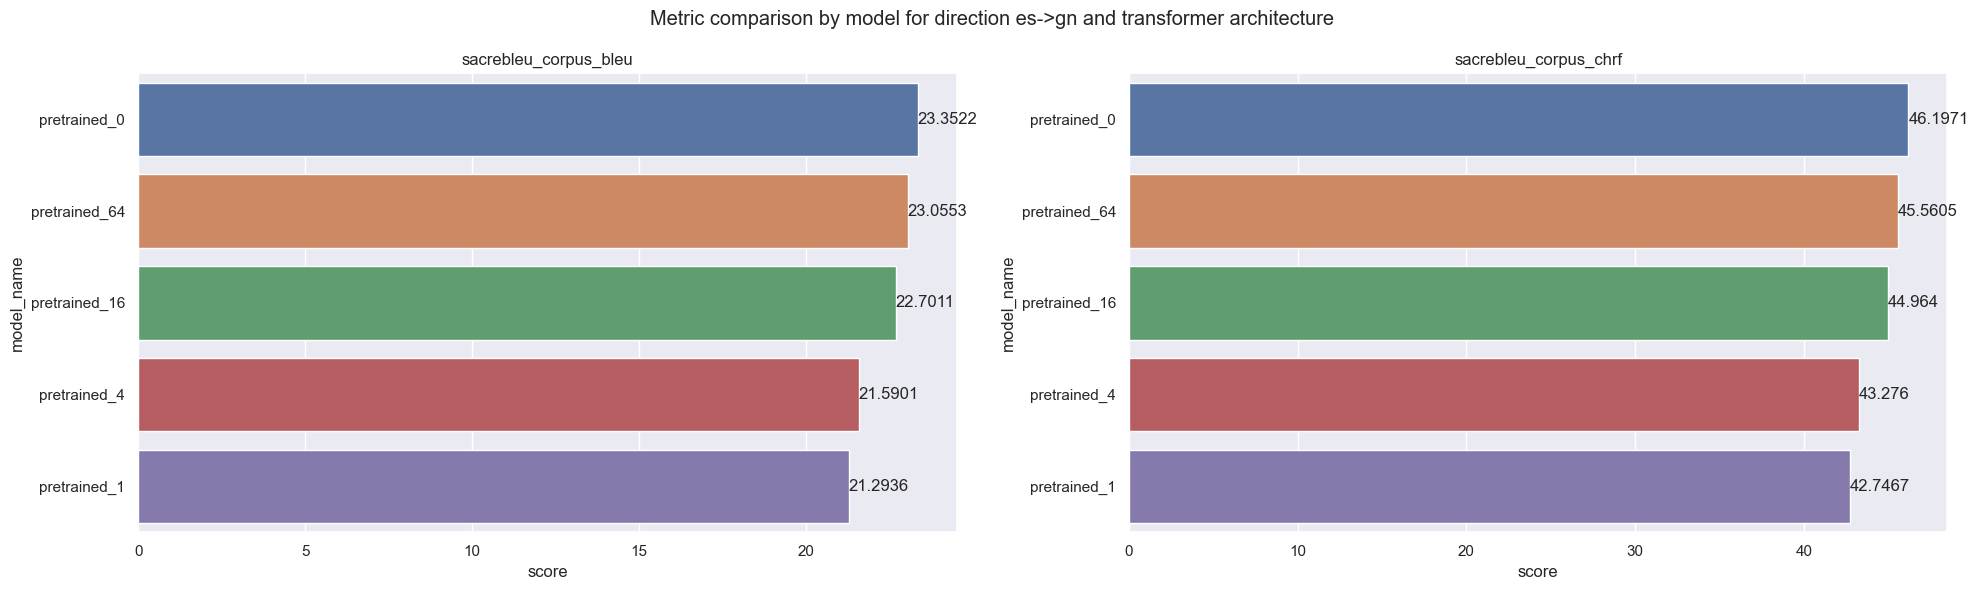

In [34]:
pretrained_bible_s2s_es_gn_df['model_name'] = pretrained_bible_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_bible_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_bible_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

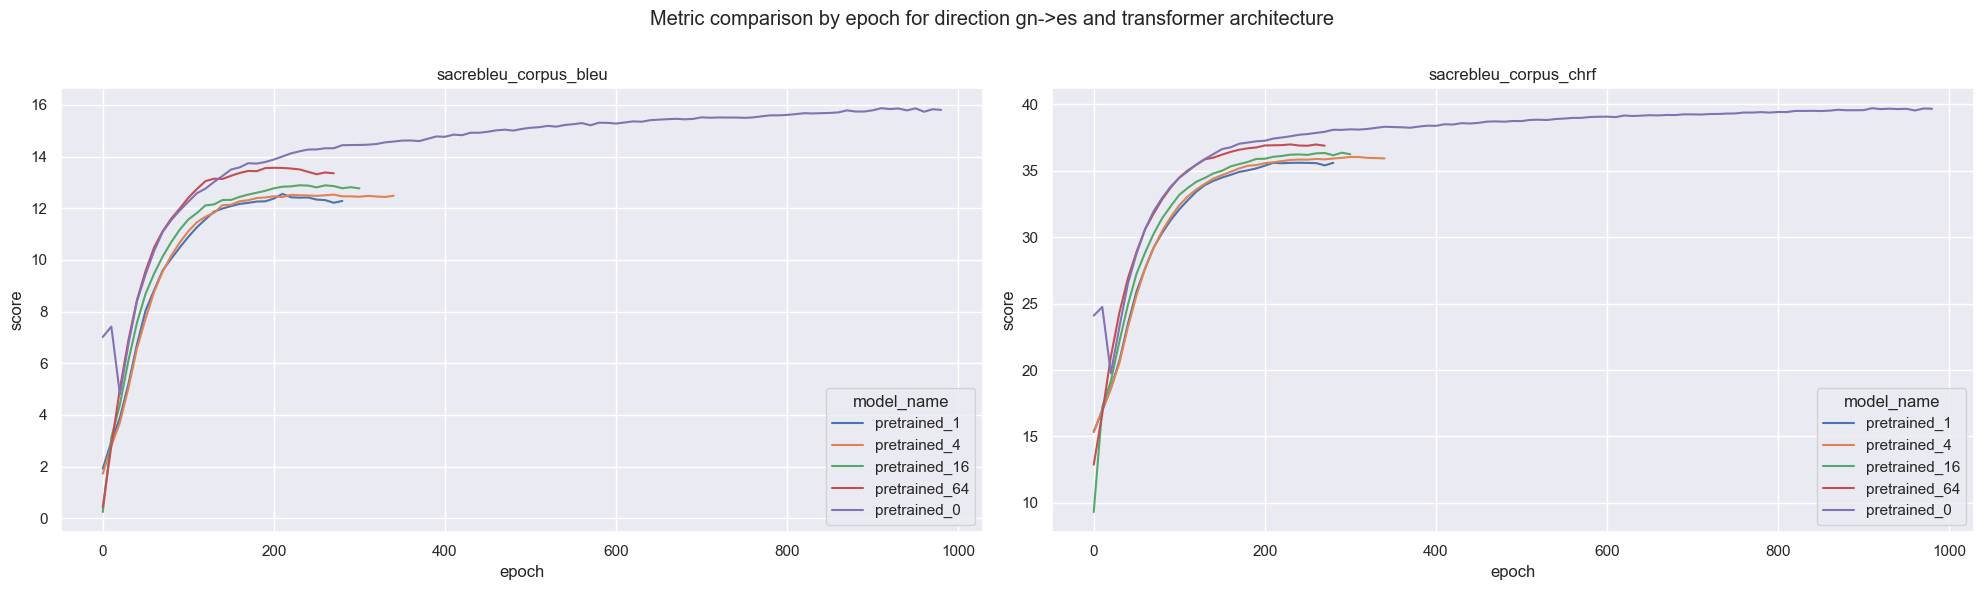

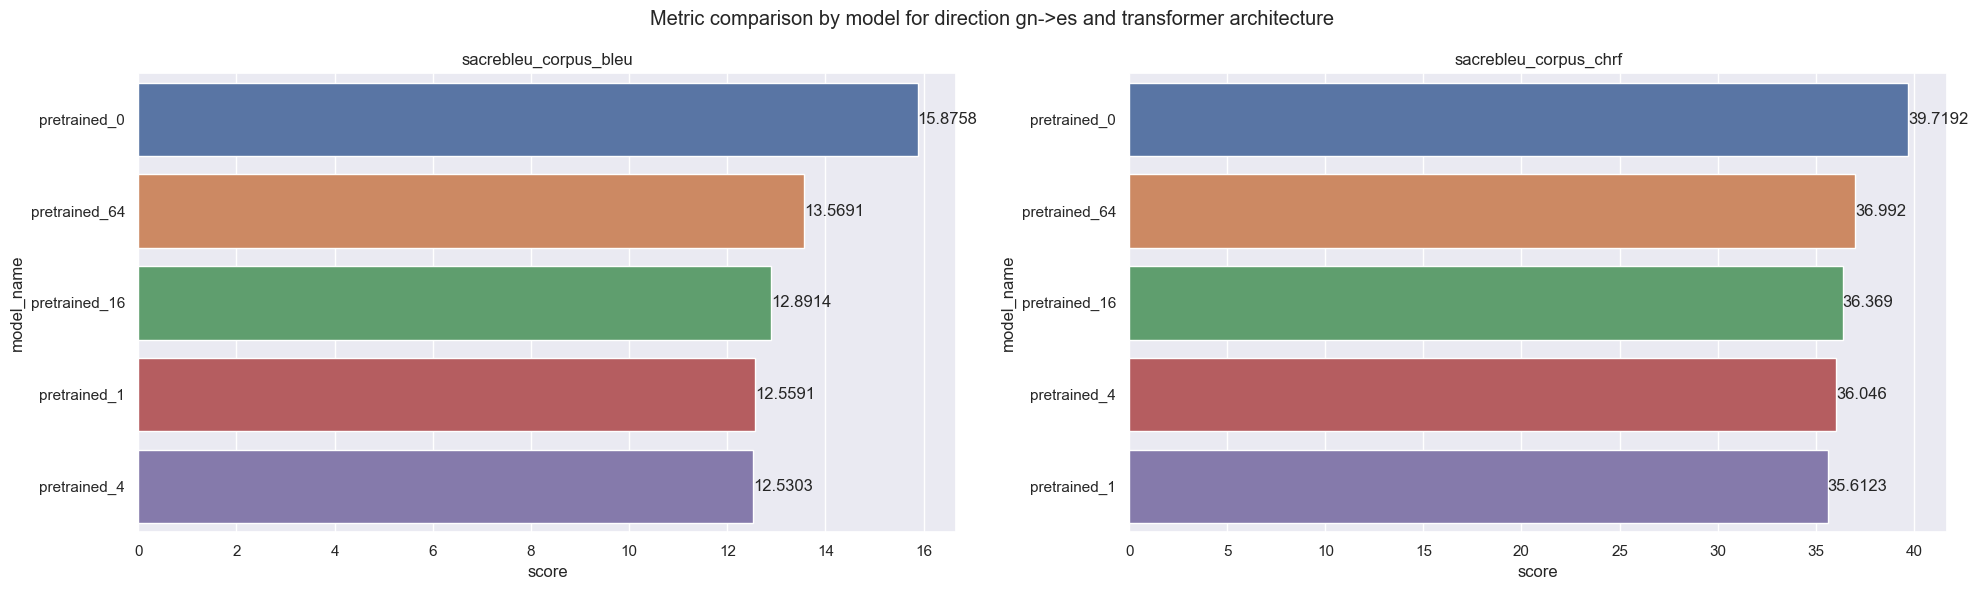

In [35]:
pretrained_bible_transformer_gn_es_df['model_name'] = pretrained_bible_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_bible_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_bible_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

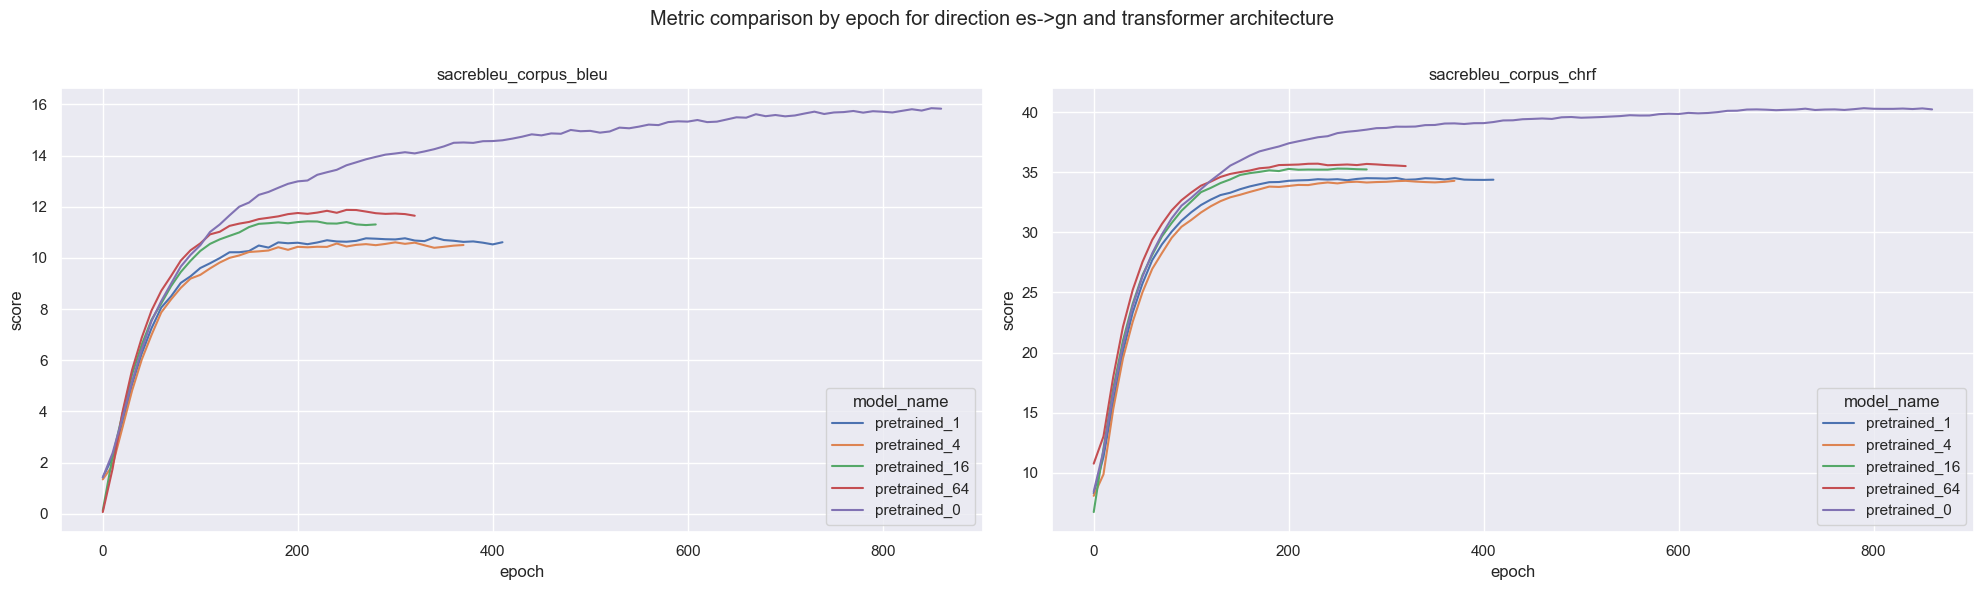

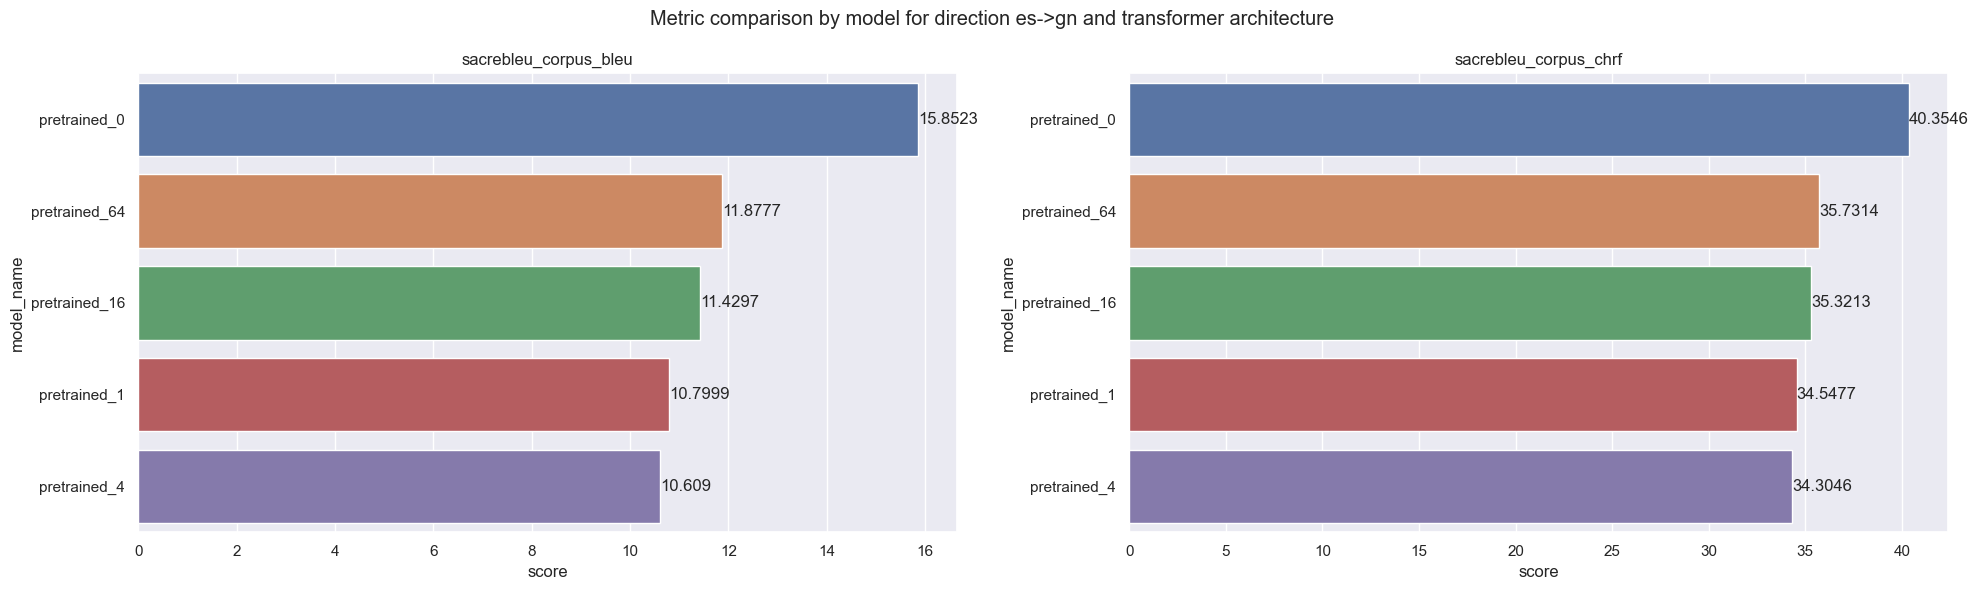

In [36]:
pretrained_bible_transformer_es_gn_df['model_name'] = pretrained_bible_transformer_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_bible_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_bible_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

### **3. Ancora**

#### **3.1. Default Pretraining**

In [39]:
DEFAULT_RESULTS_ANCORA_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'default_pretraining_ancora.csv')

In [40]:
results_df = pd.read_csv(DEFAULT_RESULTS_ANCORA_CSV)
results_without_pretraining = results_grammar_df[results_grammar_df['pretraining_epochs']=='0']
results_df = pd.concat([results_df, results_without_pretraining], axis=0)

results_df = shift_epochs_from_epoch(results_df, from_=0)

results_df['date'] = pd.to_datetime(results_df['date'])
results_df = extract_epochs_from_name(results_df)

In [41]:
default_ancora_s2s_gn_es_df = filter_df_by_model(results_df, 's2s', 'gn')
default_ancora_s2s_es_gn_df = filter_df_by_model(results_df, 's2s', 'es')
default_ancora_transformer_gn_es_df = filter_df_by_model(results_df, 'transformer', 'gn')
default_ancora_transformer_es_gn_df = filter_df_by_model(results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

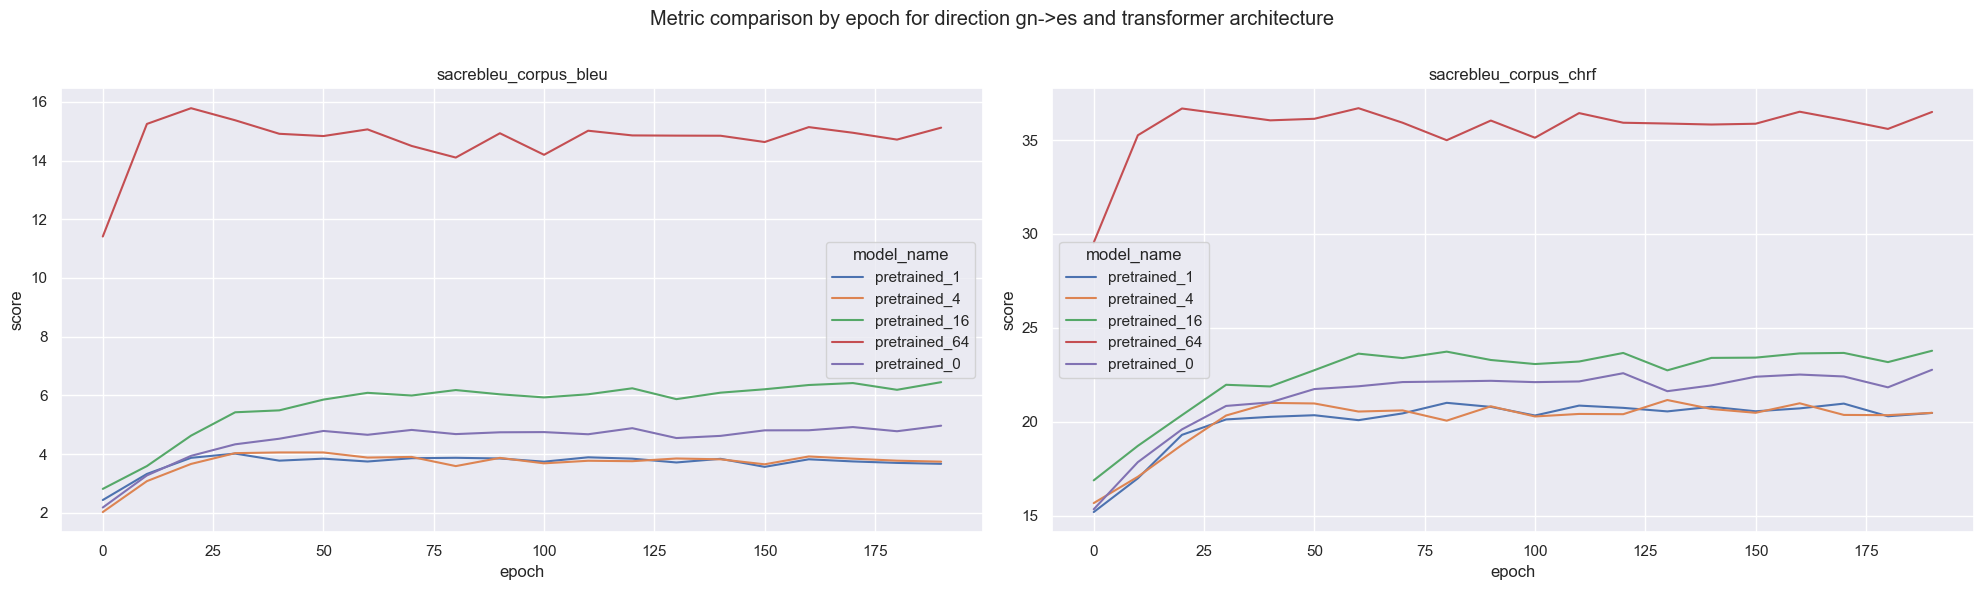

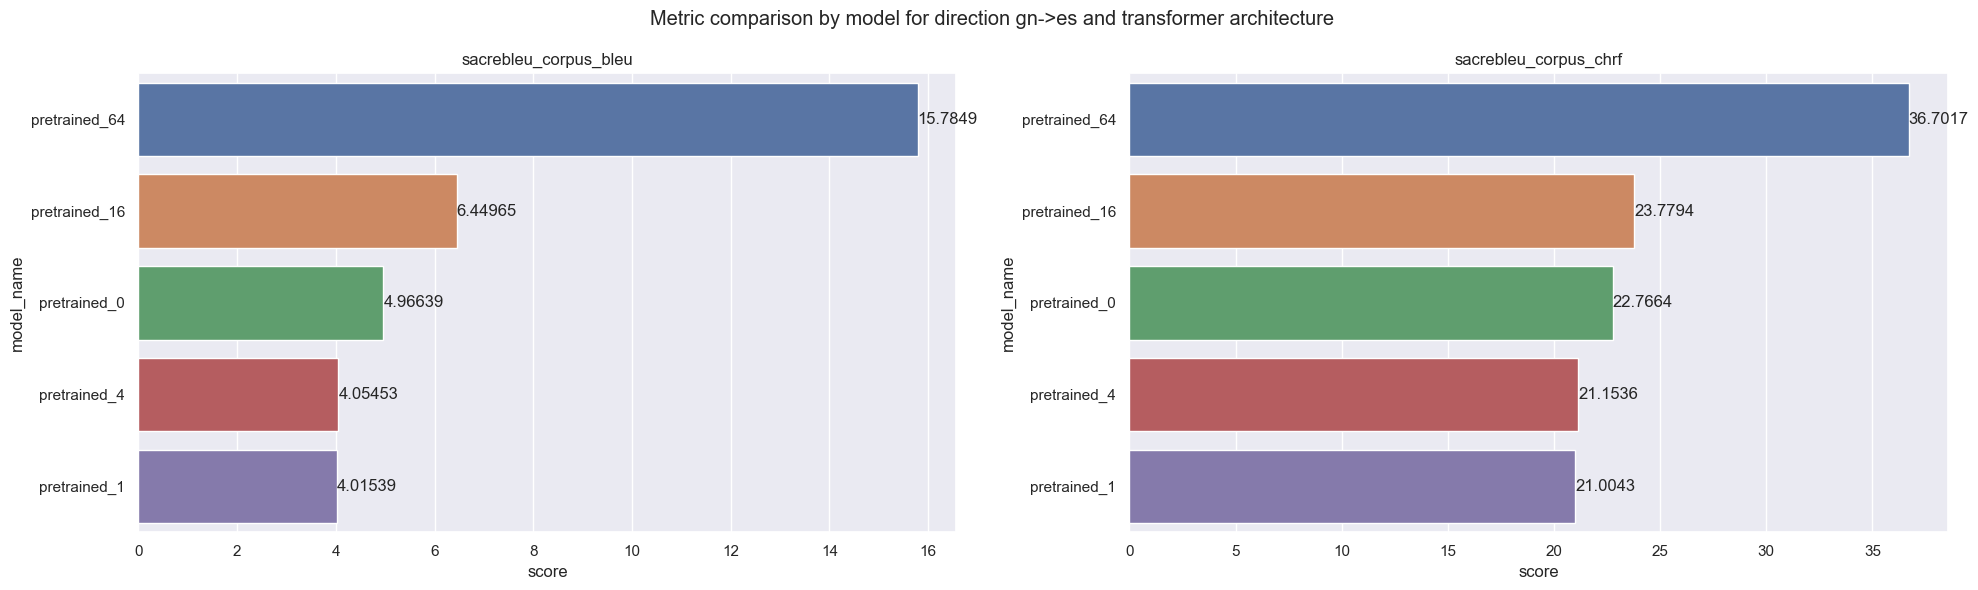

In [42]:
default_ancora_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', default_ancora_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(default_ancora_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_ancora_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

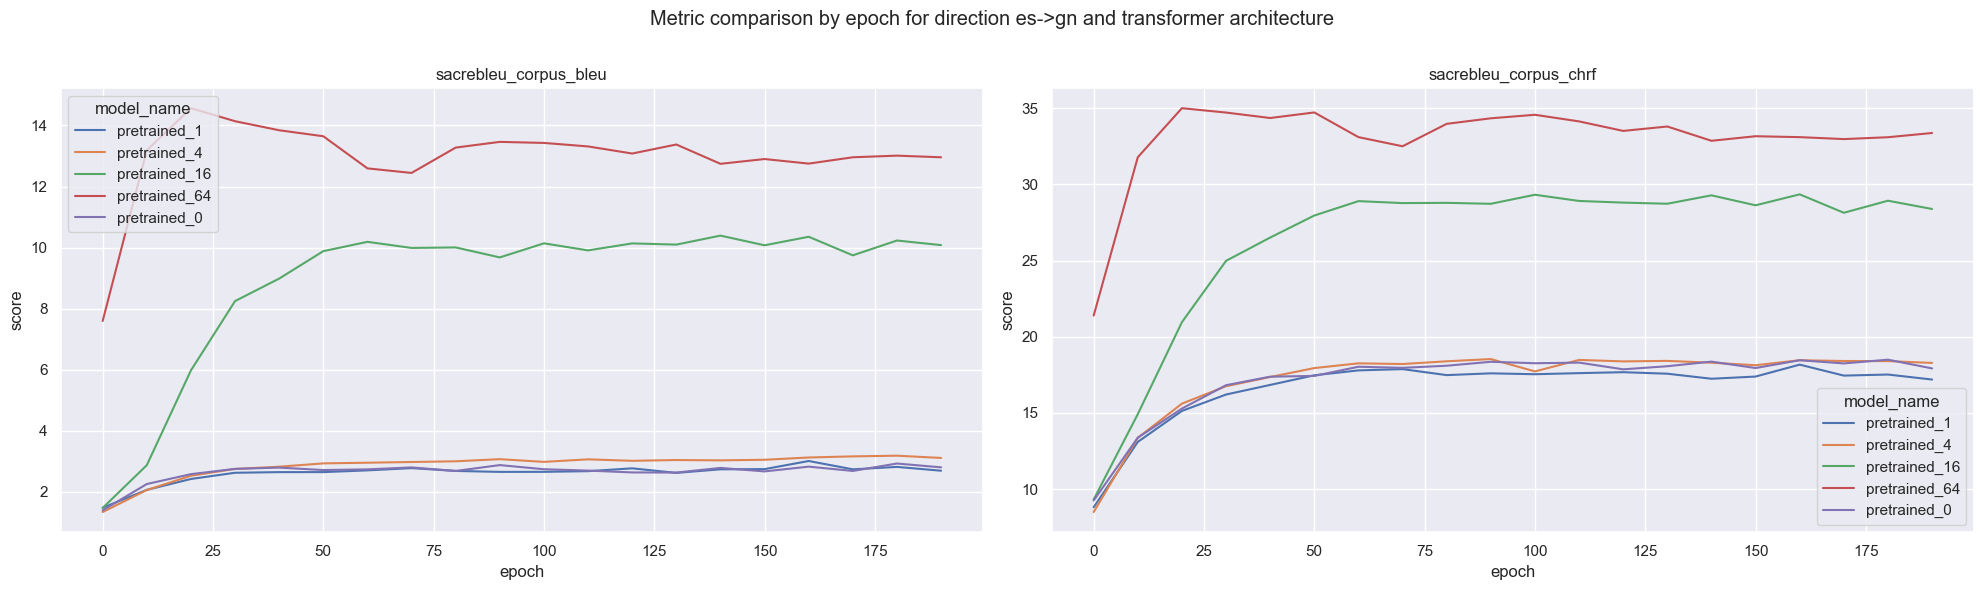

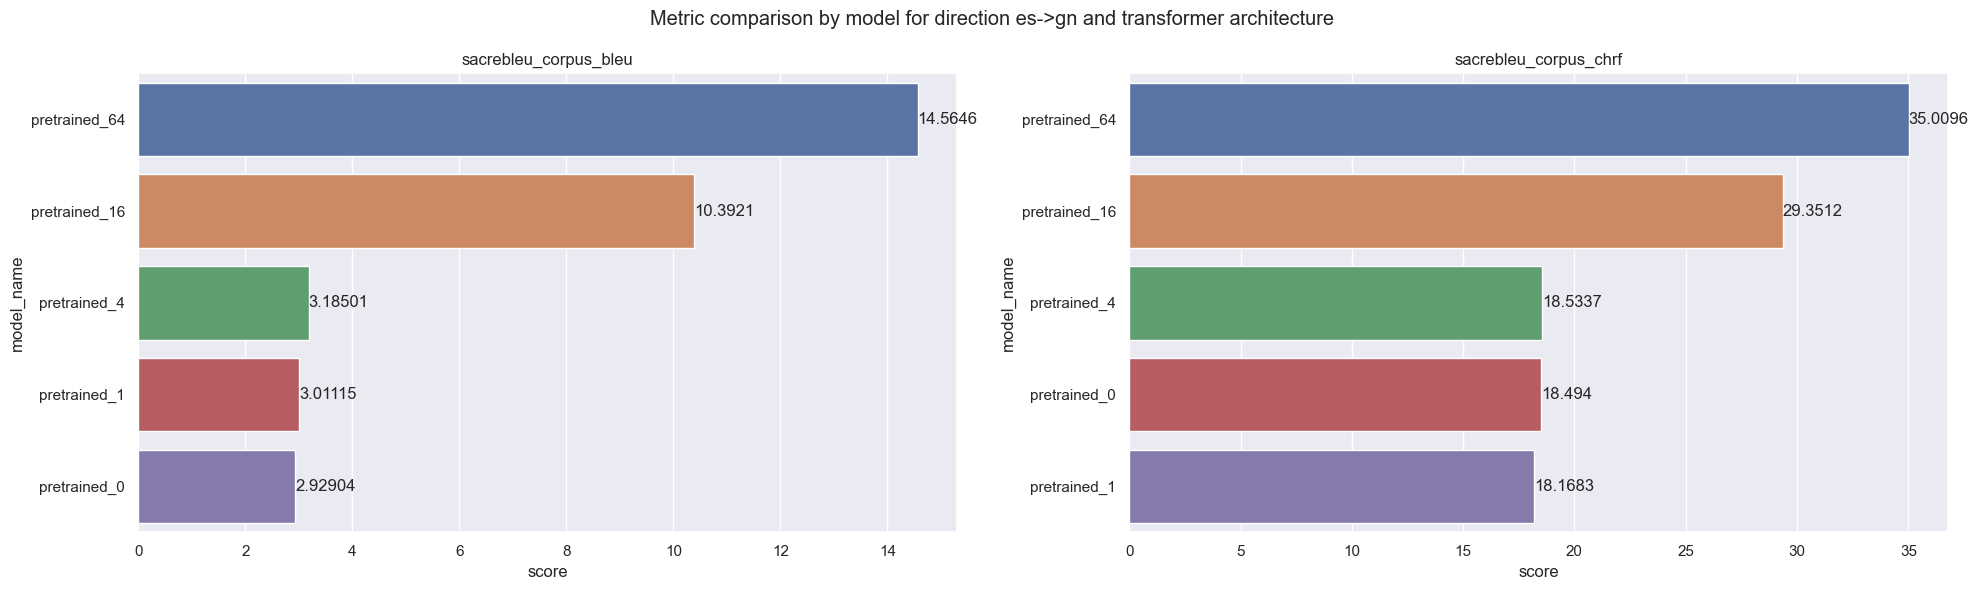

In [43]:
default_ancora_s2s_es_gn_df['model_name'] = default_ancora_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_ancora_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_ancora_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

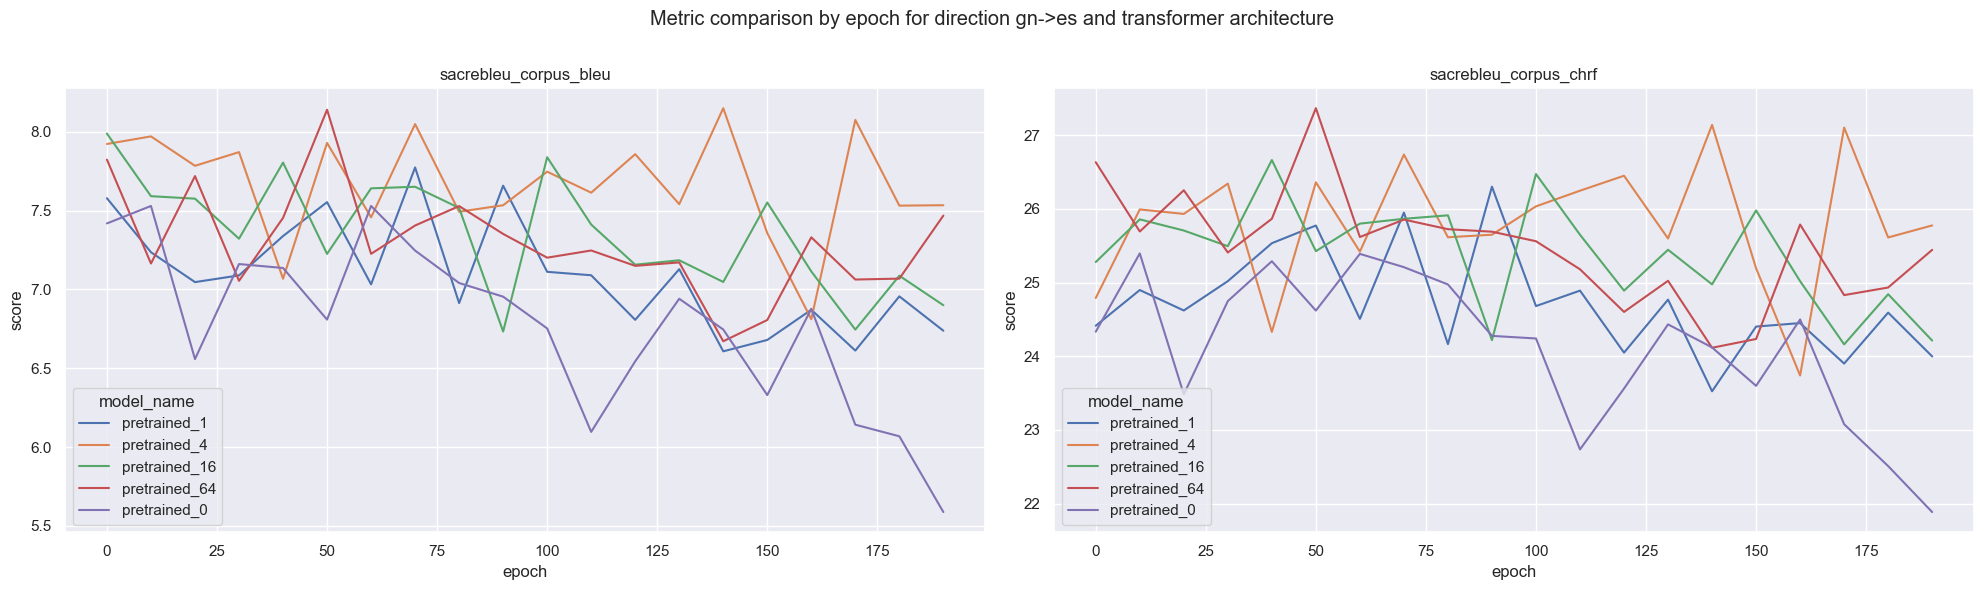

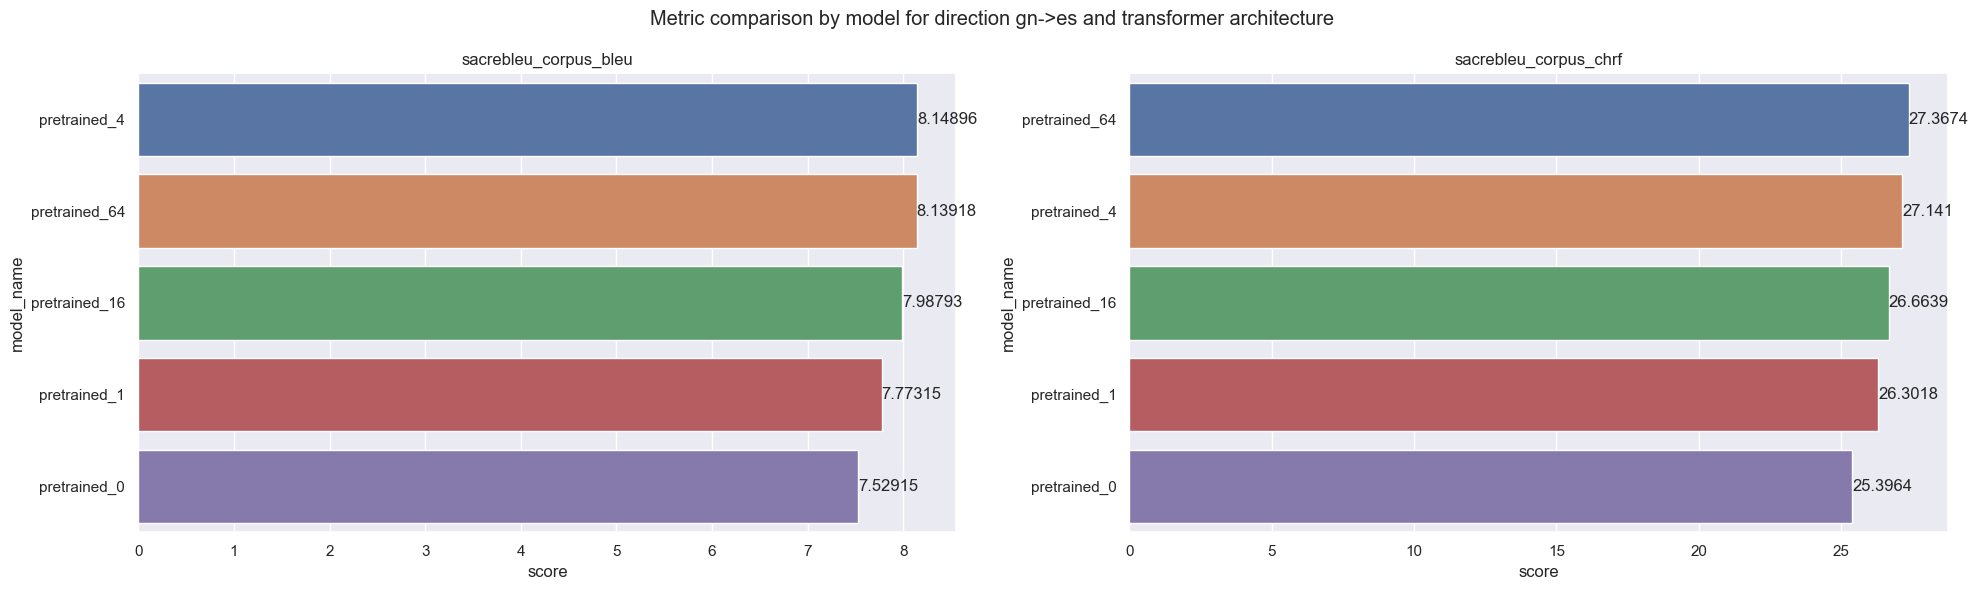

In [44]:
default_ancora_transformer_gn_es_df['model_name'] = default_ancora_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_ancora_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_ancora_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

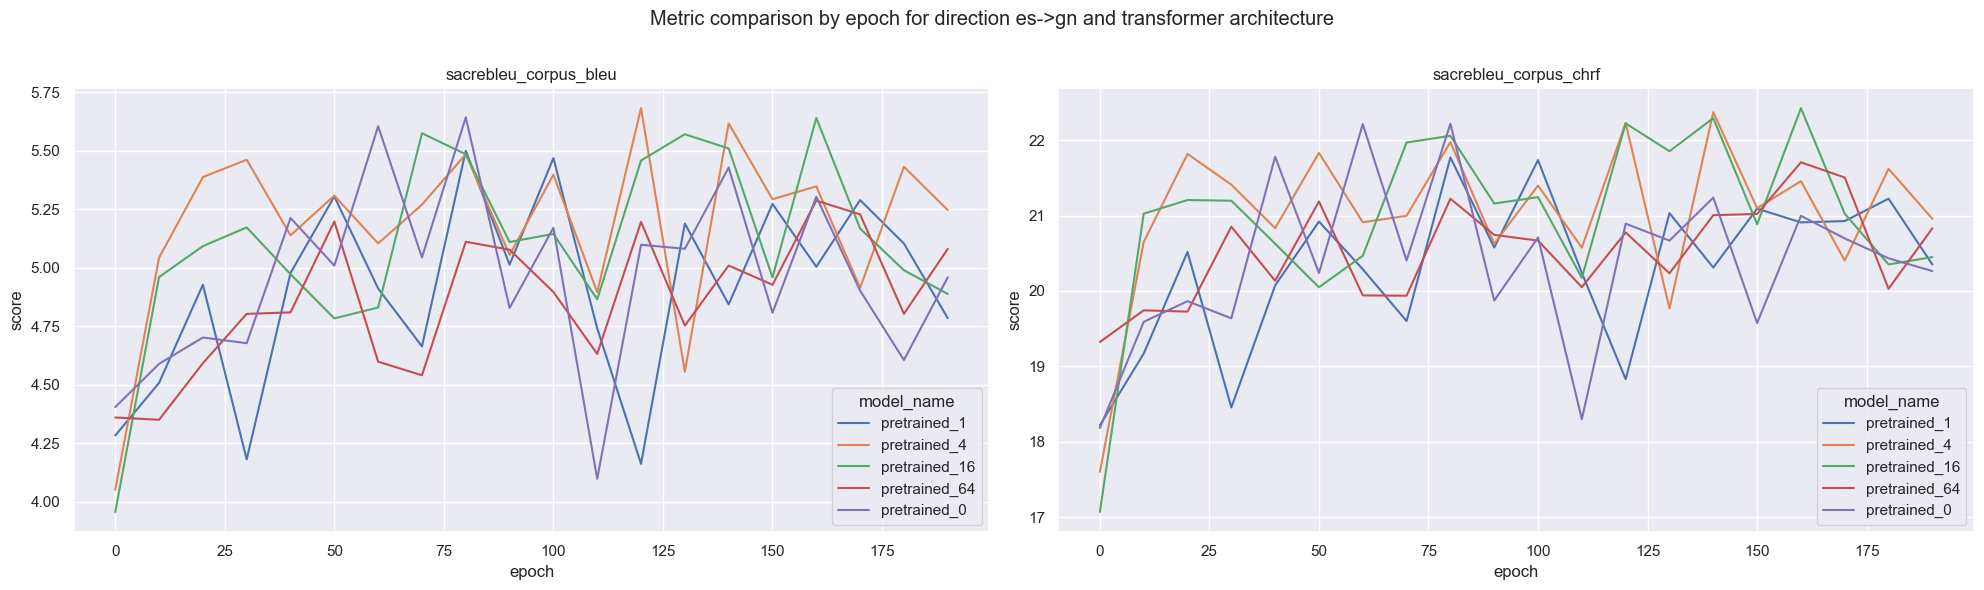

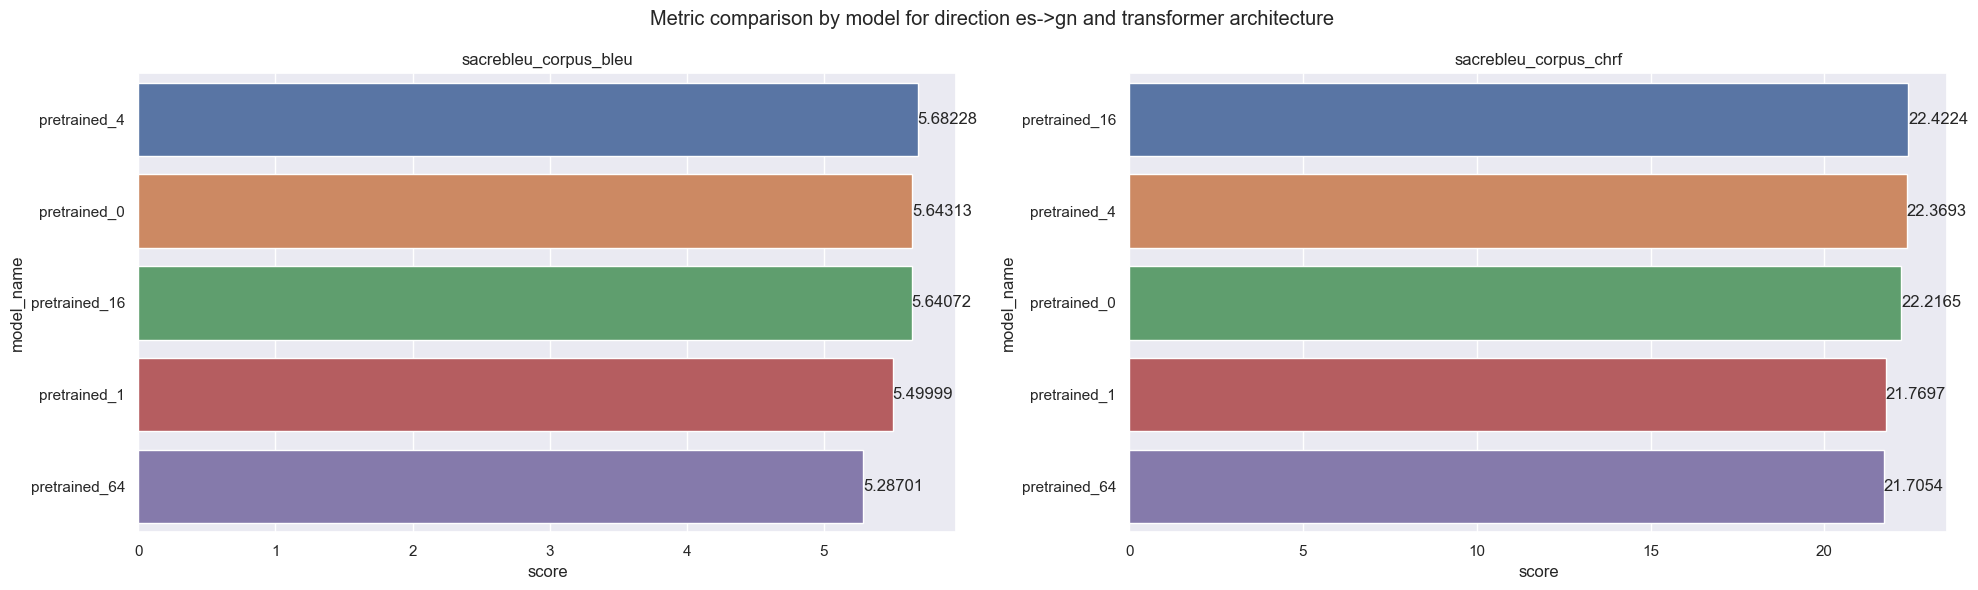

In [45]:
default_ancora_transformer_es_gn_df['model_name'] = default_ancora_transformer_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_ancora_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_ancora_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

#### **3.2. Tuned Pretraining**

In [48]:
PRETRAINED_RESULTS_ANCORA_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'finetuned_pretraining_ancora.csv')

In [49]:
pretrained_results_df = pd.read_csv(PRETRAINED_RESULTS_ANCORA_CSV)
finetuned_results_df = pd.read_csv(FINETUNED_RESULTS_CSV)
pretrained_results_df = pd.concat([pretrained_results_df, finetuned_results_df], axis=0)

pretrained_results_df = shift_epochs_from_epoch(pretrained_results_df, from_=0)
finetuned_results_df = shift_epochs_from_epoch(finetuned_results_df, from_=0)

pretrained_results_df['date'] = pd.to_datetime(pretrained_results_df['date'])
pretrained_results_df = extract_epochs_from_name(pretrained_results_df)

In [50]:
pretrained_ancora_s2s_gn_es_df = filter_df_by_model(pretrained_results_df, 's2s', 'gn')
pretrained_ancora_s2s_es_gn_df = filter_df_by_model(pretrained_results_df, 's2s', 'es')
pretrained_ancora_transformer_gn_es_df = filter_df_by_model(pretrained_results_df, 'transformer', 'gn')
pretrained_ancora_transformer_es_gn_df = filter_df_by_model(pretrained_results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

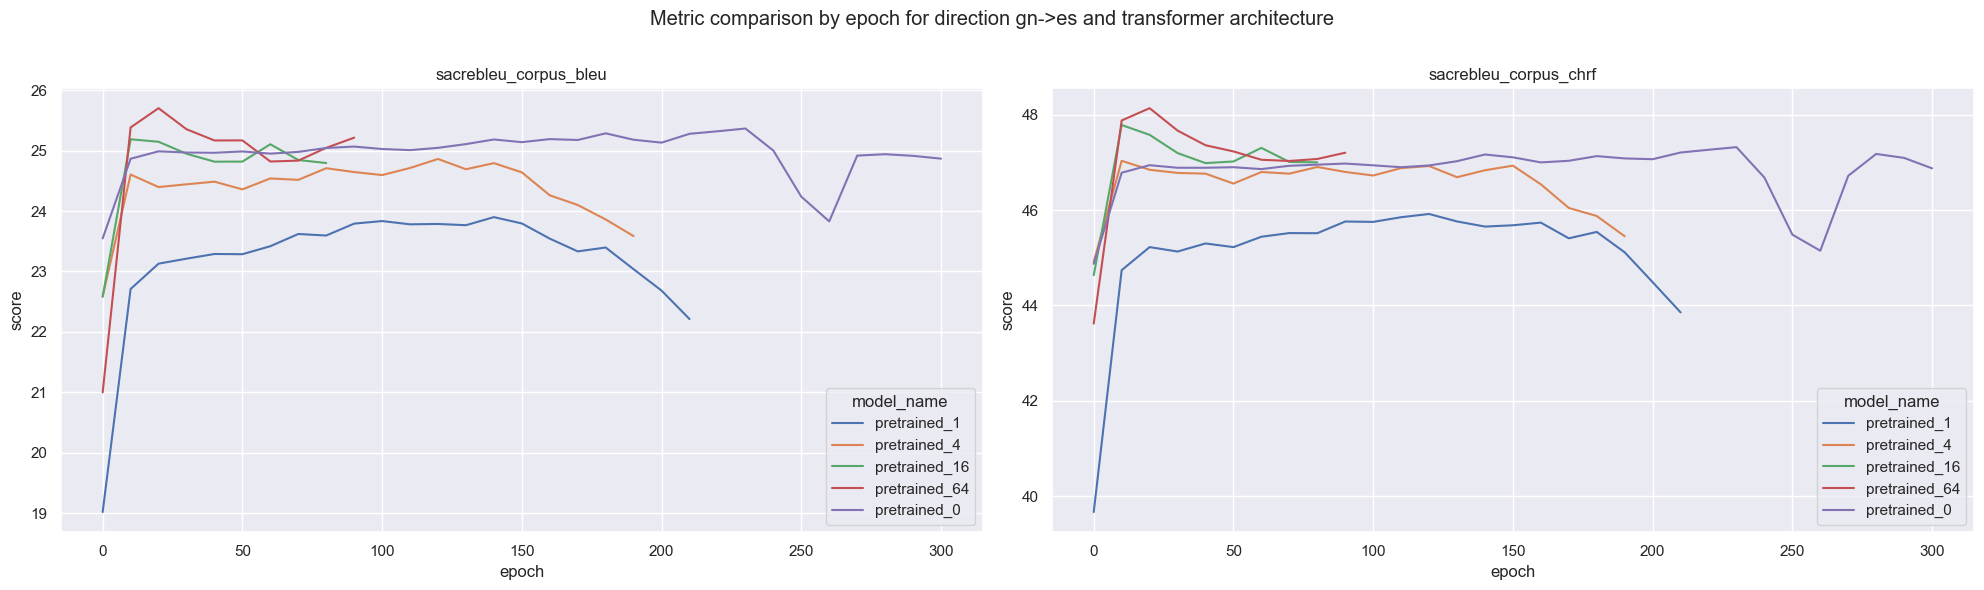

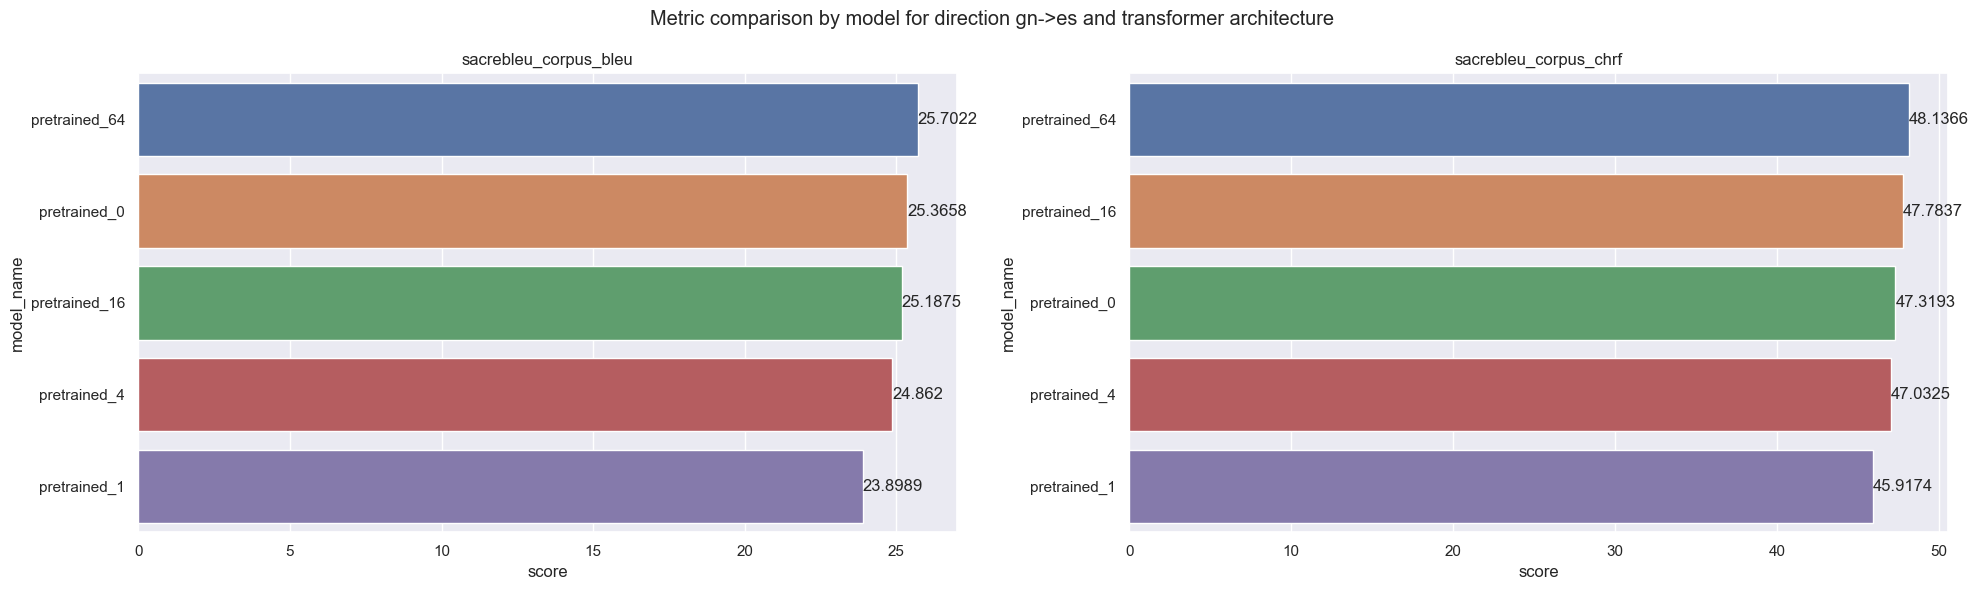

In [51]:
pretrained_ancora_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', pretrained_ancora_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(pretrained_ancora_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_ancora_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

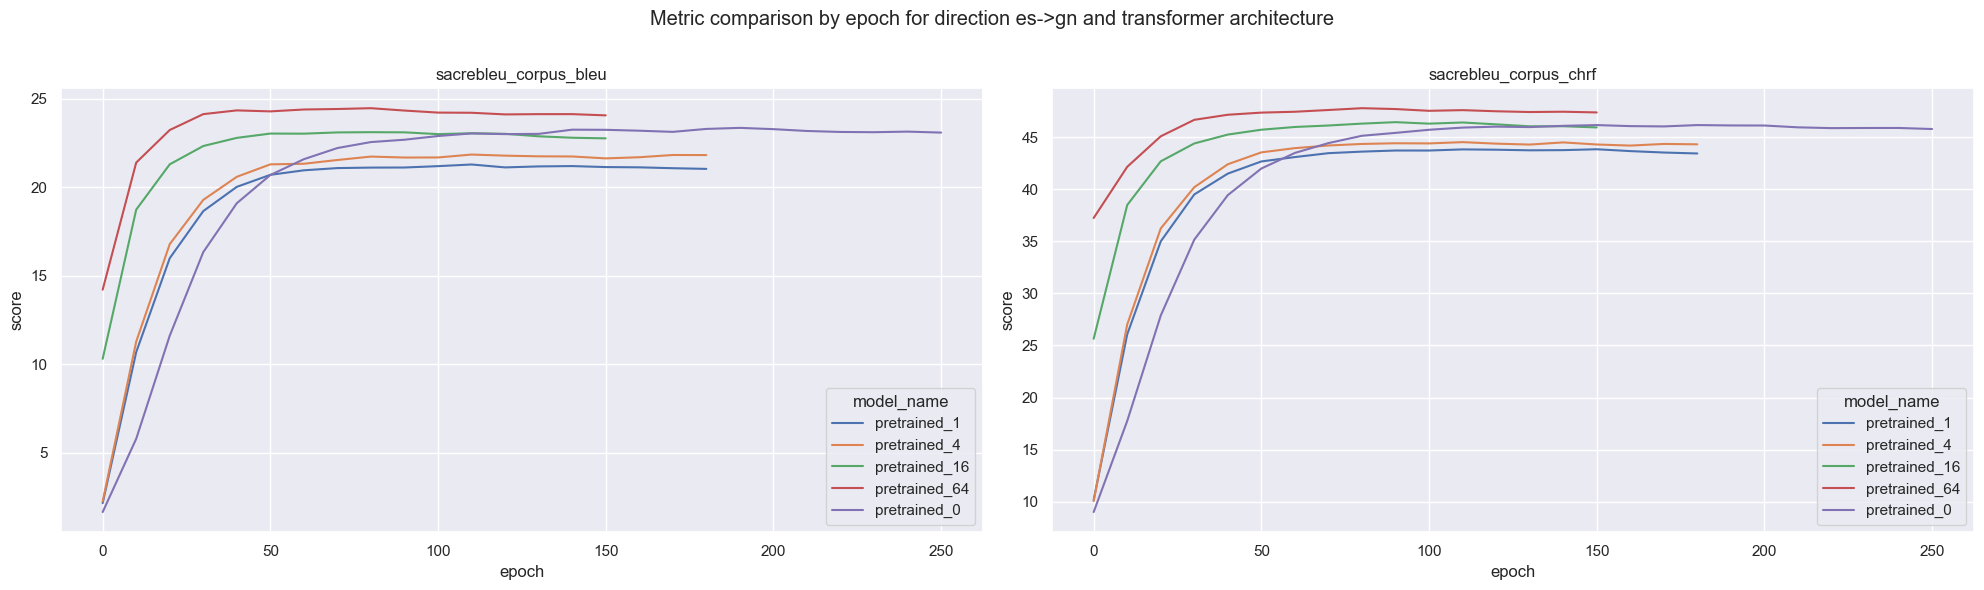

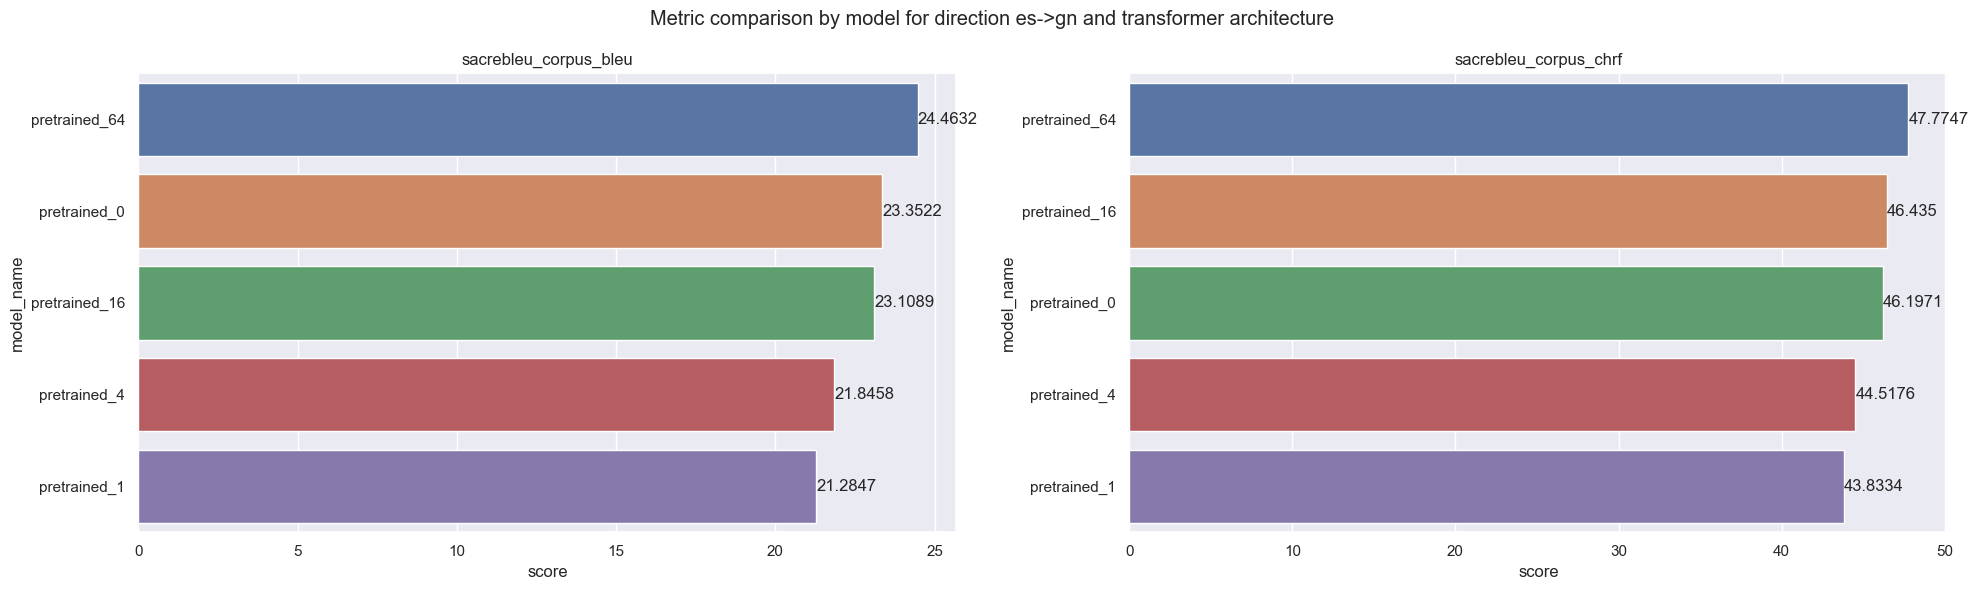

In [52]:
pretrained_ancora_s2s_es_gn_df['model_name'] = pretrained_ancora_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_ancora_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_ancora_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

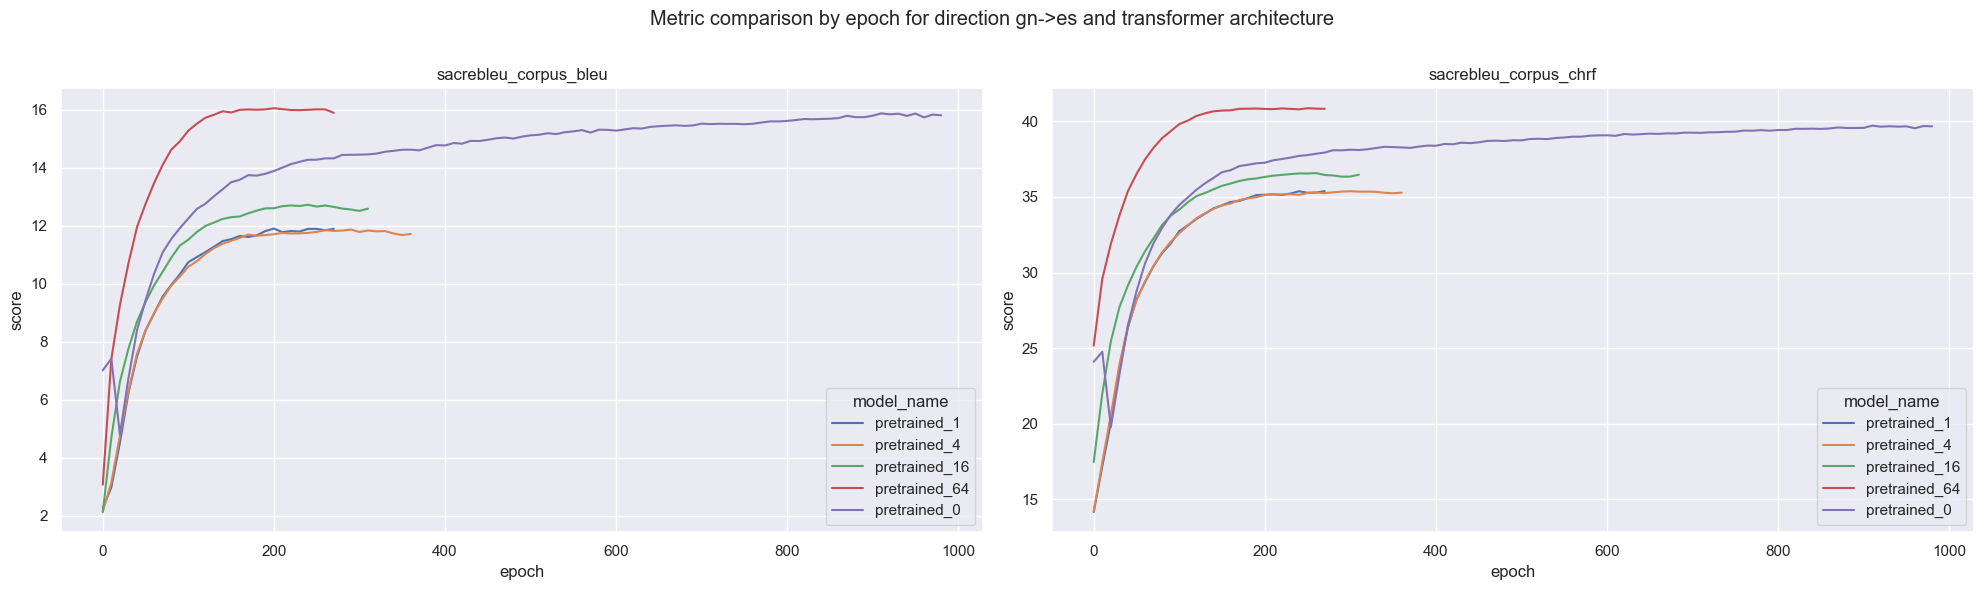

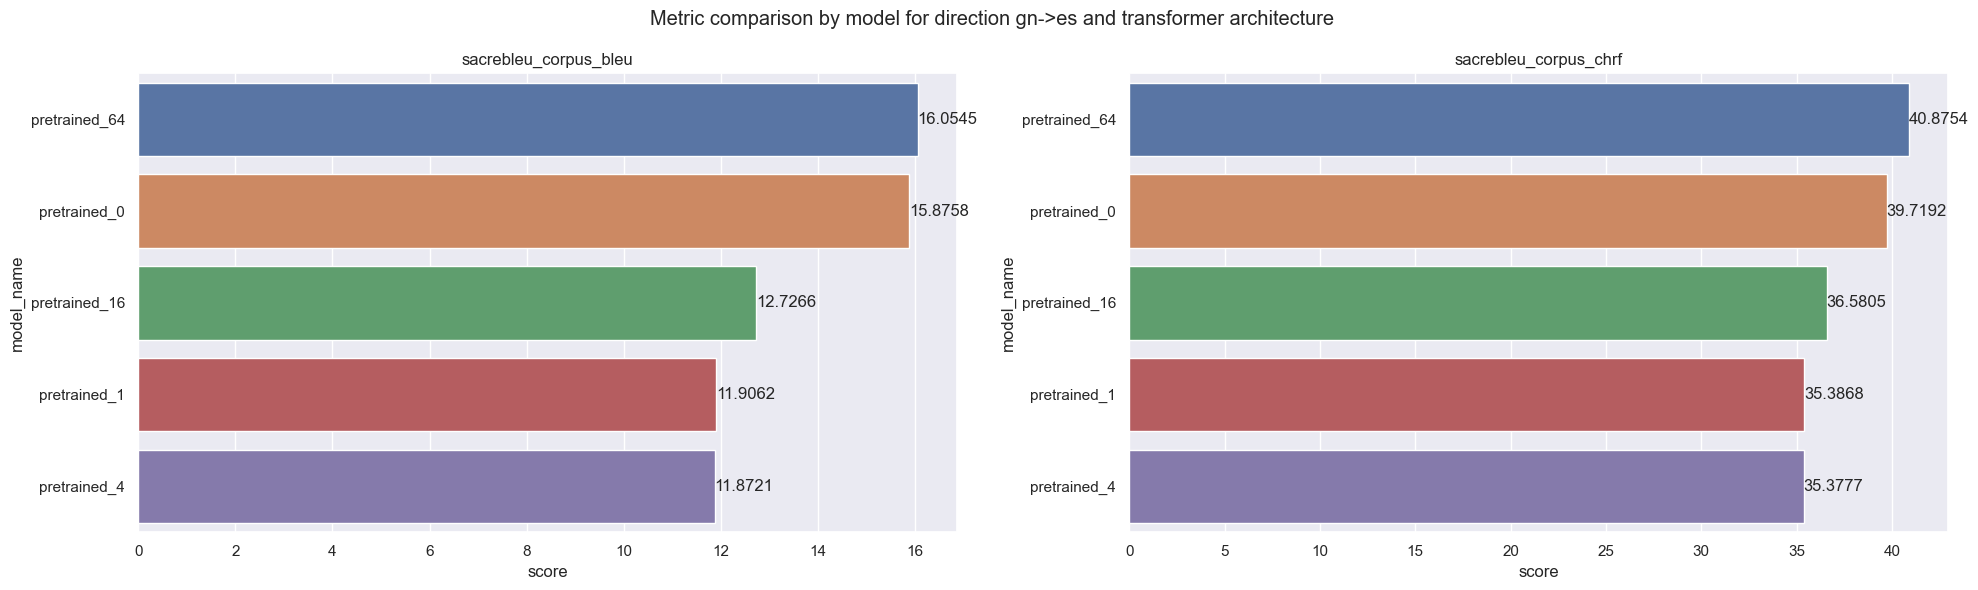

In [53]:
pretrained_ancora_transformer_gn_es_df['model_name'] = pretrained_ancora_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_ancora_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_ancora_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

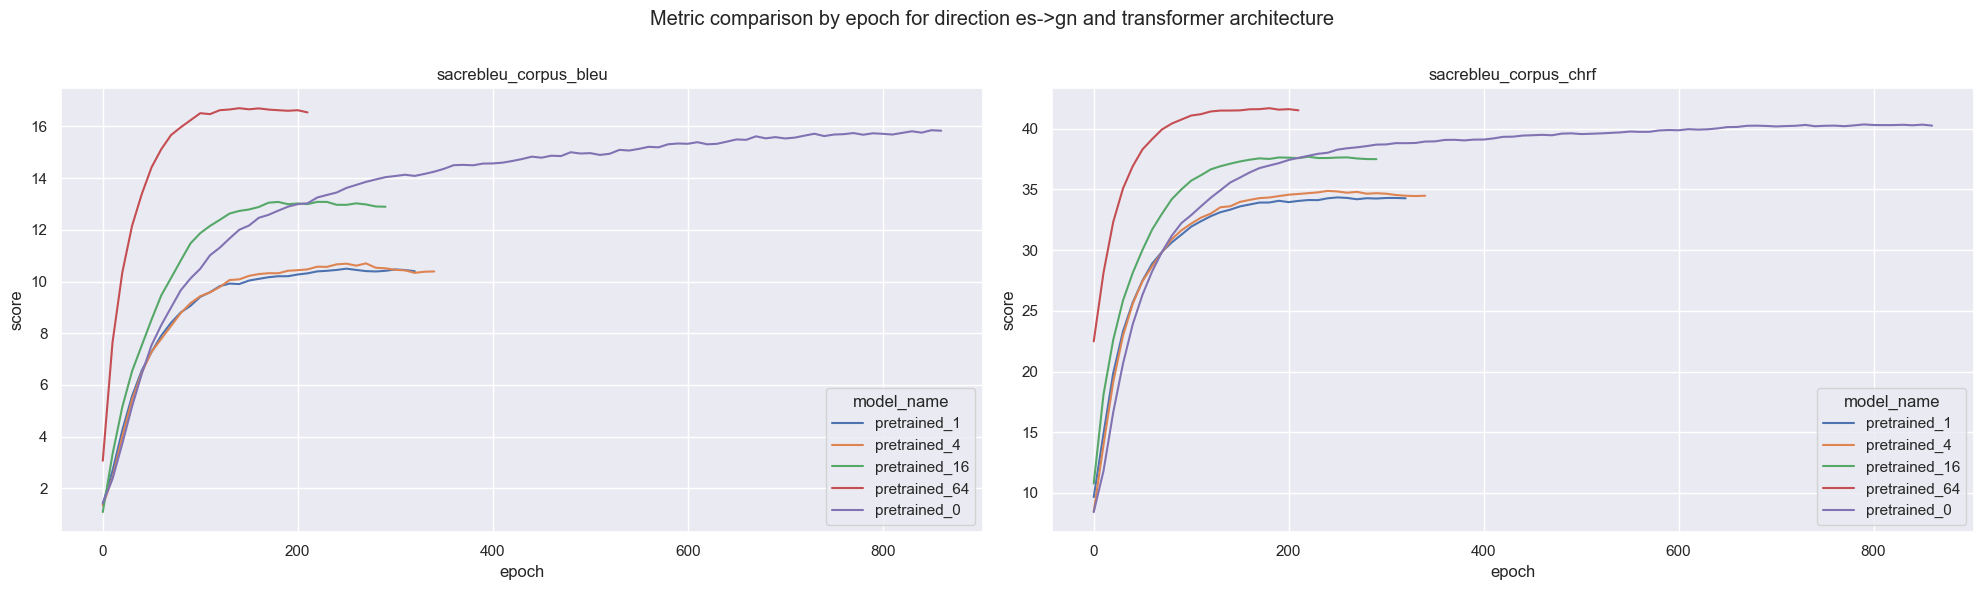

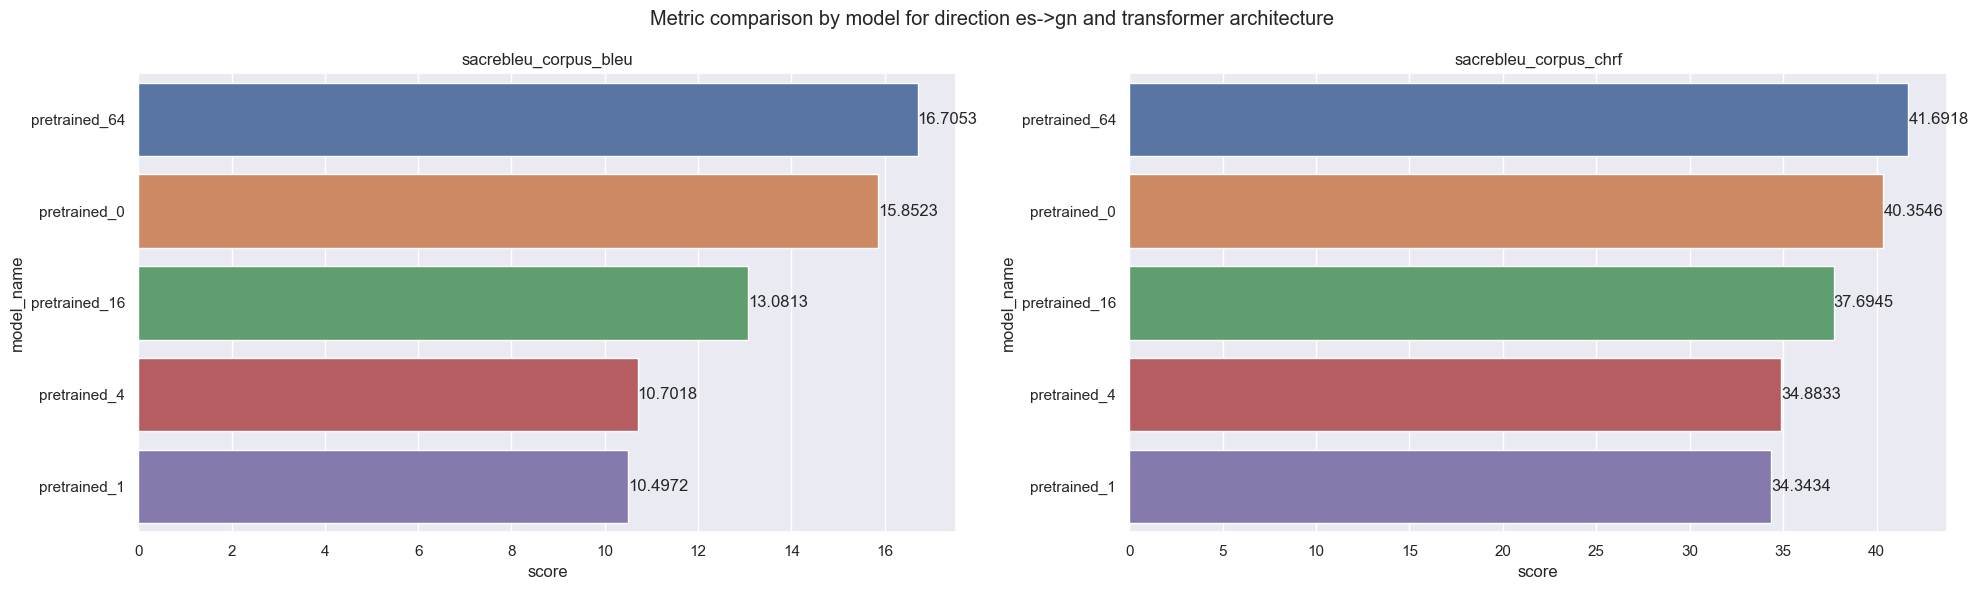

In [54]:
pretrained_ancora_transformer_es_gn_df['model_name'] = pretrained_ancora_transformer_es_gn_df['pretraining_epochs'].map(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_ancora_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_ancora_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

### **4. All**

#### **4.1. Default Pretraining**

In [57]:
DEFAULT_RESULTS_ALL_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'default_pretraining_all.csv')

In [58]:
results_df = pd.read_csv(DEFAULT_RESULTS_ALL_CSV)
results_without_pretraining = results_grammar_df[results_grammar_df['pretraining_epochs']=='0']
results_df = pd.concat([results_df, results_without_pretraining], axis=0)

results_df = shift_epochs_from_epoch(results_df, from_=0)

results_df['date'] = pd.to_datetime(results_df['date'])
results_df = extract_epochs_from_name(results_df)

In [59]:
default_all_s2s_gn_es_df = filter_df_by_model(results_df, 's2s', 'gn')
default_all_s2s_es_gn_df = filter_df_by_model(results_df, 's2s', 'es')
default_all_transformer_gn_es_df = filter_df_by_model(results_df, 'transformer', 'gn')
default_all_transformer_es_gn_df = filter_df_by_model(results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

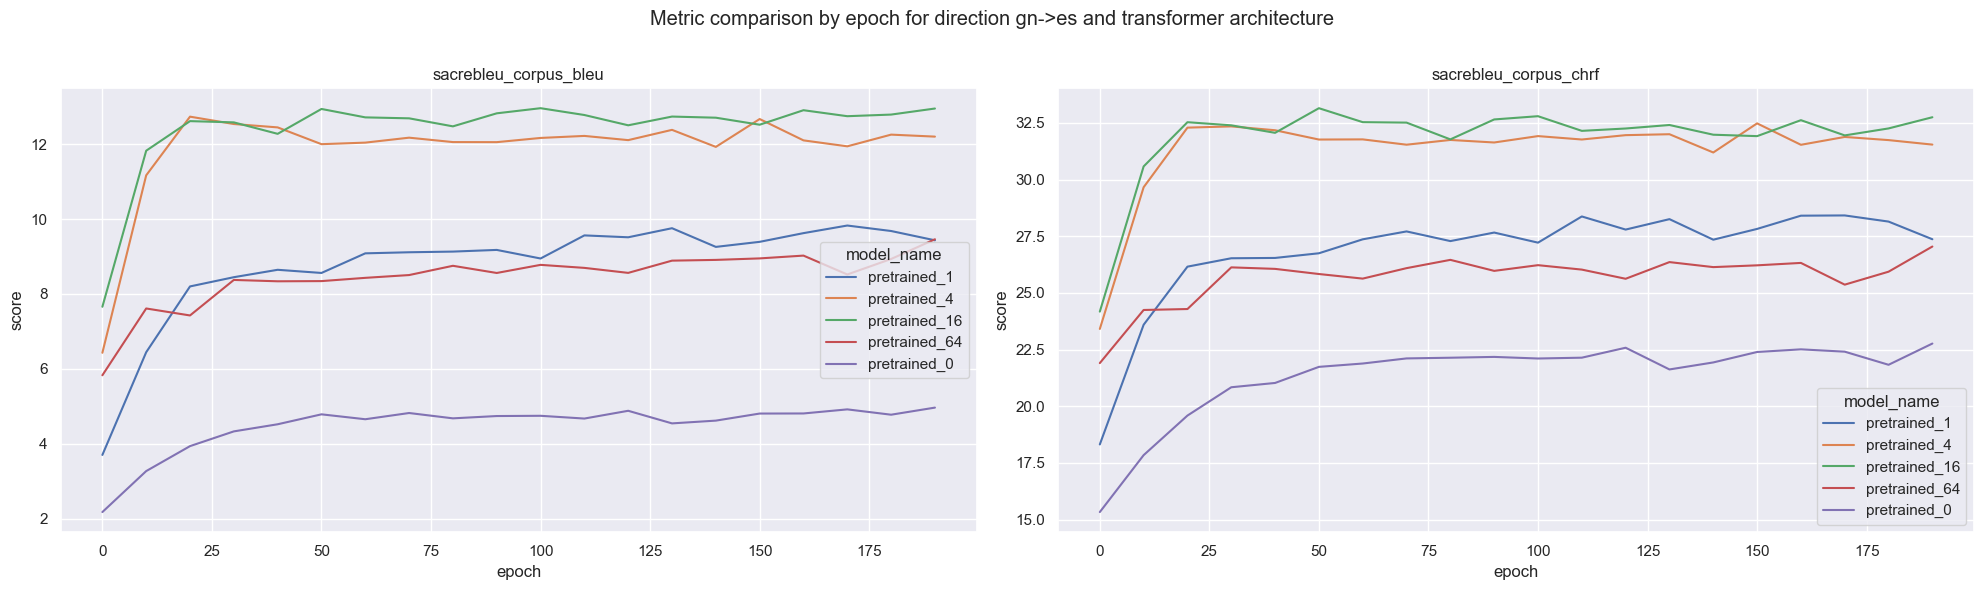

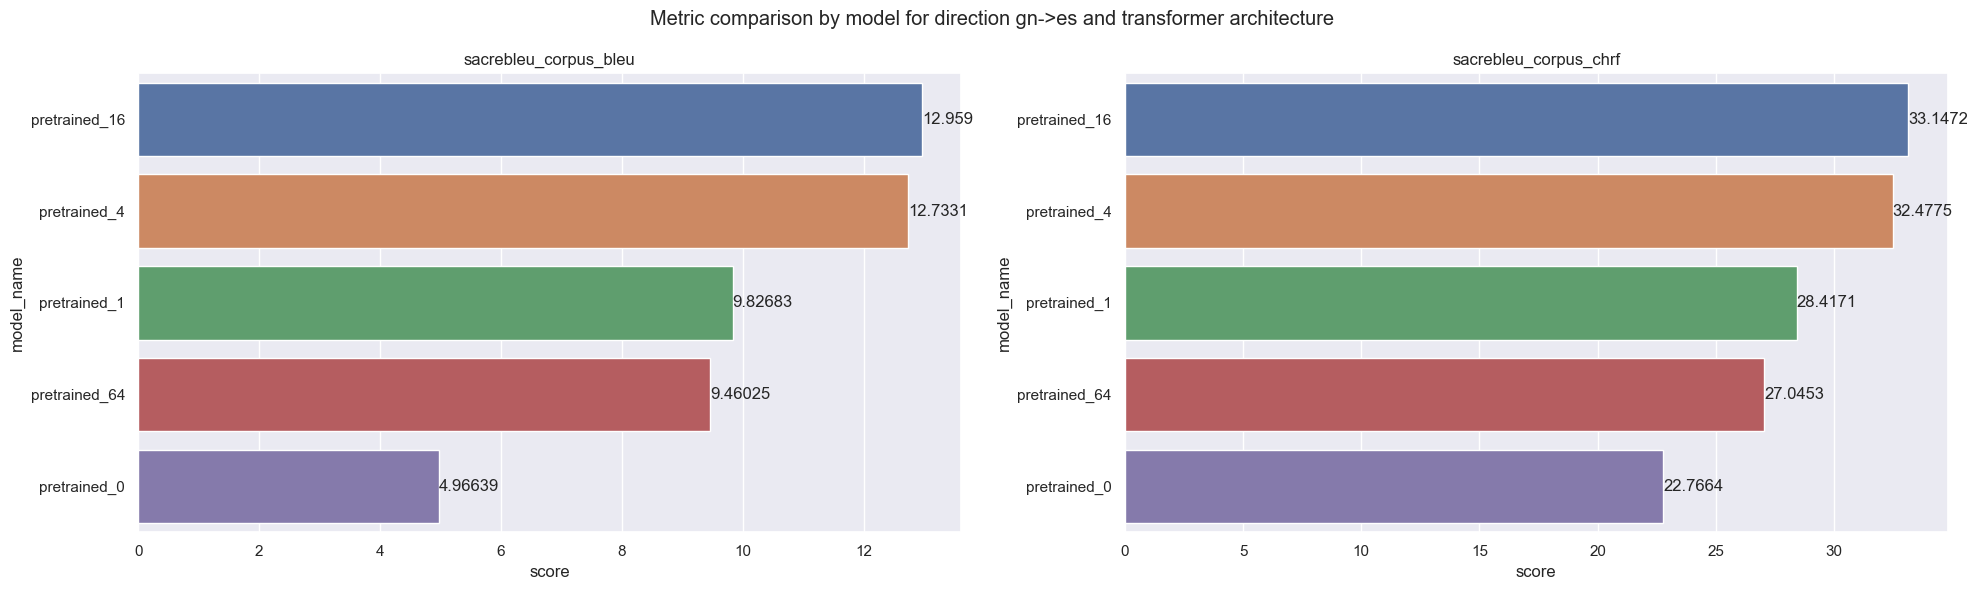

In [60]:
default_all_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', default_all_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(default_all_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_all_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

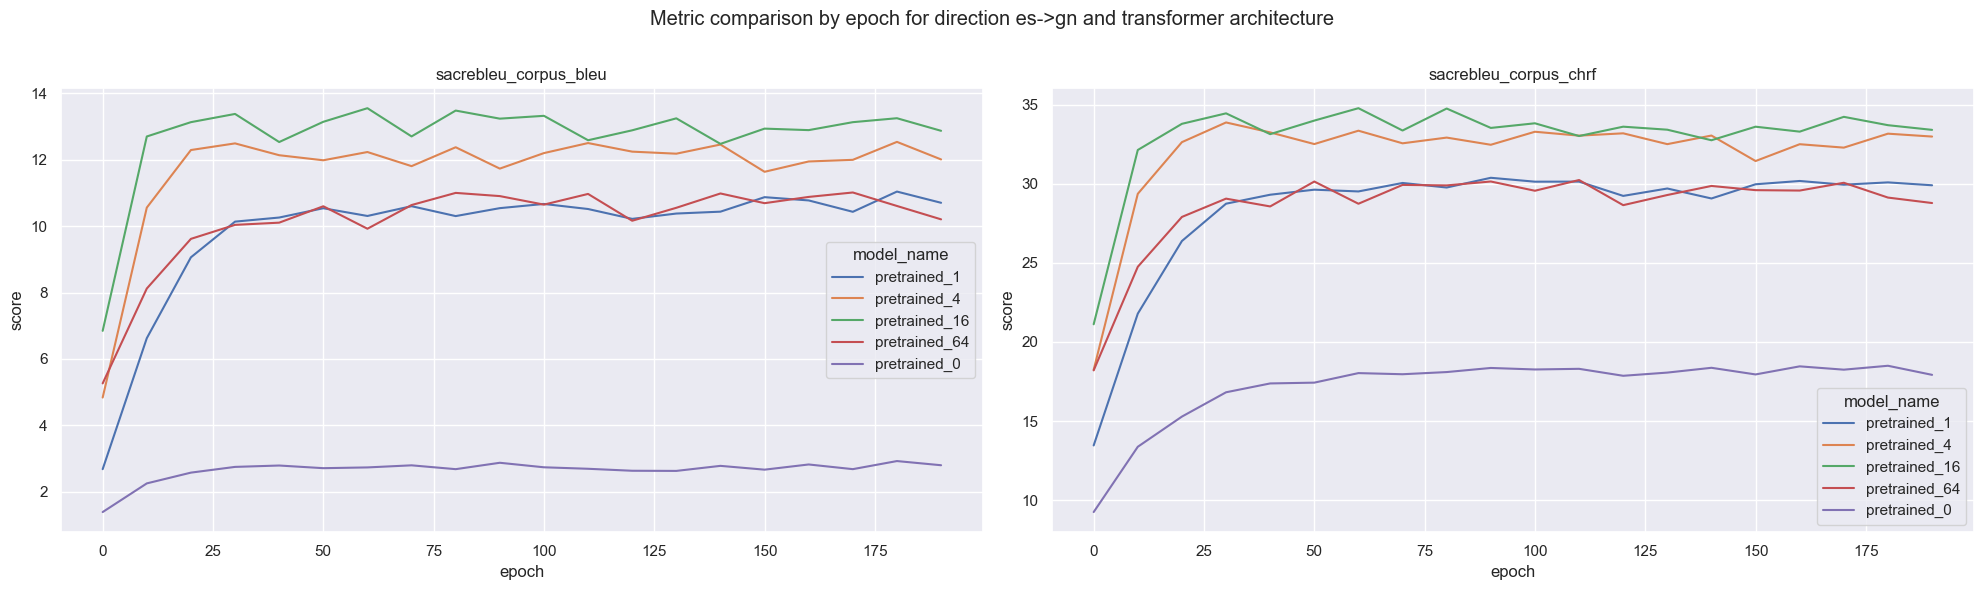

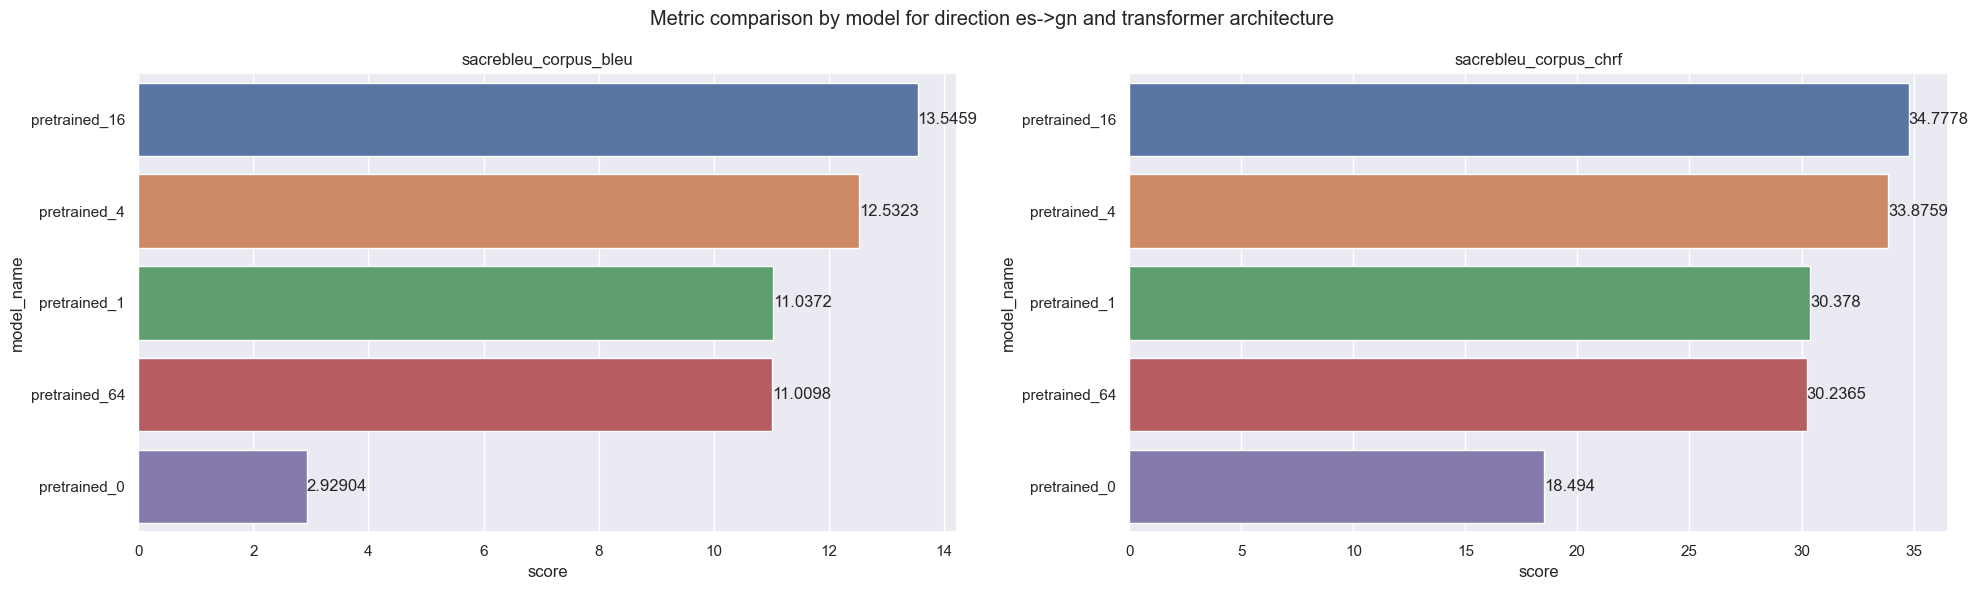

In [61]:
default_all_s2s_es_gn_df['model_name'] = default_all_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_all_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_all_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

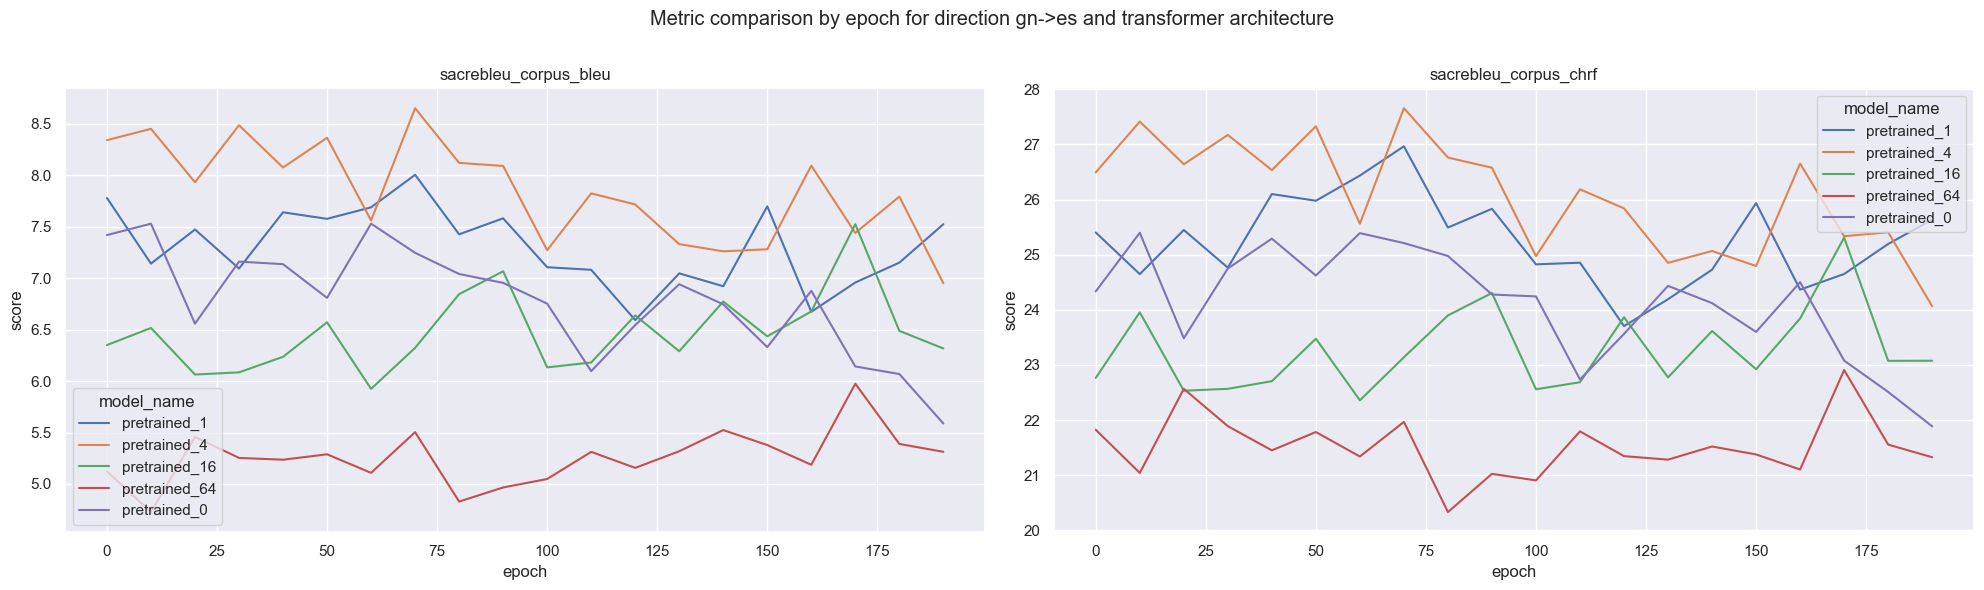

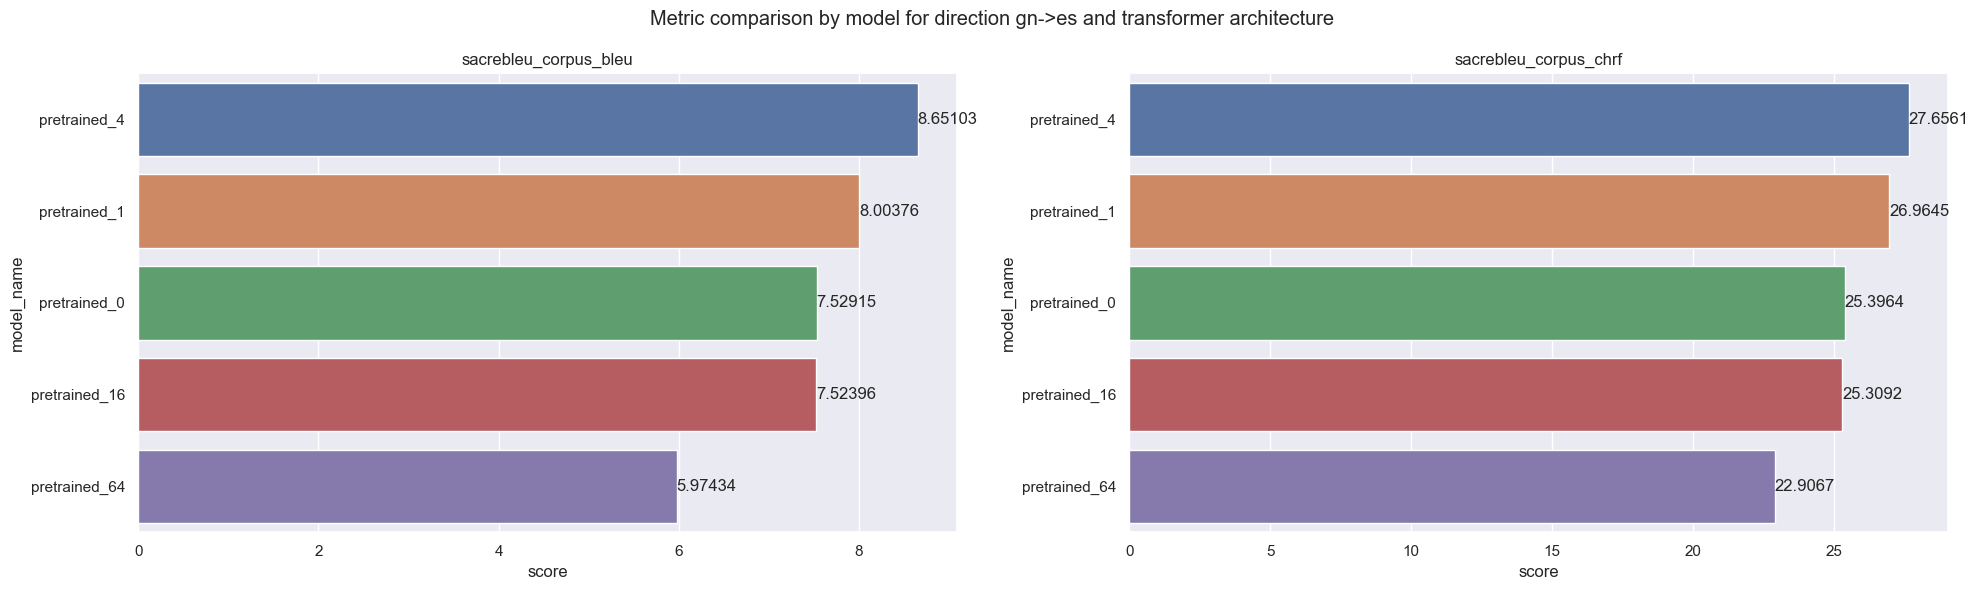

In [62]:
default_all_transformer_gn_es_df['model_name'] = default_all_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_all_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_all_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

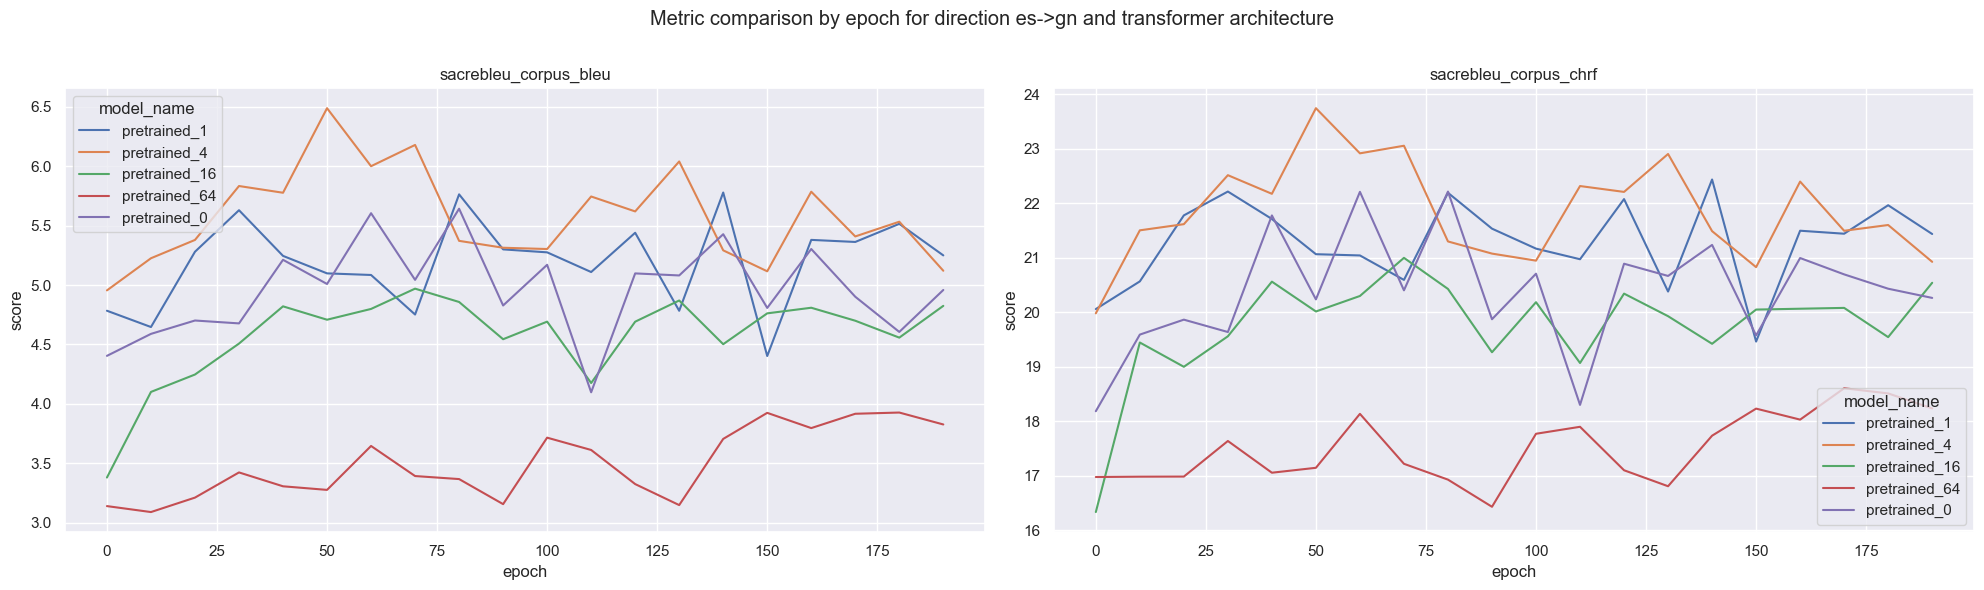

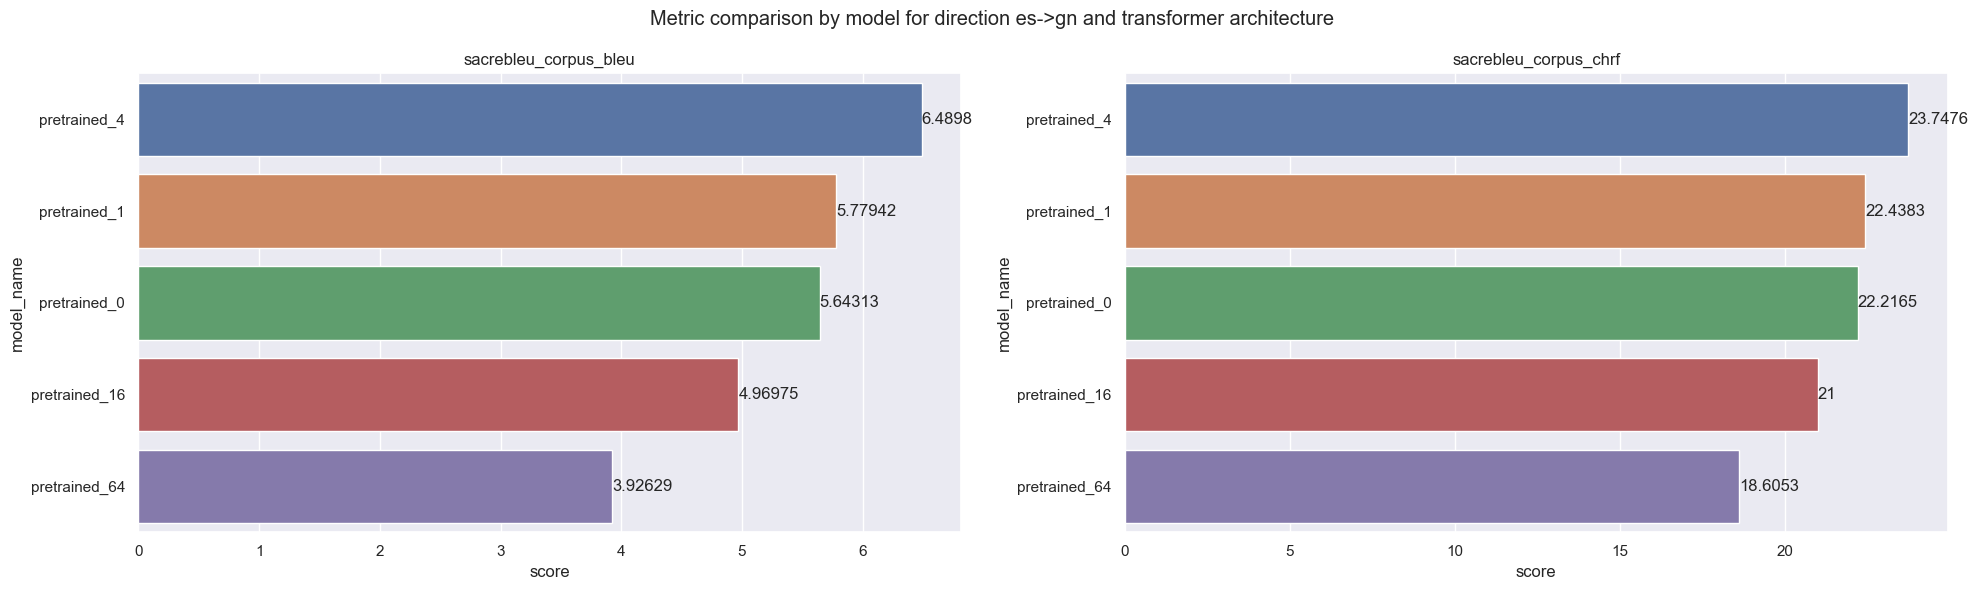

In [63]:
default_all_transformer_es_gn_df['model_name'] = default_all_transformer_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(default_all_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(default_all_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

#### **4.2. Finetuned Pretraining**

In [66]:
PRETRAINED_RESULTS_ANCORA_CSV = os.path.join(PRETRAINING_FOLDER, 'validation', 'finetuned_pretraining_all.csv')

In [67]:
pretrained_results_df = pd.read_csv(PRETRAINED_RESULTS_ANCORA_CSV)
finetuned_results_df = pd.read_csv(FINETUNED_RESULTS_CSV)
pretrained_results_df = pd.concat([pretrained_results_df, finetuned_results_df], axis=0)


pretrained_results_df = shift_epochs_from_epoch(pretrained_results_df, from_=0)
finetuned_results_df = shift_epochs_from_epoch(finetuned_results_df, from_=0)

pretrained_results_df['date'] = pd.to_datetime(pretrained_results_df['date'])
pretrained_results_df = extract_epochs_from_name(pretrained_results_df)

In [68]:
pretrained_all_s2s_gn_es_df = filter_df_by_model(pretrained_results_df, 's2s', 'gn')
pretrained_all_s2s_es_gn_df = filter_df_by_model(pretrained_results_df, 's2s', 'es')
pretrained_all_transformer_gn_es_df = filter_df_by_model(pretrained_results_df, 'transformer', 'gn')
pretrained_all_transformer_es_gn_df = filter_df_by_model(pretrained_results_df, 'transformer', 'es')

##### **S2S (GN -> ES)** 

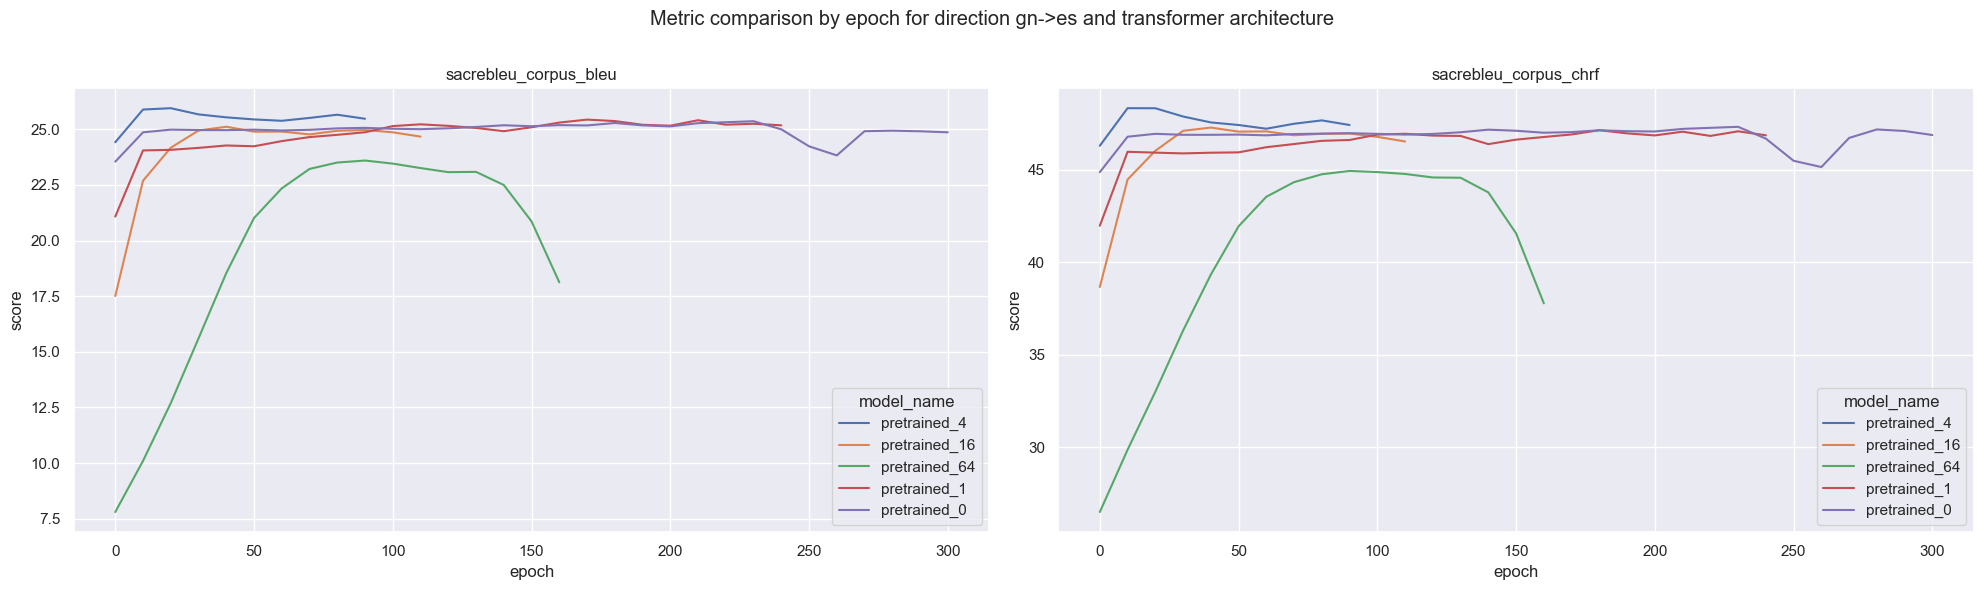

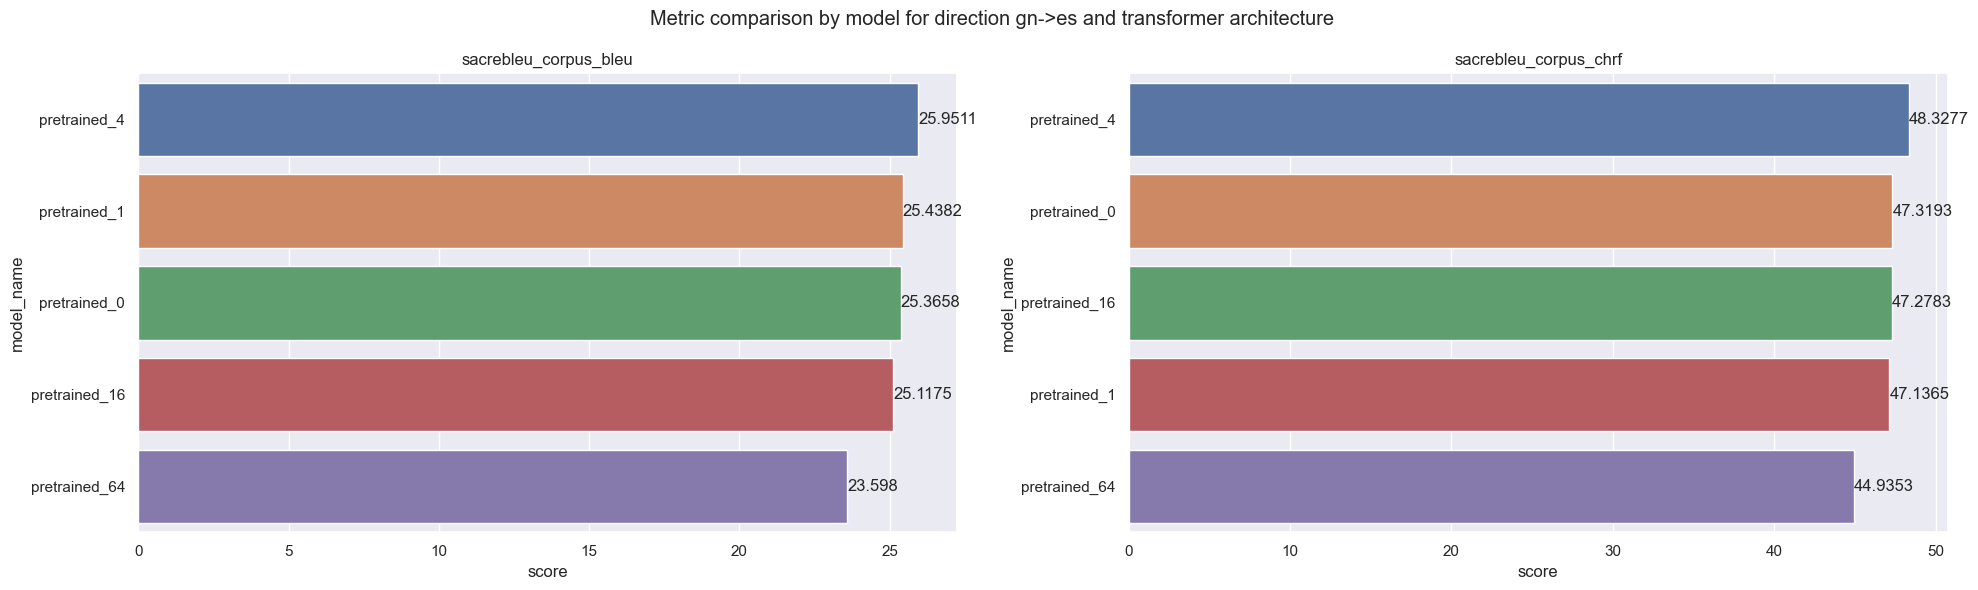

In [69]:
pretrained_all_s2s_gn_es_df['model_name'] = list(map(lambda x: f'pretrained_{x}', pretrained_all_s2s_gn_es_df['pretraining_epochs'].tolist()))
plots.plot_metric_by_epoch_foreach_model(pretrained_all_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_all_s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **S2S (ES -> GN)** 

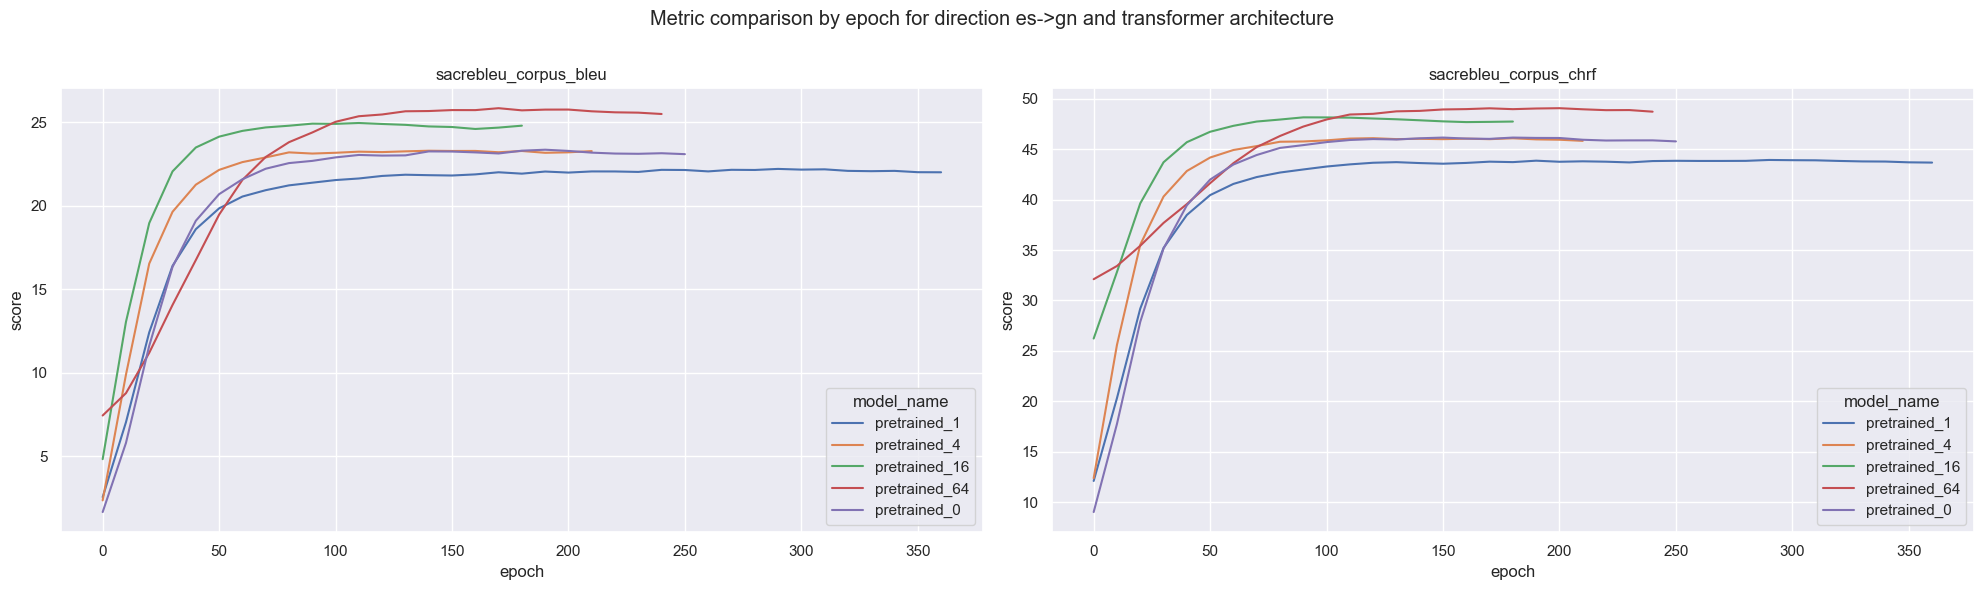

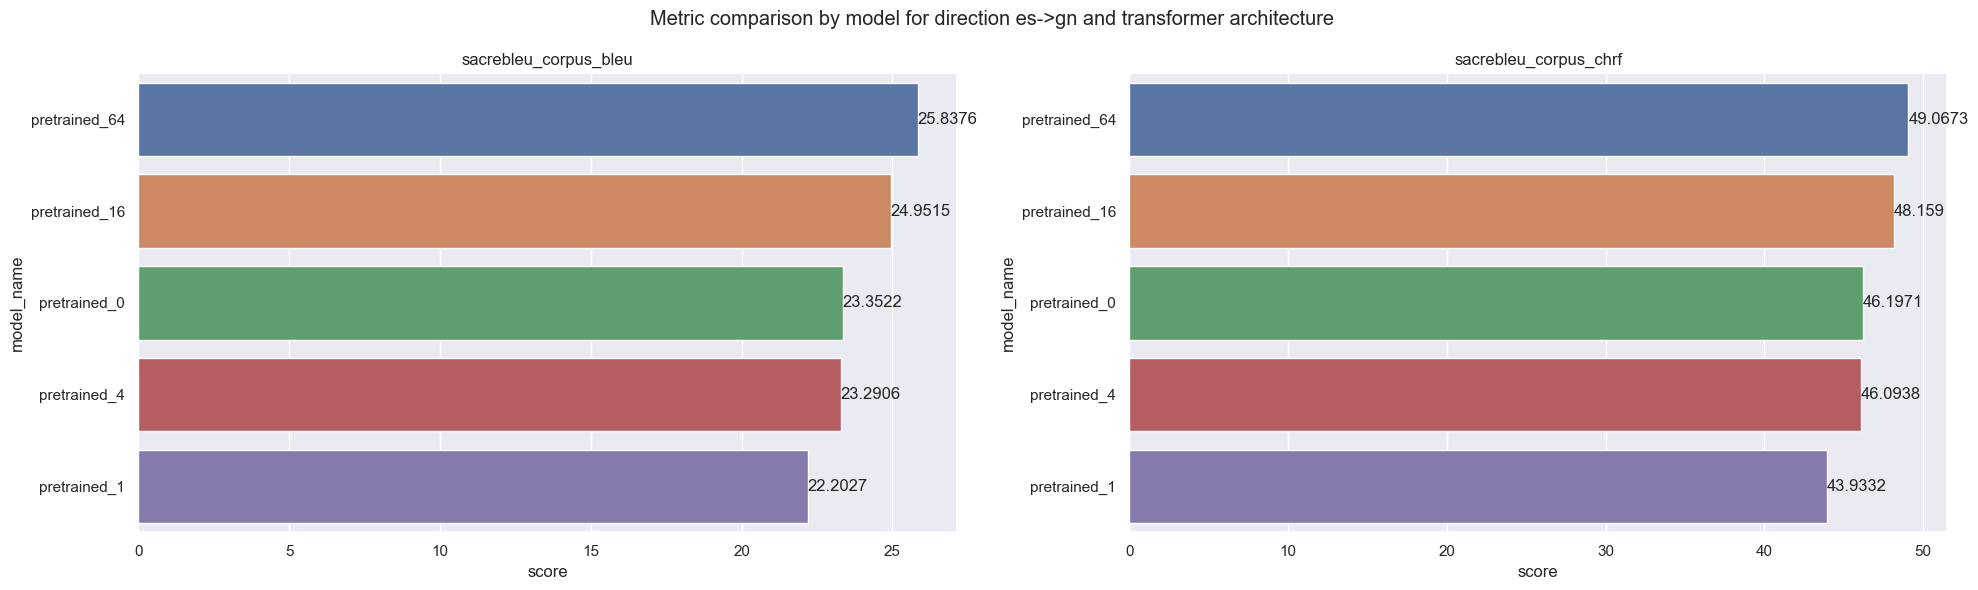

In [70]:
pretrained_all_s2s_es_gn_df['model_name'] = pretrained_all_s2s_es_gn_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_all_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_all_s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (GN -> ES)** 

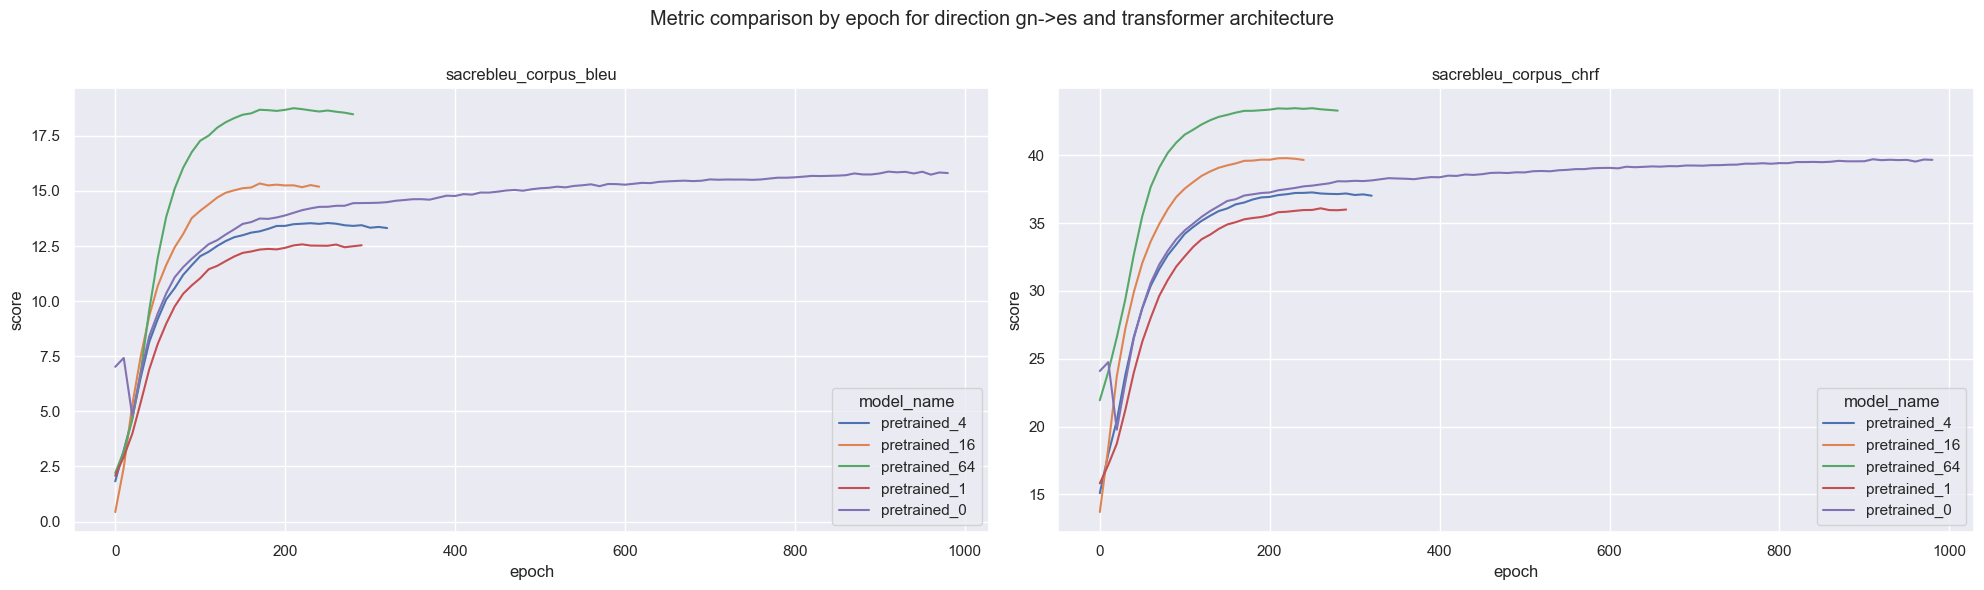

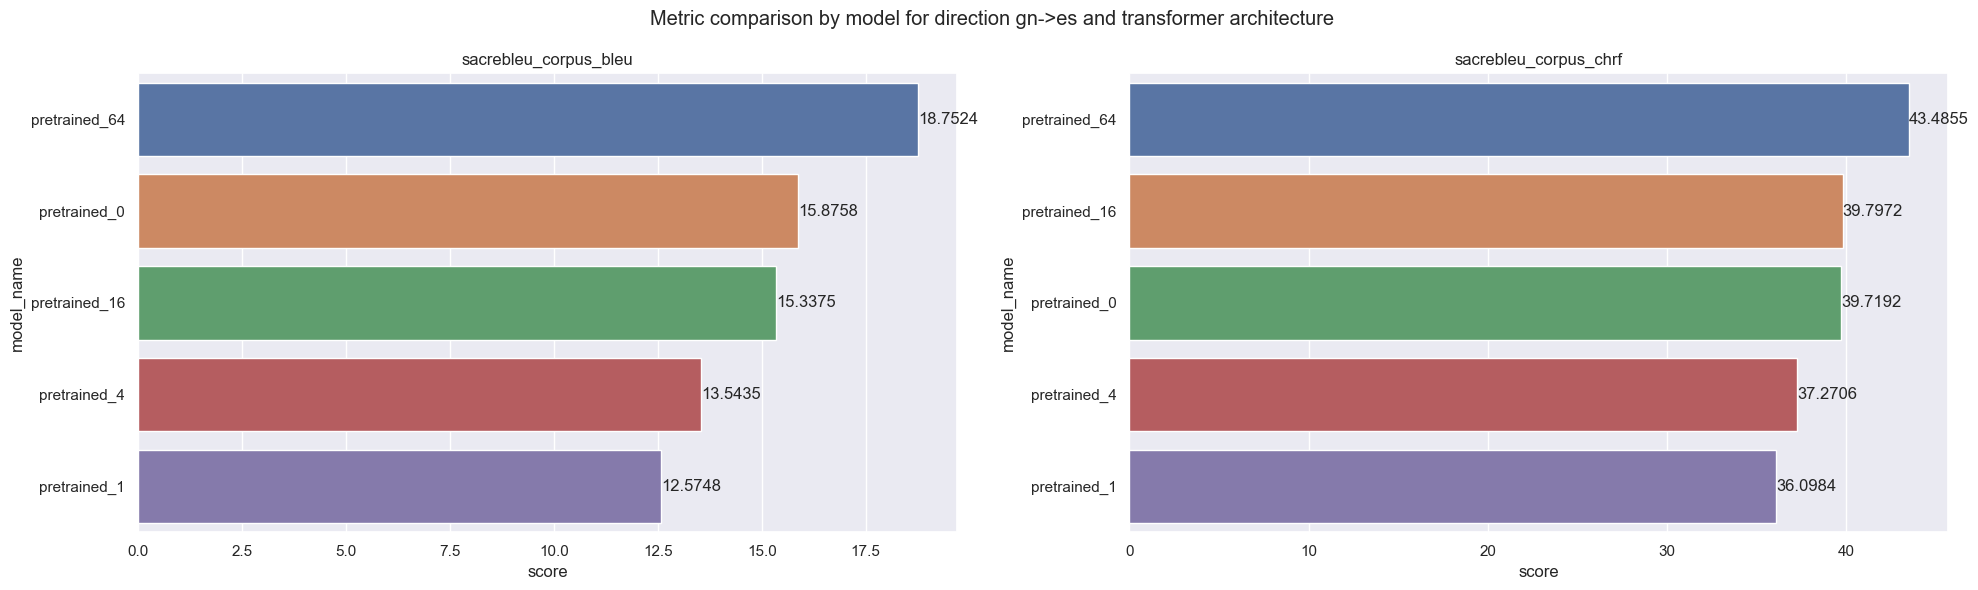

In [71]:
pretrained_all_transformer_gn_es_df['model_name'] = pretrained_all_transformer_gn_es_df['pretraining_epochs'].apply(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_all_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_all_transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

##### **TRANSFORMER (ES -> GN)** 

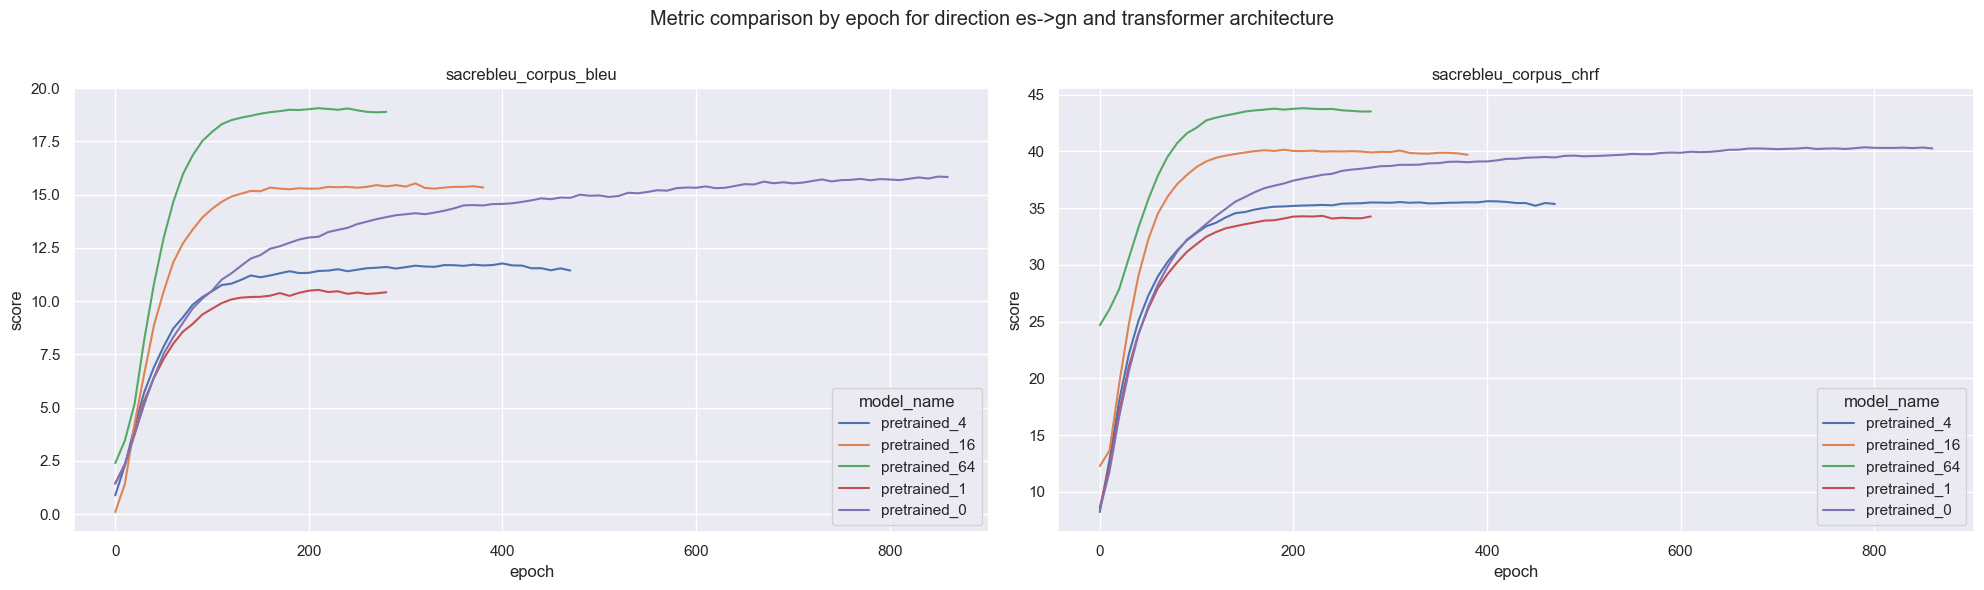

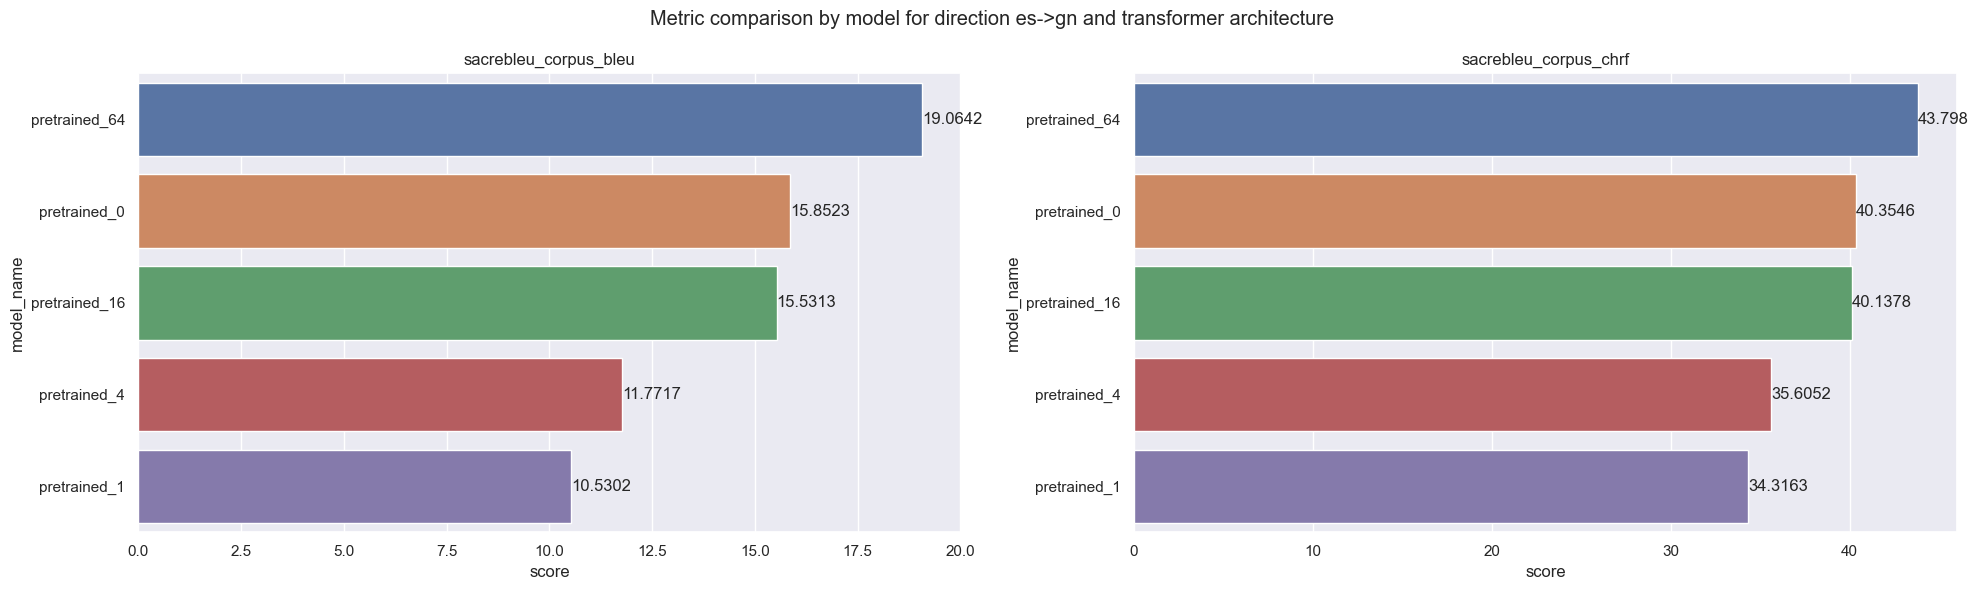

In [72]:
pretrained_all_transformer_es_gn_df['model_name'] = pretrained_all_transformer_es_gn_df['pretraining_epochs'].map(lambda x: f'pretrained_{x}')
plots.plot_metric_by_epoch_foreach_model(pretrained_all_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(pretrained_all_transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

## **Summary**

In [115]:
def get_best_models(df: pd.DataFrame, 
                    metric='sacrebleu_corpus_chrf', 
                    by='pretraining_epochs'):
    best_models = df[df['score_type'] == metric].groupby(by)['score'].idxmax()
    best_models_df = df.loc[best_models, ['epoch', by, 'score']]

    best_models_df['pretraining_epochs'] = best_models_df['pretraining_epochs'].astype('int')
    return best_models_df

def get_best_pretraining_epoch_from_best_models(df: pd.DataFrame):
    return df.loc[df['score'].max() == df['score']]

def get_best_pretraining_epoch(df: pd.DataFrame, metric='sacrebleu_corpus_chrf'):
    df = get_best_models(df, metric=metric)
    df = get_best_pretraining_epoch_from_best_models(df)
    return df

In [74]:
gn_es_default_s2s_dfs = [default_grammar_s2s_gn_es_df, 
                         default_ancora_s2s_gn_es_df, 
                         default_bible_s2s_gn_es_df, 
                         default_all_s2s_gn_es_df]

es_gn_default_s2s_dfs = [default_grammar_s2s_es_gn_df, 
                         default_ancora_s2s_es_gn_df, 
                         default_bible_s2s_es_gn_df, 
                         default_all_s2s_es_gn_df]

gn_es_default_transformer_dfs = [default_grammar_transformer_gn_es_df, 
                                 default_ancora_transformer_gn_es_df, 
                                 default_bible_transformer_gn_es_df, 
                                 default_all_transformer_gn_es_df]

es_gn_default_transformer_dfs = [default_grammar_transformer_es_gn_df, 
                                 default_ancora_transformer_es_gn_df, 
                                 default_bible_transformer_es_gn_df, 
                                 default_all_transformer_es_gn_df]

gn_es_pretrained_s2s_dfs = [pretrained_grammar_s2s_gn_es_df, 
                            pretrained_ancora_s2s_gn_es_df, 
                            pretrained_bible_s2s_gn_es_df, 
                            pretrained_all_s2s_gn_es_df]

es_gn_pretrained_s2s_dfs = [pretrained_grammar_s2s_es_gn_df, 
                            pretrained_ancora_s2s_es_gn_df, 
                            pretrained_bible_s2s_es_gn_df, 
                            pretrained_all_s2s_es_gn_df]

gn_es_pretrained_transformer_dfs = [pretrained_grammar_transformer_gn_es_df, 
                                    pretrained_ancora_transformer_gn_es_df, 
                                    pretrained_bible_transformer_gn_es_df, 
                                    pretrained_all_transformer_gn_es_df]
   
es_gn_pretrained_transformer_dfs = [pretrained_grammar_transformer_es_gn_df, 
                                    pretrained_ancora_transformer_es_gn_df, 
                                    pretrained_bible_transformer_es_gn_df, 
                                    pretrained_all_transformer_es_gn_df]

In [75]:
dfs = {"gn->es": {"Default": {"s2s": gn_es_default_s2s_dfs, 
                              "transformer": gn_es_default_transformer_dfs}, 
                  "Adjusted":  {"s2s": gn_es_pretrained_s2s_dfs, 
                                  "transformer": gn_es_pretrained_transformer_dfs}}, 
       "es->gn": {"Default":  {"s2s": es_gn_default_s2s_dfs, 
                               "transformer": es_gn_default_transformer_dfs}, 
                  "Adjusted":  {"s2s": es_gn_pretrained_s2s_dfs, 
                                  "transformer": es_gn_pretrained_transformer_dfs}}}

In [76]:
directions = ["gn->es", "es->gn"]
methods = ["Default", "Adjusted"]
architectures = ["s2s", "transformer"]
metrics = ["sacrebleu_corpus_bleu", "sacrebleu_corpus_chrf"]
corpora = ["SyntaxGrammar", "Ancora", "Bible", "All"]
pretraining_epochs = [0, 1, 4, 16, 64]

In [77]:
save_dir = os.path.join(constants.RESULTS_DATA_FOLDER, 'pretraining_tests')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [122]:
total_rows = len(corpora)
summary_df = collections.defaultdict(list)

for architecture in architectures:
    for method in methods:
        for idx, corpus in enumerate(corpora):
            for direction in directions:
                current_df = dfs[direction][method][architecture]
                current_corpus_df = current_df[idx]
                for metric in metrics:
                    current_df_metric = current_corpus_df[current_corpus_df['score_type']==metric]
                    best_pretrained_config = get_best_models(current_df_metric, metric=metric)
                    best_pretrained_config = best_pretrained_config.sort_values('pretraining_epochs')
                    for _, row in best_pretrained_config.iterrows():
                        current_epoch = row['pretraining_epochs']
                        current_score = row['score']
                        summary_df[(method, architecture, corpus, current_epoch)].append(current_score)

summary_df = pd.DataFrame(summary_df, 
                          index=[sum([([direction]*len(metrics)) for direction in directions], []),
                                 metrics*len(directions)])
summary_df = summary_df.T.copy()
summary_df.to_csv(os.path.join(save_dir, 'pretraining_validation_results.csv'))
summary_df

gn->es  \
                                        sacrebleu_corpus_bleu   
Default  s2s         SyntaxGrammar 0.0               4.966388   
                                   1.0              12.608382   
                                   4.0              10.939302   
                                   16.0              9.892027   
                                   64.0              7.247205   
...                                                       ...   
Adjusted transformer All           0.0              15.875761   
                                   1.0              12.574777   
                                   4.0              13.543469   
                                   16.0             15.337452   
                                   64.0             18.752436   

                                                               \
                                        sacrebleu_corpus_chrf   
Default  s2s         SyntaxGrammar 0.0              22.766371   
                                   1.0              32.765829   
                                   4.0              30.264009   
                                   16.0             28.157969   
                                   64.0             24.657957   
...                                                       ...   
Adjusted transformer All           0.0              39.719175   
                                   1.0              36.098429   
                                   4.0              37.270640   
                                   16.0             39.797170   
                                   64.0             43.485495   

                                                       es->gn  \
                                        sacrebleu_corpus_bleu   
Default  s2s         SyntaxGrammar 0.0               2.929039   
                                   1.0              10.270767   
                                   4.0              11.231541   
                                   16.0              9.245712   
                                   64.0              4.938394   
...                                                       ...   
Adjusted transformer All           0.0              15.852319   
                                   1.0              10.530154   
                                   4.0              11.771687   
                                   16.0             15.531250   
                                   64.0             19.064215   

                                                               
                                        sacrebleu_corpus_chrf  
Default  s2s         SyntaxGrammar 0.0              18.494050  
                                   1.0              29.447141  
                                   4.0              31.615545  
                                   16.0             28.082288  
                                   64.0             20.790189  
...                                                       ...  
Adjusted transformer All           0.0              40.354648  
                                   1.0              34.316341  
                                   4.0              35.605219  
                                   16.0             40.137832  
                                   64.0             43.798047  

[80 rows x 4 columns]

In [79]:
def get_models_summary_df(dfs: dict, 
                          directions: list,
                          methods: list, 
                          architectures: list, 
                          metrics: list, 
                          corpora: list,
                          df_condition=None):
    summary_df = collections.defaultdict(list)

    for direction in directions:
        for method in methods:
            for architecture in architectures:
                current_df = dfs[direction][method][architecture]

                for metric in metrics:
                    for idx, _ in enumerate(corpora):
                        current_corpus_df = current_df[idx]
                        current_df_metric = current_corpus_df[current_corpus_df['score_type']==metric]

                        if df_condition is not None:
                            current_df_metric = current_df_metric[df_condition(current_df_metric)]

                        best_pretrained_config = get_best_pretraining_epoch(current_df_metric, 
                                                                            metric=metric)

                        for idx, row in best_pretrained_config.iterrows():
                            current_pretraining_epochs = row['pretraining_epochs']
                            current_score = row['score']
                            current_epoch = row['epoch']
                            summary_df[(direction, method, architecture, metric, 'pretraining_epochs')].append(current_pretraining_epochs)
                            summary_df[(direction, method, architecture, metric, 'epochs')].append(current_epoch)
                            summary_df[(direction, method, architecture, metric, 'score')].append(current_score)

    summary_df = pd.DataFrame(summary_df, index=corpora)
    return summary_df

**Best of all**

In [80]:
best_summary_df = get_models_summary_df(dfs, 
                                        directions, 
                                        methods, 
                                        architectures, 
                                        metrics, 
                                        corpora)

best_summary_df = pd.DataFrame(best_summary_df, index=corpora)
best_summary_df.T.to_csv(os.path.join(save_dir, 'pretraining_validation_best_results.csv'))
best_summary_df.T

SyntaxGrammar  \
gn->es Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       160   
                                                  score                  12.608382   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                        60   
                                                  score                  32.765829   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                        60   
                                                  score                   7.529149   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                        30   
                                                  score                   25.94572   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       140   
                                                  score                  25.660232   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                       150   
                                                  score                  47.384379   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       910   
                                                  score                  15.875761   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       910   
                                                  score                  39.719175   
es->gn Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             4   
                                                  epochs                       190   
                                                  score                  11.231541   
                            sacrebleu_corpus_chrf pretraining_epochs             4   
                                                  epochs                       190   
                                                  score                  31.615545   
                transformer sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       170   
                                                  score                   5.713688   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                       160   
                                                  score                  22.396239   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       190   
                                                  score                  23.352184   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       180   
                                                  score                  46.197128   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       850   
                                                  score                  15.852319   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                           

**Best of all | pretraining_epochs != 0**

In [81]:
filtered_condition = lambda df: (df['pretraining_epochs']!='0')
best_summary_without_0_df = get_models_summary_df(dfs,
                                        directions,
                                        methods,
                                        architectures,
                                        metrics,
                                        corpora,
                                        df_condition=filtered_condition)

best_summary_without_0_df = pd.DataFrame(best_summary_without_0_df, index=corpora)
best_summary_without_0_df.T.to_csv(os.path.join(save_dir, 'pretraining_validation_best_results_without_0.csv'))
best_summary_without_0_df.T

SyntaxGrammar  \
gn->es Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       160   
                                                  score                  12.608382   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                        60   
                                                  score                  32.765829   
                transformer sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                        30   
                                                  score                   7.404331   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                        30   
                                                  score                   25.94572   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       140   
                                                  score                  25.660232   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                       150   
                                                  score                  47.384379   
                transformer sacrebleu_corpus_bleu pretraining_epochs            64   
                                                  epochs                       430   
                                                  score                  14.400488   
                            sacrebleu_corpus_chrf pretraining_epochs            16   
                                                  epochs                       330   
                                                  score                  38.465865   
es->gn Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             4   
                                                  epochs                       190   
                                                  score                  11.231541   
                            sacrebleu_corpus_chrf pretraining_epochs             4   
                                                  epochs                       190   
                                                  score                  31.615545   
                transformer sacrebleu_corpus_bleu pretraining_epochs             1   
                                                  epochs                       170   
                                                  score                   5.713688   
                            sacrebleu_corpus_chrf pretraining_epochs             1   
                                                  epochs                       160   
                                                  score                  22.396239   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs            16   
                                                  epochs                       240   
                                                  score                  23.338507   
                            sacrebleu_corpus_chrf pretraining_epochs             4   
                                                  epochs                       130   
                                                  score                  45.791216   
                transformer sacrebleu_corpus_bleu pretraining_epochs            64   
                                                  epochs                       390   
                                                  score                  14.517558   
                            sacrebleu_corpus_chrf pretraining_epochs            64   
                           

**best of all epochs with only 0**

In [82]:
filtered_condition = lambda df: (df['pretraining_epochs']=='0')
best_summary_only_0_df = get_models_summary_df(dfs,
                                               directions,
                                               methods,
                                               architectures,
                                               metrics,
                                               corpora,
                                               df_condition=filtered_condition)

best_summary_only_0_df = pd.DataFrame(best_summary_only_0_df, index=corpora)
best_summary_only_0_df.T.to_csv(os.path.join(save_dir,
                                             'pretraining_validation_results_only_0.csv'))
best_summary_only_0_df.T

SyntaxGrammar  \
gn->es Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       190   
                                                  score                   4.966388   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       190   
                                                  score                  22.766371   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                        60   
                                                  score                   7.529149   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                        10   
                                                  score                  25.396383   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       230   
                                                  score                  25.365785   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       230   
                                                  score                  47.319293   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       910   
                                                  score                  15.875761   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       910   
                                                  score                  39.719175   
es->gn Default  s2s         sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       180   
                                                  score                   2.929039   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       180   
                                                  score                   18.49405   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                        80   
                                                  score                   5.643129   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                        80   
                                                  score                  22.216521   
       Adjusted s2s         sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       190   
                                                  score                  23.352184   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                                                  epochs                       180   
                                                  score                  46.197128   
                transformer sacrebleu_corpus_bleu pretraining_epochs             0   
                                                  epochs                       850   
                                                  score                  15.852319   
                            sacrebleu_corpus_chrf pretraining_epochs             0   
                           

# **Automatic script generation**

**Without pretraining**

In [83]:
i = 0
run_data = []
epoch_shift = 10

for df in [best_summary_only_0_df]:
    for idx, row in df.T.iterrows():
        direction, mode, architecture, metric, col = row.name
        src, trg = direction.split('->')
        
        if metric != 'sacrebleu_corpus_chrf':
            continue

        i = (i+1) % 3
        run_data.append(row)

        if i != 0:
            continue

        pretraining_epochs_row, epochs_row, _ = run_data
        run_data = []

        for idy, corpus in enumerate(corpora):
            if idy > 0: # Every corpus is the same without pretraining
                break

            pretraining_epochs_i = pretraining_epochs_row[idy]
            epochs_i = epochs_row[idy] + epoch_shift #TODO: VER
            from_flag = pretraining_epochs.index(int(pretraining_epochs_i))

            scritp_file = f'{"train_default_test_set.sh" if mode=="Default" else "train_adjusted_test_set.sh"}'
            script_folder = f'{"finetuning" if mode=="Default" else "finetuning"}'

            print(mode)
            print(f'python cluster_runner.py',
                f'--from_flag {from_flag} --to_flag {from_flag+1}',
                f'--total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1',
                f'--bash_template_file ../scripts/{scritp_file}',
                f'--outputs_scripts_folder ../scripts/{script_folder}/{architecture}/{src}_{trg}/',
                f'--epochs {epochs_i}',
                f'--src {src} --trg {trg}',
                f'--model_type {architecture}')
            print()

Default
python cluster_runner.py --from_flag 0 --to_flag 1 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_default_test_set.sh --outputs_scripts_folder ../scripts/finetuning/s2s/gn_es/ --epochs 200 --src gn --trg es --model_type s2s

Default
python cluster_runner.py --from_flag 0 --to_flag 1 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_default_test_set.sh --outputs_scripts_folder ../scripts/finetuning/transformer/gn_es/ --epochs 20 --src gn --trg es --model_type transformer

Adjusted
python cluster_runner.py --from_flag 0 --to_flag 1 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_adjusted_test_set.sh --outputs_scripts_folder ../scripts/finetuning/s2s/gn_es/ --epochs 240 --src gn --trg es --model_type s2s

Adjusted
python cluster_runner.py --from_flag 0 --to_flag 1

**With pretraining**

In [84]:
i = 0
run_data = []
epoch_shift = 10

for df in [best_summary_without_0_df]:
    for idx, row in df.T.iterrows():
        direction, mode, architecture, metric, col = row.name
        src, trg = direction.split('->')
        
        if metric != 'sacrebleu_corpus_chrf':
            continue

        i = (i+1)%3
        run_data.append(row)

        if i != 0:
            continue

        pretraining_epochs_row, epochs_row, _ = run_data
        run_data = []

        for idy, corpus in enumerate(corpora):
            pretraining_epochs_i = pretraining_epochs_row[idy]
            epochs_i = epochs_row[idy] + epoch_shift
            from_flag = pretraining_epochs.index(int(pretraining_epochs_i))

            scritp_file = f'{"train_default_test_set.sh" if mode=="Default" else "train_adjusted_test_set.sh"}'
            script_folder = f'{"finetuning" if mode=="Default" else "finetuning"}'

            # TODO: FALTA DEFAULT.
            print(corpus, '-', mode)
            print(f'python cluster_runner.py',
                f'--from_flag {from_flag} --to_flag {from_flag+1}',
                f'--total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1',
                f'--bash_template_file ../scripts/{scritp_file}',
                f'--outputs_scripts_folder ../scripts/{script_folder}/{architecture}/{src}_{trg}/',
                f'--epoch {epochs_i}',
                f'--src {src} --trg {trg}',
                f'--model_type {architecture}')
            print()

SyntaxGrammar - Default
python cluster_runner.py --from_flag 1 --to_flag 2 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_default_test_set.sh --outputs_scripts_folder ../scripts/finetuning/s2s/gn_es/ --epoch 70 --src gn --trg es --model_type s2s

Ancora - Default
python cluster_runner.py --from_flag 4 --to_flag 5 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_default_test_set.sh --outputs_scripts_folder ../scripts/finetuning/s2s/gn_es/ --epoch 70 --src gn --trg es --model_type s2s

Bible - Default
python cluster_runner.py --from_flag 1 --to_flag 2 --total_jobs_n 1 --jobs_n 1 --besteffort_rate 1 --normal_gpus 1 --besteffort_gpus 1 --bash_template_file ../scripts/train_default_test_set.sh --outputs_scripts_folder ../scripts/finetuning/s2s/gn_es/ --epoch 90 --src gn --trg es --model_type s2s

All - Default
python cluster_runner.py --from_fla

# **Summary**

- Pretraining always enhances default model scores 💹.
- Grammars got the highest score, but only in the best model 🏆.
- Ancora showed better performance than the rest 🤯
- Transformers were the hardest to beat 🤖.
- Training with all subsets is always better than without any 👨‍👩‍👧‍👧.